## Importing dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

## Loading the DataSet

In [2]:
dataframe = pd.read_csv("Churn_Modelling.csv")
dataframe.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Dropping the columns RowNumber, CustomerId and Surname as they don't play any role in predicting 

In [3]:
df = dataframe.drop(columns = ["RowNumber", "CustomerId", "Surname"])

## Seperating the Value we want to predict
- Setting all the other attributes a X Input
- Exited a Y because we wan't to predict if a customer will exit in the coming days or not

## One Hot Encoding
- The data categorical value are no good to machine so we label it a numbers
- But giving them numbers makes some high priority and other low without any reason
- So we one hot encode them creating seperating columns
- like gender_male a column and gender_female another

In [4]:
df_X = df.drop(columns = ["Exited"])
df_Y = df["Exited"]
dummies = pd.get_dummies(df_X[['Geography', 'Gender']])
df_X = df_X.drop(columns = ['Geography', 'Gender'])
df_X = pd.concat([df_X, dummies], axis = 1)
display(df_X.head())
display(df_Y.head())

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

# Standard Scaling then so that all the attributes will have equal weights at input

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_X = scaler.fit_transform(df_X)
df_X = pd.DataFrame(df_X)

## Splitting them to Train and Test data
- Test data is never shown to model except at last so that the real accuracy can be measured

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df_X, df_Y, test_size = 0.2, random_state = 7)

## Building a neural network

In [7]:
import keras
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


In [8]:
classifier = Sequential()
classifier.add(Dense(output_dim = 6, init = "uniform", activation = 'relu', input_dim = 13))
classifier.add(Dense(output_dim = 6, init = "uniform", activation = "relu"))
classifier.add(Dense(output_dim = 1, init = "uniform", activation = "sigmoid"))

## Compiling the network with optimizers and loss

In [9]:
classifier.compile(optimizer = keras.optimizers.Adam(lr = 0.001), loss = "binary_crossentropy", metrics = ["accuracy"])

## Fitting the model with back propagation

In [10]:
classifier.fit(x = X_train, y = Y_train, epochs = 100, batch_size = 10, validation_split=0.2)

Train on 6400 samples, validate on 1600 samples
Epoch 1/100
6400/6400 [==============================] - 3s 403us/step - loss: 0.4927 - acc: 0.7984 - val_loss: 0.4581 - val_acc: 0.7894
Epoch 2/100
6400/6400 [==============================] - 1s 163us/step - loss: 0.4260 - acc: 0.7986 - val_loss: 0.4540 - val_acc: 0.7894
Epoch 3/100
6400/6400 [==============================] - 1s 175us/step - loss: 0.4199 - acc: 0.7986 - val_loss: 0.4516 - val_acc: 0.7894
Epoch 4/100
6400/6400 [==============================] - 1s 203us/step - loss: 0.4151 - acc: 0.8011 - val_loss: 0.4484 - val_acc: 0.8025
Epoch 5/100
6400/6400 [==============================] - 1s 152us/step - loss: 0.4110 - acc: 0.8262 - val_loss: 0.4546 - val_acc: 0.8069
Epoch 6/100
6400/6400 [==============================] - 1s 159us/step - loss: 0.4088 - acc: 0.8300 - val_loss: 0.4456 - val_acc: 0.8125
Epoch 7/100
6400/6400 [==============================] - 1s 130us/step - loss: 0.4069 - acc: 0.8328 - val_loss: 0.4443 - val_acc: 

6400/6400 [==============================] - 1s 141us/step - loss: 0.3928 - acc: 0.8389 - val_loss: 0.4262 - val_acc: 0.8244
Epoch 61/100
6400/6400 [==============================] - 1s 144us/step - loss: 0.3928 - acc: 0.8370 - val_loss: 0.4299 - val_acc: 0.8262
Epoch 62/100
6400/6400 [==============================] - 1s 132us/step - loss: 0.3927 - acc: 0.8387 - val_loss: 0.4303 - val_acc: 0.8262
Epoch 63/100
6400/6400 [==============================] - 1s 131us/step - loss: 0.3927 - acc: 0.8391 - val_loss: 0.4302 - val_acc: 0.8269
Epoch 64/100
6400/6400 [==============================] - 1s 135us/step - loss: 0.3925 - acc: 0.8380 - val_loss: 0.4283 - val_acc: 0.8250
Epoch 65/100
6400/6400 [==============================] - 1s 144us/step - loss: 0.3933 - acc: 0.8369 - val_loss: 0.4304 - val_acc: 0.8269
Epoch 66/100
6400/6400 [==============================] - 1s 141us/step - loss: 0.3931 - acc: 0.8377 - val_loss: 0.4277 - val_acc: 0.8250
Epoch 67/100
6400/6400 [=======================

## Checking the model accuracy

In [11]:
def classification_metrics(actual, pred, msg):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    cm = confusion_matrix(actual, pred)

    plt.figure()
    ax= plt.subplot()
    sns.heatmap(cm, annot = True, fmt = 'g')

    # labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels') 
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['active', 'terminated']) 
    ax.yaxis.set_ticklabels(['active', 'terminated'])   
    plt.show()       
    sensitivity = cm[1][1]/(cm[1][0] + cm[1][1])
    specifity = cm[0][0]/(cm[0][0] + cm[0][1])
    accuracy = (cm[0][0] + cm[1][1]) / np.sum(cm)
    
    print(msg, '\n')
    print('accuracy:    ', round(accuracy,2), 
      '\nsensitivity: ', round(sensitivity,2), 
      '\nspecifity:   ', round(specifity,2))

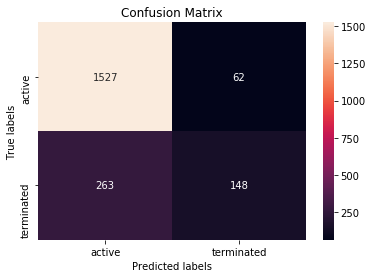

On test data 

accuracy:     0.84 
sensitivity:  0.36 
specifity:    0.96


In [12]:
y_pred = classifier.predict_classes(X_test)
classification_metrics(actual = Y_test, pred = y_pred, msg = "On test data")

## Wrapping the keras in Sklearn to do k-fold validation

In [13]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from keras.models import Sequential
from keras.layers import Dense
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(output_dim = 6, init = "uniform", activation = 'relu', input_dim = 13))
    classifier.add(Dense(output_dim = 6, init = "uniform", activation = "relu"))
    classifier.add(Dense(output_dim = 1, init = "uniform", activation = "sigmoid"))
    classifier.compile(optimizer = keras.optimizers.Adam(lr = 0.001), loss = "binary_crossentropy", metrics = ["accuracy"])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = Y_train, cv = 10)

display(accuracies.mean())

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/100
7200/7200 [==============================] - 1s 188us/step - loss: 0.4967 - acc: 0.7947
Epoch 2/100
7200/7200 [==============================] - 1s 121us/step - loss: 0.4214 - acc: 0.7960
Epoch 3/100
7200/7200 [==============================] - 1s 123us/step - loss: 0.4130 - acc: 0.7960
Epoch 4/100
7200/7200 [==============================] - 1s 126us/step - loss: 0.4046 - acc: 0.8161
Epoch 5/100
7200/7200 [==============================] - 1s 123us/step - loss: 0.3978 - acc: 0.8272
Epoch 6/100
7200/7200 [==============================] - 1s 119us/step - loss: 0.3906 - acc: 0.8253
Epoch 7/100
7200/7200 [==============================] - 1s 120us/step - loss: 0.3840 - acc: 0.8285
Epoch 8/100
7200/7200 [==============================] - 1s 121us/step - loss: 0.3773 - acc: 0.8350
Epoch 9/100
7200/7200 [==============================] - 1s 120us/step - loss: 0.3727 - acc: 0.8444
Epoch 10/100
7200/7200 [==============================] - 1s 123us/step - loss: 0.3694 - acc: 0.8474

7200/7200 [==============================] - 1s 122us/step - loss: 0.3425 - acc: 0.8590
Epoch 82/100
7200/7200 [==============================] - 1s 124us/step - loss: 0.3438 - acc: 0.8625
Epoch 83/100
7200/7200 [==============================] - 1s 117us/step - loss: 0.3431 - acc: 0.8586
Epoch 84/100
7200/7200 [==============================] - 1s 121us/step - loss: 0.3438 - acc: 0.8611
Epoch 85/100
7200/7200 [==============================] - 1s 119us/step - loss: 0.3430 - acc: 0.8594
Epoch 86/100
7200/7200 [==============================] - 1s 143us/step - loss: 0.3433 - acc: 0.8599
Epoch 87/100
7200/7200 [==============================] - 1s 125us/step - loss: 0.3433 - acc: 0.8617
Epoch 88/100
7200/7200 [==============================] - 1s 120us/step - loss: 0.3427 - acc: 0.8624
Epoch 89/100
7200/7200 [==============================] - 1s 120us/step - loss: 0.3442 - acc: 0.8593
Epoch 90/100
7200/7200 [==============================] - 1s 118us/step - loss: 0.3433 - acc: 0.8592
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/100
7200/7200 [==============================] - 1s 176us/step - loss: 0.5120 - acc: 0.7939
Epoch 2/100
7200/7200 [==============================] - 1s 179us/step - loss: 0.4358 - acc: 0.7940
Epoch 3/100
7200/7200 [==============================] - 1s 188us/step - loss: 0.4312 - acc: 0.7940
Epoch 4/100
7200/7200 [==============================] - 1s 189us/step - loss: 0.4274 - acc: 0.7940
Epoch 5/100
7200/7200 [==============================] - 1s 154us/step - loss: 0.4229 - acc: 0.8090
Epoch 6/100
7200/7200 [==============================] - 1s 122us/step - loss: 0.4199 - acc: 0.8229
Epoch 7/100
7200/7200 [==============================] - 1s 121us/step - loss: 0.4176 - acc: 0.8282
Epoch 8/100
7200/7200 [==============================] - 1s 120us/step - loss: 0.4158 - acc: 0.8286
Epoch 9/100
7200/7200 [==============================] - 1s 120us/step - loss: 0.4142 - acc: 0.8324
Epoch 10/100
7200/7200 [==============================] - 1s 147us/step - loss: 0.4127 - acc: 0.8326

7200/7200 [==============================] - 1s 122us/step - loss: 0.4001 - acc: 0.8357
Epoch 83/100
7200/7200 [==============================] - 1s 118us/step - loss: 0.4002 - acc: 0.8357
Epoch 84/100
7200/7200 [==============================] - 1s 119us/step - loss: 0.4009 - acc: 0.8351
Epoch 85/100
7200/7200 [==============================] - 1s 119us/step - loss: 0.4003 - acc: 0.8371
Epoch 86/100
7200/7200 [==============================] - 1s 119us/step - loss: 0.4005 - acc: 0.8357
Epoch 87/100
7200/7200 [==============================] - 1s 121us/step - loss: 0.4002 - acc: 0.8383
Epoch 88/100
7200/7200 [==============================] - 1s 120us/step - loss: 0.4004 - acc: 0.8343
Epoch 89/100
7200/7200 [==============================] - 1s 121us/step - loss: 0.4004 - acc: 0.8357
Epoch 90/100
7200/7200 [==============================] - 1s 120us/step - loss: 0.4004 - acc: 0.8364
Epoch 91/100
7200/7200 [==============================] - 1s 120us/step - loss: 0.4001 - acc: 0.8364
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/100
7200/7200 [==============================] - 1s 180us/step - loss: 0.4876 - acc: 0.7983
Epoch 2/100
7200/7200 [==============================] - 1s 120us/step - loss: 0.4264 - acc: 0.7982
Epoch 3/100
7200/7200 [==============================] - 1s 122us/step - loss: 0.4209 - acc: 0.7982
Epoch 4/100
7200/7200 [==============================] - 1s 127us/step - loss: 0.4158 - acc: 0.8158
Epoch 5/100
7200/7200 [==============================] - 1s 119us/step - loss: 0.4124 - acc: 0.8281
Epoch 6/100
7200/7200 [==============================] - 1s 121us/step - loss: 0.4100 - acc: 0.8339
Epoch 7/100
7200/7200 [==============================] - 1s 121us/step - loss: 0.4079 - acc: 0.8342
Epoch 8/100
7200/7200 [==============================] - 1s 121us/step - loss: 0.4065 - acc: 0.8369
Epoch 9/100
7200/7200 [==============================] - 1s 120us/step - loss: 0.4055 - acc: 0.8365
Epoch 10/100
7200/7200 [==============================] - 1s 124us/step - loss: 0.4041 - acc: 0.8374

7200/7200 [==============================] - 1s 121us/step - loss: 0.3940 - acc: 0.8394
Epoch 83/100
7200/7200 [==============================] - 1s 122us/step - loss: 0.3935 - acc: 0.8393
Epoch 84/100
7200/7200 [==============================] - 1s 119us/step - loss: 0.3939 - acc: 0.8393
Epoch 85/100
7200/7200 [==============================] - 1s 122us/step - loss: 0.3941 - acc: 0.8399
Epoch 86/100
7200/7200 [==============================] - 1s 121us/step - loss: 0.3934 - acc: 0.8376
Epoch 87/100
7200/7200 [==============================] - 1s 121us/step - loss: 0.3939 - acc: 0.8412
Epoch 88/100
7200/7200 [==============================] - 1s 118us/step - loss: 0.3936 - acc: 0.8386
Epoch 89/100
7200/7200 [==============================] - 1s 142us/step - loss: 0.3934 - acc: 0.8396
Epoch 90/100
7200/7200 [==============================] - 1s 123us/step - loss: 0.3938 - acc: 0.8387
Epoch 91/100
7200/7200 [==============================] - 1s 120us/step - loss: 0.3935 - acc: 0.8385
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/100
7200/7200 [==============================] - 1s 186us/step - loss: 0.4857 - acc: 0.7965
Epoch 2/100
7200/7200 [==============================] - 1s 124us/step - loss: 0.4204 - acc: 0.7969
Epoch 3/100
7200/7200 [==============================] - 1s 123us/step - loss: 0.4098 - acc: 0.8040
Epoch 4/100
7200/7200 [==============================] - 1s 123us/step - loss: 0.4002 - acc: 0.8282
Epoch 5/100
7200/7200 [==============================] - 1s 123us/step - loss: 0.3909 - acc: 0.8301
Epoch 6/100
7200/7200 [==============================] - 1s 123us/step - loss: 0.3825 - acc: 0.8304
Epoch 7/100
7200/7200 [==============================] - 1s 125us/step - loss: 0.3763 - acc: 0.8432
Epoch 8/100
7200/7200 [==============================] - 1s 129us/step - loss: 0.3718 - acc: 0.8460
Epoch 9/100
7200/7200 [==============================] - 1s 146us/step - loss: 0.3668 - acc: 0.8493
Epoch 10/100
7200/7200 [==============================] - 1s 125us/step - loss: 0.3644 - acc: 0.8524

7200/7200 [==============================] - 1s 125us/step - loss: 0.3429 - acc: 0.8604
Epoch 82/100
7200/7200 [==============================] - 1s 122us/step - loss: 0.3419 - acc: 0.8572
Epoch 83/100
7200/7200 [==============================] - 1s 121us/step - loss: 0.3425 - acc: 0.8606
Epoch 84/100
7200/7200 [==============================] - 1s 122us/step - loss: 0.3421 - acc: 0.8599
Epoch 85/100
7200/7200 [==============================] - 1s 133us/step - loss: 0.3418 - acc: 0.8614
Epoch 86/100
7200/7200 [==============================] - 1s 126us/step - loss: 0.3423 - acc: 0.8601
Epoch 87/100
7200/7200 [==============================] - 1s 125us/step - loss: 0.3419 - acc: 0.8606
Epoch 88/100
7200/7200 [==============================] - 1s 124us/step - loss: 0.3421 - acc: 0.8597
Epoch 89/100
7200/7200 [==============================] - 1s 125us/step - loss: 0.3418 - acc: 0.8597
Epoch 90/100
7200/7200 [==============================] - 1s 161us/step - loss: 0.3422 - acc: 0.8603
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/100
7200/7200 [==============================] - 1s 200us/step - loss: 0.4872 - acc: 0.7976
Epoch 2/100
7200/7200 [==============================] - 1s 123us/step - loss: 0.4288 - acc: 0.7976
Epoch 3/100
7200/7200 [==============================] - 1s 127us/step - loss: 0.4232 - acc: 0.7976
Epoch 4/100
7200/7200 [==============================] - 1s 123us/step - loss: 0.4188 - acc: 0.8224
Epoch 5/100
7200/7200 [==============================] - 1s 127us/step - loss: 0.4160 - acc: 0.8278
Epoch 6/100
7200/7200 [==============================] - 1s 130us/step - loss: 0.4139 - acc: 0.8296
Epoch 7/100
7200/7200 [==============================] - 1s 184us/step - loss: 0.4122 - acc: 0.8294
Epoch 8/100
7200/7200 [==============================] - 1s 128us/step - loss: 0.4110 - acc: 0.8324
Epoch 9/100
7200/7200 [==============================] - 1s 130us/step - loss: 0.4102 - acc: 0.8332
Epoch 10/100
7200/7200 [==============================] - 1s 139us/step - loss: 0.4092 - acc: 0.8349

7200/7200 [==============================] - 1s 126us/step - loss: 0.3992 - acc: 0.8356
Epoch 83/100
7200/7200 [==============================] - 1s 124us/step - loss: 0.3987 - acc: 0.8349
Epoch 84/100
7200/7200 [==============================] - 1s 124us/step - loss: 0.3984 - acc: 0.8371
Epoch 85/100
7200/7200 [==============================] - 1s 126us/step - loss: 0.3985 - acc: 0.8357
Epoch 86/100
7200/7200 [==============================] - 1s 124us/step - loss: 0.3987 - acc: 0.8383
Epoch 87/100
7200/7200 [==============================] - 1s 127us/step - loss: 0.3988 - acc: 0.8374
Epoch 88/100
7200/7200 [==============================] - 1s 127us/step - loss: 0.3987 - acc: 0.8379
Epoch 89/100
7200/7200 [==============================] - 1s 123us/step - loss: 0.3986 - acc: 0.8369
Epoch 90/100
7200/7200 [==============================] - 1s 125us/step - loss: 0.3986 - acc: 0.8378
Epoch 91/100
7200/7200 [==============================] - 1s 126us/step - loss: 0.3984 - acc: 0.8365
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/100
7200/7200 [==============================] - 2s 222us/step - loss: 0.5152 - acc: 0.7976
Epoch 2/100
7200/7200 [==============================] - 1s 130us/step - loss: 0.4327 - acc: 0.7985
Epoch 3/100
7200/7200 [==============================] - 1s 132us/step - loss: 0.4285 - acc: 0.7985
Epoch 4/100
7200/7200 [==============================] - 1s 128us/step - loss: 0.4255 - acc: 0.7985
Epoch 5/100
7200/7200 [==============================] - 1s 127us/step - loss: 0.4228 - acc: 0.7985
Epoch 6/100
7200/7200 [==============================] - 1s 125us/step - loss: 0.4194 - acc: 0.8001
Epoch 7/100
7200/7200 [==============================] - 1s 128us/step - loss: 0.4165 - acc: 0.8261
Epoch 8/100
7200/7200 [==============================] - 1s 129us/step - loss: 0.4142 - acc: 0.8289
Epoch 9/100
7200/7200 [==============================] - 1s 127us/step - loss: 0.4122 - acc: 0.8315
Epoch 10/100
7200/7200 [==============================] - 1s 137us/step - loss: 0.4105 - acc: 0.8347

7200/7200 [==============================] - 1s 127us/step - loss: 0.3929 - acc: 0.8406
Epoch 83/100
7200/7200 [==============================] - 1s 125us/step - loss: 0.3933 - acc: 0.8401
Epoch 84/100
7200/7200 [==============================] - 1s 129us/step - loss: 0.3928 - acc: 0.8401
Epoch 85/100
7200/7200 [==============================] - 1s 133us/step - loss: 0.3930 - acc: 0.8404
Epoch 86/100
7200/7200 [==============================] - 1s 128us/step - loss: 0.3925 - acc: 0.8422
Epoch 87/100
7200/7200 [==============================] - 1s 129us/step - loss: 0.3926 - acc: 0.8392
Epoch 88/100
7200/7200 [==============================] - 1s 126us/step - loss: 0.3924 - acc: 0.8382
Epoch 89/100
7200/7200 [==============================] - 1s 127us/step - loss: 0.3929 - acc: 0.8396
Epoch 90/100
7200/7200 [==============================] - 1s 128us/step - loss: 0.3926 - acc: 0.8404
Epoch 91/100
7200/7200 [==============================] - 1s 128us/step - loss: 0.3924 - acc: 0.8403
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/100
7200/7200 [==============================] - 1s 208us/step - loss: 0.4934 - acc: 0.7950
Epoch 2/100
7200/7200 [==============================] - 1s 134us/step - loss: 0.4134 - acc: 0.8094
Epoch 3/100
7200/7200 [==============================] - 1s 129us/step - loss: 0.3882 - acc: 0.8253
Epoch 4/100
7200/7200 [==============================] - 1s 128us/step - loss: 0.3671 - acc: 0.8500
Epoch 5/100
7200/7200 [==============================] - 1s 128us/step - loss: 0.3562 - acc: 0.8556
Epoch 6/100
7200/7200 [==============================] - 1s 128us/step - loss: 0.3511 - acc: 0.8599
Epoch 7/100
7200/7200 [==============================] - 1s 131us/step - loss: 0.3489 - acc: 0.8581
Epoch 8/100
7200/7200 [==============================] - 1s 128us/step - loss: 0.3472 - acc: 0.8594
Epoch 9/100
7200/7200 [==============================] - 1s 129us/step - loss: 0.3460 - acc: 0.8578
Epoch 10/100
7200/7200 [==============================] - 1s 129us/step - loss: 0.3456 - acc: 0.8597

7200/7200 [==============================] - 1s 126us/step - loss: 0.3344 - acc: 0.8622
Epoch 83/100
7200/7200 [==============================] - 1s 128us/step - loss: 0.3347 - acc: 0.8643
Epoch 84/100
7200/7200 [==============================] - 1s 129us/step - loss: 0.3350 - acc: 0.8622
Epoch 85/100
7200/7200 [==============================] - 1s 130us/step - loss: 0.3343 - acc: 0.8658
Epoch 86/100
7200/7200 [==============================] - 1s 131us/step - loss: 0.3346 - acc: 0.8618
Epoch 87/100
7200/7200 [==============================] - 1s 129us/step - loss: 0.3350 - acc: 0.8640
Epoch 88/100
7200/7200 [==============================] - 1s 132us/step - loss: 0.3343 - acc: 0.8640
Epoch 89/100
7200/7200 [==============================] - 1s 128us/step - loss: 0.3343 - acc: 0.8622
Epoch 90/100
7200/7200 [==============================] - 1s 128us/step - loss: 0.3345 - acc: 0.8654
Epoch 91/100
7200/7200 [==============================] - 1s 129us/step - loss: 0.3346 - acc: 0.8644
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/100
7200/7200 [==============================] - 2s 211us/step - loss: 0.4951 - acc: 0.7956
Epoch 2/100
7200/7200 [==============================] - 1s 130us/step - loss: 0.4332 - acc: 0.7957
Epoch 3/100
7200/7200 [==============================] - 1s 130us/step - loss: 0.4291 - acc: 0.7957
Epoch 4/100
7200/7200 [==============================] - 1s 130us/step - loss: 0.4260 - acc: 0.7957
Epoch 5/100
7200/7200 [==============================] - 1s 128us/step - loss: 0.4219 - acc: 0.8157
Epoch 6/100
7200/7200 [==============================] - 1s 130us/step - loss: 0.4193 - acc: 0.8251
Epoch 7/100
7200/7200 [==============================] - 1s 133us/step - loss: 0.4170 - acc: 0.8261
Epoch 8/100
7200/7200 [==============================] - 1s 133us/step - loss: 0.4159 - acc: 0.8287
Epoch 9/100
7200/7200 [==============================] - 1s 138us/step - loss: 0.4141 - acc: 0.8310 0s - loss: 0.4172 - ac
Epoch 10/100
7200/7200 [==============================] - 1s 129us/step - los

7200/7200 [==============================] - 1s 131us/step - loss: 0.4033 - acc: 0.8324
Epoch 82/100
7200/7200 [==============================] - 1s 130us/step - loss: 0.4032 - acc: 0.8347
Epoch 83/100
7200/7200 [==============================] - 1s 130us/step - loss: 0.4032 - acc: 0.8332
Epoch 84/100
7200/7200 [==============================] - 1s 129us/step - loss: 0.4029 - acc: 0.8339
Epoch 85/100
7200/7200 [==============================] - 1s 129us/step - loss: 0.4031 - acc: 0.8329
Epoch 86/100
7200/7200 [==============================] - 1s 133us/step - loss: 0.4027 - acc: 0.8336
Epoch 87/100
7200/7200 [==============================] - 1s 132us/step - loss: 0.4030 - acc: 0.8342
Epoch 88/100
7200/7200 [==============================] - 1s 130us/step - loss: 0.4032 - acc: 0.8343
Epoch 89/100
7200/7200 [==============================] - 1s 130us/step - loss: 0.4030 - acc: 0.8326
Epoch 90/100
7200/7200 [==============================] - 1s 132us/step - loss: 0.4031 - acc: 0.8339
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/100
7200/7200 [==============================] - 2s 235us/step - loss: 0.4818 - acc: 0.7983
Epoch 2/100
7200/7200 [==============================] - 1s 130us/step - loss: 0.4233 - acc: 0.7990
Epoch 3/100
7200/7200 [==============================] - 1s 130us/step - loss: 0.4168 - acc: 0.7990
Epoch 4/100
7200/7200 [==============================] - 1s 133us/step - loss: 0.4123 - acc: 0.8260
Epoch 5/100
7200/7200 [==============================] - 1s 134us/step - loss: 0.4106 - acc: 0.8304
Epoch 6/100
7200/7200 [==============================] - 1s 133us/step - loss: 0.4086 - acc: 0.8332
Epoch 7/100
7200/7200 [==============================] - 1s 130us/step - loss: 0.4068 - acc: 0.8347
Epoch 8/100
7200/7200 [==============================] - 1s 138us/step - loss: 0.4053 - acc: 0.8362
Epoch 9/100
7200/7200 [==============================] - 1s 133us/step - loss: 0.4040 - acc: 0.8360
Epoch 10/100
7200/7200 [==============================] - 1s 132us/step - loss: 0.4027 - acc: 0.8364

7200/7200 [==============================] - 1s 133us/step - loss: 0.3928 - acc: 0.8381
Epoch 83/100
7200/7200 [==============================] - 1s 133us/step - loss: 0.3927 - acc: 0.8396
Epoch 84/100
7200/7200 [==============================] - 1s 132us/step - loss: 0.3929 - acc: 0.8394
Epoch 85/100
7200/7200 [==============================] - 1s 131us/step - loss: 0.3927 - acc: 0.8385
Epoch 86/100
7200/7200 [==============================] - 1s 132us/step - loss: 0.3930 - acc: 0.8394
Epoch 87/100
7200/7200 [==============================] - 1s 133us/step - loss: 0.3926 - acc: 0.8364
Epoch 88/100
7200/7200 [==============================] - 1s 132us/step - loss: 0.3925 - acc: 0.8390
Epoch 89/100
7200/7200 [==============================] - 1s 130us/step - loss: 0.3927 - acc: 0.8376
Epoch 90/100
7200/7200 [==============================] - 1s 132us/step - loss: 0.3926 - acc: 0.8381
Epoch 91/100
7200/7200 [==============================] - 1s 143us/step - loss: 0.3928 - acc: 0.8389
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/100
7200/7200 [==============================] - 2s 229us/step - loss: 0.4952 - acc: 0.7956
Epoch 2/100
7200/7200 [==============================] - 1s 133us/step - loss: 0.4297 - acc: 0.7961
Epoch 3/100
7200/7200 [==============================] - 1s 133us/step - loss: 0.4256 - acc: 0.7961
Epoch 4/100
7200/7200 [==============================] - 1s 134us/step - loss: 0.4224 - acc: 0.7961
Epoch 5/100
7200/7200 [==============================] - 1s 133us/step - loss: 0.4180 - acc: 0.8174
Epoch 6/100
7200/7200 [==============================] - 1s 133us/step - loss: 0.4150 - acc: 0.8265
Epoch 7/100
7200/7200 [==============================] - 1s 134us/step - loss: 0.4131 - acc: 0.8310
Epoch 8/100
7200/7200 [==============================] - 1s 133us/step - loss: 0.4110 - acc: 0.8292
Epoch 9/100
7200/7200 [==============================] - 1s 134us/step - loss: 0.4104 - acc: 0.8321
Epoch 10/100
7200/7200 [==============================] - 1s 134us/step - loss: 0.4088 - acc: 0.8351

7200/7200 [==============================] - 1s 134us/step - loss: 0.3983 - acc: 0.8362
Epoch 83/100
7200/7200 [==============================] - 1s 132us/step - loss: 0.3978 - acc: 0.8372
Epoch 84/100
7200/7200 [==============================] - 1s 133us/step - loss: 0.3985 - acc: 0.8340
Epoch 85/100
7200/7200 [==============================] - 1s 136us/step - loss: 0.3983 - acc: 0.8346
Epoch 86/100
7200/7200 [==============================] - 1s 134us/step - loss: 0.3978 - acc: 0.8375
Epoch 87/100
7200/7200 [==============================] - 1s 134us/step - loss: 0.3982 - acc: 0.8358
Epoch 88/100
7200/7200 [==============================] - 1s 137us/step - loss: 0.3980 - acc: 0.8378
Epoch 89/100
7200/7200 [==============================] - 1s 136us/step - loss: 0.3982 - acc: 0.8367
Epoch 90/100
7200/7200 [==============================] - 1s 134us/step - loss: 0.3979 - acc: 0.8354
Epoch 91/100
7200/7200 [==============================] - 1s 133us/step - loss: 0.3978 - acc: 0.8362
Epo

0.8441249943897129

In [14]:
accuracies.mean()

0.8441249943897129

## Hyper parameter tuning through Grid Search

In [15]:
from sklearn.model_selection import GridSearchCV
def build_classifier(optimizers):
    classifier = Sequential()
    classifier.add(Dense(output_dim = 6, init = "uniform", activation = 'relu', input_dim = 13))
    classifier.add(Dense(output_dim = 6, init = "uniform", activation = "relu"))
    classifier.add(Dense(output_dim = 1, init = "uniform", activation = "sigmoid"))
    classifier.compile(optimizer = optimizers, loss = "binary_crossentropy", metrics = ["accuracy"])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [10, 25, 32],
              'epochs': [100, 150],
              'optimizers':["adam", "rmsprop"]}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(X_train, Y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 2s 253us/step - loss: 0.4878 - acc: 0.7960
Epoch 2/100
7200/7200 [==============================] - 1s 136us/step - loss: 0.4308 - acc: 0.7960
Epoch 3/100
7200/7200 [==============================] - 1s 135us/step - loss: 0.4271 - acc: 0.7960
Epoch 4/100
7200/7200 [==============================] - 1s 138us/step - loss: 0.4221 - acc: 0.8086
Epoch 5/100
7200/7200 [==============================] - 1s 138us/step - loss: 0.4183 - acc: 0.8258
Epoch 6/100
7200/7200 [==============================] - 1s 136us/step - loss: 0.4154 - acc: 0.8287
Epoch 7/100
7200/7200 [==============================] - 1s 142us/step - loss: 0.4141 - acc: 0.8324
Epoch 8/100
7200/7200 [==============================] - 1s 135us/step - loss: 0.4124 - acc: 0.8318
Epoch 9/100
7200/7200 [==============================] - 1s 137us/step - loss: 0.4111 - acc: 0.8342
Epoch 10/100
7200/7200 [==============================] - 1s 140us/step - loss: 0.4100 - acc: 0.8343

7200/7200 [==============================] - 1s 138us/step - loss: 0.3988 - acc: 0.8371
Epoch 83/100
7200/7200 [==============================] - 1s 134us/step - loss: 0.3991 - acc: 0.8368
Epoch 84/100
7200/7200 [==============================] - 1s 135us/step - loss: 0.3987 - acc: 0.8374
Epoch 85/100
7200/7200 [==============================] - 1s 136us/step - loss: 0.3991 - acc: 0.8375
Epoch 86/100
7200/7200 [==============================] - 1s 135us/step - loss: 0.3990 - acc: 0.8375
Epoch 87/100
7200/7200 [==============================] - 1s 136us/step - loss: 0.3984 - acc: 0.8385
Epoch 88/100
7200/7200 [==============================] - 1s 135us/step - loss: 0.3987 - acc: 0.8383
Epoch 89/100
7200/7200 [==============================] - 1s 134us/step - loss: 0.3989 - acc: 0.8381
Epoch 90/100
7200/7200 [==============================] - 1s 137us/step - loss: 0.3990 - acc: 0.8365
Epoch 91/100
7200/7200 [==============================] - 1s 136us/step - loss: 0.3988 - acc: 0.8372
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 2s 247us/step - loss: 0.4890 - acc: 0.7935
Epoch 2/100
7200/7200 [==============================] - 1s 135us/step - loss: 0.4319 - acc: 0.7940
Epoch 3/100
7200/7200 [==============================] - 1s 138us/step - loss: 0.4255 - acc: 0.7965
Epoch 4/100
7200/7200 [==============================] - 1s 135us/step - loss: 0.4217 - acc: 0.8183
Epoch 5/100
7200/7200 [==============================] - 1s 137us/step - loss: 0.4187 - acc: 0.8251
Epoch 6/100
7200/7200 [==============================] - 1s 140us/step - loss: 0.4167 - acc: 0.8283
Epoch 7/100
7200/7200 [==============================] - 1s 136us/step - loss: 0.4153 - acc: 0.8306
Epoch 8/100
7200/7200 [==============================] - 1s 147us/step - loss: 0.4139 - acc: 0.8304
Epoch 9/100
7200/7200 [==============================] - 1s 141us/step - loss: 0.4126 - acc: 0.8312
Epoch 10/100
7200/7200 [==============================] - 1s 139us/step - loss: 0.4117 - acc: 0.8314

7200/7200 [==============================] - 1s 137us/step - loss: 0.4017 - acc: 0.8342
Epoch 83/100
7200/7200 [==============================] - 1s 137us/step - loss: 0.4013 - acc: 0.8346
Epoch 84/100
7200/7200 [==============================] - 1s 138us/step - loss: 0.4017 - acc: 0.8336
Epoch 85/100
7200/7200 [==============================] - 1s 137us/step - loss: 0.4010 - acc: 0.8322
Epoch 86/100
7200/7200 [==============================] - 1s 137us/step - loss: 0.4015 - acc: 0.8347
Epoch 87/100
7200/7200 [==============================] - 1s 138us/step - loss: 0.4014 - acc: 0.8346
Epoch 88/100
7200/7200 [==============================] - 1s 137us/step - loss: 0.4015 - acc: 0.8356
Epoch 89/100
7200/7200 [==============================] - 1s 139us/step - loss: 0.4014 - acc: 0.8339
Epoch 90/100
7200/7200 [==============================] - 1s 137us/step - loss: 0.4009 - acc: 0.8326
Epoch 91/100
7200/7200 [==============================] - 1s 137us/step - loss: 0.4015 - acc: 0.8329
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 2s 249us/step - loss: 0.4919 - acc: 0.7979
Epoch 2/100
7200/7200 [==============================] - 1s 137us/step - loss: 0.4271 - acc: 0.7982
Epoch 3/100
7200/7200 [==============================] - 1s 141us/step - loss: 0.4230 - acc: 0.7982
Epoch 4/100
7200/7200 [==============================] - 1s 139us/step - loss: 0.4200 - acc: 0.8000
Epoch 5/100
7200/7200 [==============================] - 1s 139us/step - loss: 0.4166 - acc: 0.8237
Epoch 6/100
7200/7200 [==============================] - 1s 140us/step - loss: 0.4139 - acc: 0.8281
Epoch 7/100
7200/7200 [==============================] - 1s 138us/step - loss: 0.4115 - acc: 0.8324
Epoch 8/100
7200/7200 [==============================] - 1s 137us/step - loss: 0.4099 - acc: 0.8332
Epoch 9/100
7200/7200 [==============================] - 1s 139us/step - loss: 0.4084 - acc: 0.8354
Epoch 10/100
7200/7200 [==============================] - 1s 139us/step - loss: 0.4072 - acc: 0.8374

7200/7200 [==============================] - 1s 140us/step - loss: 0.3935 - acc: 0.8412
Epoch 82/100
7200/7200 [==============================] - 1s 137us/step - loss: 0.3942 - acc: 0.8399
Epoch 83/100
7200/7200 [==============================] - 1s 137us/step - loss: 0.3938 - acc: 0.8396
Epoch 84/100
7200/7200 [==============================] - 1s 139us/step - loss: 0.3937 - acc: 0.8410
Epoch 85/100
7200/7200 [==============================] - 1s 140us/step - loss: 0.3937 - acc: 0.8397
Epoch 86/100
7200/7200 [==============================] - 1s 187us/step - loss: 0.3934 - acc: 0.8403
Epoch 87/100
7200/7200 [==============================] - 1s 156us/step - loss: 0.3938 - acc: 0.8397
Epoch 88/100
7200/7200 [==============================] - 1s 139us/step - loss: 0.3936 - acc: 0.8385
Epoch 89/100
7200/7200 [==============================] - 1s 141us/step - loss: 0.3939 - acc: 0.8410
Epoch 90/100
7200/7200 [==============================] - 1s 139us/step - loss: 0.3934 - acc: 0.8400
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 2s 258us/step - loss: 0.4878 - acc: 0.7968
Epoch 2/100
7200/7200 [==============================] - 1s 142us/step - loss: 0.4289 - acc: 0.7969
Epoch 3/100
7200/7200 [==============================] - 1s 141us/step - loss: 0.4253 - acc: 0.7969
Epoch 4/100
7200/7200 [==============================] - 1s 141us/step - loss: 0.4216 - acc: 0.8107
Epoch 5/100
7200/7200 [==============================] - 1s 139us/step - loss: 0.4165 - acc: 0.8240
Epoch 6/100
7200/7200 [==============================] - 1s 141us/step - loss: 0.4116 - acc: 0.8311
Epoch 7/100
7200/7200 [==============================] - 1s 139us/step - loss: 0.4069 - acc: 0.8350
Epoch 8/100
7200/7200 [==============================] - 1s 141us/step - loss: 0.4030 - acc: 0.8369
Epoch 9/100
7200/7200 [==============================] - 1s 144us/step - loss: 0.4000 - acc: 0.8376
Epoch 10/100
7200/7200 [==============================] - 1s 141us/step - loss: 0.3983 - acc: 0.8371

7200/7200 [==============================] - 1s 141us/step - loss: 0.3862 - acc: 0.8437
Epoch 83/100
7200/7200 [==============================] - 1s 143us/step - loss: 0.3864 - acc: 0.8418
Epoch 84/100
7200/7200 [==============================] - 1s 140us/step - loss: 0.3865 - acc: 0.8418
Epoch 85/100
7200/7200 [==============================] - 1s 143us/step - loss: 0.3863 - acc: 0.8418
Epoch 86/100
7200/7200 [==============================] - 1s 144us/step - loss: 0.3862 - acc: 0.8425
Epoch 87/100
7200/7200 [==============================] - 1s 143us/step - loss: 0.3862 - acc: 0.8422
Epoch 88/100
7200/7200 [==============================] - 1s 141us/step - loss: 0.3863 - acc: 0.8414
Epoch 89/100
7200/7200 [==============================] - 1s 138us/step - loss: 0.3861 - acc: 0.8439
Epoch 90/100
7200/7200 [==============================] - 1s 145us/step - loss: 0.3855 - acc: 0.8431
Epoch 91/100
7200/7200 [==============================] - 1s 143us/step - loss: 0.3858 - acc: 0.8443
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 2s 265us/step - loss: 0.5112 - acc: 0.7965
Epoch 2/100
7200/7200 [==============================] - 1s 142us/step - loss: 0.4314 - acc: 0.7976
Epoch 3/100
7200/7200 [==============================] - 1s 143us/step - loss: 0.4273 - acc: 0.7976
Epoch 4/100
7200/7200 [==============================] - 1s 146us/step - loss: 0.4240 - acc: 0.7976
Epoch 5/100
7200/7200 [==============================] - 1s 149us/step - loss: 0.4216 - acc: 0.8012
Epoch 6/100
7200/7200 [==============================] - 1s 143us/step - loss: 0.4189 - acc: 0.8210
Epoch 7/100
7200/7200 [==============================] - 1s 145us/step - loss: 0.4165 - acc: 0.8250
Epoch 8/100
7200/7200 [==============================] - 1s 141us/step - loss: 0.4147 - acc: 0.8274
Epoch 9/100
7200/7200 [==============================] - 1s 144us/step - loss: 0.4135 - acc: 0.8299
Epoch 10/100
7200/7200 [==============================] - 1s 144us/step - loss: 0.4117 - acc: 0.8299

7200/7200 [==============================] - 1s 144us/step - loss: 0.3996 - acc: 0.8379
Epoch 83/100
7200/7200 [==============================] - 1s 141us/step - loss: 0.3996 - acc: 0.8365
Epoch 84/100
7200/7200 [==============================] - 1s 143us/step - loss: 0.3992 - acc: 0.8369
Epoch 85/100
7200/7200 [==============================] - 1s 141us/step - loss: 0.3994 - acc: 0.8374
Epoch 86/100
7200/7200 [==============================] - 1s 143us/step - loss: 0.3988 - acc: 0.8376
Epoch 87/100
7200/7200 [==============================] - 1s 145us/step - loss: 0.3992 - acc: 0.8357
Epoch 88/100
7200/7200 [==============================] - 1s 143us/step - loss: 0.3990 - acc: 0.8374
Epoch 89/100
7200/7200 [==============================] - 1s 143us/step - loss: 0.3986 - acc: 0.8382
Epoch 90/100
7200/7200 [==============================] - 1s 143us/step - loss: 0.3983 - acc: 0.8372
Epoch 91/100
7200/7200 [==============================] - 1s 144us/step - loss: 0.3986 - acc: 0.8376
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 2s 275us/step - loss: 0.4893 - acc: 0.7976
Epoch 2/100
7200/7200 [==============================] - 1s 146us/step - loss: 0.4284 - acc: 0.7985
Epoch 3/100
7200/7200 [==============================] - 1s 146us/step - loss: 0.4227 - acc: 0.7985
Epoch 4/100
7200/7200 [==============================] - 1s 145us/step - loss: 0.4183 - acc: 0.8119
Epoch 5/100
7200/7200 [==============================] - 1s 144us/step - loss: 0.4148 - acc: 0.8271
Epoch 6/100
7200/7200 [==============================] - 1s 142us/step - loss: 0.4128 - acc: 0.8308
Epoch 7/100
7200/7200 [==============================] - 1s 144us/step - loss: 0.4115 - acc: 0.8337
Epoch 8/100
7200/7200 [==============================] - 1s 145us/step - loss: 0.4096 - acc: 0.8337
Epoch 9/100
7200/7200 [==============================] - 1s 146us/step - loss: 0.4083 - acc: 0.8351
Epoch 10/100
7200/7200 [==============================] - 1s 146us/step - loss: 0.4076 - acc: 0.8349

7200/7200 [==============================] - 1s 145us/step - loss: 0.3985 - acc: 0.8362
Epoch 83/100
7200/7200 [==============================] - 1s 144us/step - loss: 0.3988 - acc: 0.8364
Epoch 84/100
7200/7200 [==============================] - 1s 143us/step - loss: 0.3990 - acc: 0.8360
Epoch 85/100
7200/7200 [==============================] - 1s 145us/step - loss: 0.3978 - acc: 0.8369
Epoch 86/100
7200/7200 [==============================] - 1s 146us/step - loss: 0.3988 - acc: 0.8375
Epoch 87/100
7200/7200 [==============================] - 1s 144us/step - loss: 0.3988 - acc: 0.8365
Epoch 88/100
7200/7200 [==============================] - 1s 144us/step - loss: 0.3988 - acc: 0.8378
Epoch 89/100
7200/7200 [==============================] - 1s 150us/step - loss: 0.3983 - acc: 0.8364
Epoch 90/100
7200/7200 [==============================] - 1s 151us/step - loss: 0.3984 - acc: 0.8360
Epoch 91/100
7200/7200 [==============================] - 1s 148us/step - loss: 0.3986 - acc: 0.8374
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 2s 282us/step - loss: 0.4952 - acc: 0.7947
Epoch 2/100
7200/7200 [==============================] - 1s 150us/step - loss: 0.4343 - acc: 0.7954
Epoch 3/100
7200/7200 [==============================] - 1s 148us/step - loss: 0.4284 - acc: 0.7954
Epoch 4/100
7200/7200 [==============================] - 1s 147us/step - loss: 0.4247 - acc: 0.7954
Epoch 5/100
7200/7200 [==============================] - 1s 153us/step - loss: 0.4204 - acc: 0.8221
Epoch 6/100
7200/7200 [==============================] - 1s 148us/step - loss: 0.4181 - acc: 0.8260
Epoch 7/100
7200/7200 [==============================] - 1s 147us/step - loss: 0.4159 - acc: 0.8306
Epoch 8/100
7200/7200 [==============================] - 1s 147us/step - loss: 0.4145 - acc: 0.8311
Epoch 9/100
7200/7200 [==============================] - 1s 146us/step - loss: 0.4134 - acc: 0.8337
Epoch 10/100
7200/7200 [==============================] - 1s 150us/step - loss: 0.4122 - acc: 0.8339

7200/7200 [==============================] - 1s 146us/step - loss: 0.4028 - acc: 0.8346
Epoch 82/100
7200/7200 [==============================] - 1s 146us/step - loss: 0.4028 - acc: 0.8368
Epoch 83/100
7200/7200 [==============================] - 1s 147us/step - loss: 0.4032 - acc: 0.8344
Epoch 84/100
7200/7200 [==============================] - 1s 147us/step - loss: 0.4022 - acc: 0.8342
Epoch 85/100
7200/7200 [==============================] - 1s 150us/step - loss: 0.4029 - acc: 0.8344
Epoch 86/100
7200/7200 [==============================] - 1s 147us/step - loss: 0.4032 - acc: 0.8344
Epoch 87/100
7200/7200 [==============================] - 1s 148us/step - loss: 0.4029 - acc: 0.8342
Epoch 88/100
7200/7200 [==============================] - 1s 148us/step - loss: 0.4031 - acc: 0.8344
Epoch 89/100
7200/7200 [==============================] - 1s 148us/step - loss: 0.4026 - acc: 0.8360
Epoch 90/100
7200/7200 [==============================] - 1s 147us/step - loss: 0.4026 - acc: 0.8356
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 2s 285us/step - loss: 0.4866 - acc: 0.7957
Epoch 2/100
7200/7200 [==============================] - 1s 147us/step - loss: 0.4312 - acc: 0.7957
Epoch 3/100
7200/7200 [==============================] - 1s 149us/step - loss: 0.4254 - acc: 0.7957
Epoch 4/100
7200/7200 [==============================] - 1s 149us/step - loss: 0.4204 - acc: 0.8189
Epoch 5/100
7200/7200 [==============================] - 1s 149us/step - loss: 0.4183 - acc: 0.8219
Epoch 6/100
7200/7200 [==============================] - 1s 149us/step - loss: 0.4166 - acc: 0.8278
Epoch 7/100
7200/7200 [==============================] - 1s 149us/step - loss: 0.4150 - acc: 0.8301
Epoch 8/100
7200/7200 [==============================] - 1s 149us/step - loss: 0.4144 - acc: 0.8304
Epoch 9/100
7200/7200 [==============================] - 1s 149us/step - loss: 0.4132 - acc: 0.8310
Epoch 10/100
7200/7200 [==============================] - 1s 154us/step - loss: 0.4119 - acc: 0.8324

7200/7200 [==============================] - 1s 149us/step - loss: 0.4016 - acc: 0.8351
Epoch 83/100
7200/7200 [==============================] - 1s 147us/step - loss: 0.4018 - acc: 0.8324
Epoch 84/100
7200/7200 [==============================] - 1s 149us/step - loss: 0.4016 - acc: 0.8337
Epoch 85/100
7200/7200 [==============================] - 1s 153us/step - loss: 0.4016 - acc: 0.8362
Epoch 86/100
7200/7200 [==============================] - 1s 148us/step - loss: 0.4018 - acc: 0.8353
Epoch 87/100
7200/7200 [==============================] - 1s 149us/step - loss: 0.4012 - acc: 0.8326
Epoch 88/100
7200/7200 [==============================] - 1s 148us/step - loss: 0.4017 - acc: 0.8347
Epoch 89/100
7200/7200 [==============================] - 1s 148us/step - loss: 0.4012 - acc: 0.8347
Epoch 90/100
7200/7200 [==============================] - 1s 150us/step - loss: 0.4010 - acc: 0.8346
Epoch 91/100
7200/7200 [==============================] - 1s 150us/step - loss: 0.4013 - acc: 0.8354
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 2s 292us/step - loss: 0.4938 - acc: 0.7986
Epoch 2/100
7200/7200 [==============================] - 1s 150us/step - loss: 0.4181 - acc: 0.8175
Epoch 3/100
7200/7200 [==============================] - 1s 154us/step - loss: 0.4114 - acc: 0.8282
Epoch 4/100
7200/7200 [==============================] - 1s 151us/step - loss: 0.4070 - acc: 0.8347
Epoch 5/100
7200/7200 [==============================] - 1s 153us/step - loss: 0.4031 - acc: 0.8343
Epoch 6/100
7200/7200 [==============================] - 1s 154us/step - loss: 0.4001 - acc: 0.8356
Epoch 7/100
7200/7200 [==============================] - 1s 152us/step - loss: 0.3983 - acc: 0.8382
Epoch 8/100
7200/7200 [==============================] - 1s 151us/step - loss: 0.3972 - acc: 0.8375
Epoch 9/100
7200/7200 [==============================] - 1s 152us/step - loss: 0.3960 - acc: 0.8381
Epoch 10/100
7200/7200 [==============================] - 1s 152us/step - loss: 0.3952 - acc: 0.8369

7200/7200 [==============================] - 1s 200us/step - loss: 0.3873 - acc: 0.8424
Epoch 82/100
7200/7200 [==============================] - 1s 199us/step - loss: 0.3872 - acc: 0.8424
Epoch 83/100
7200/7200 [==============================] - 1s 200us/step - loss: 0.3872 - acc: 0.8418
Epoch 84/100
7200/7200 [==============================] - 1s 202us/step - loss: 0.3870 - acc: 0.8435
Epoch 85/100
7200/7200 [==============================] - 1s 206us/step - loss: 0.3870 - acc: 0.8422
Epoch 86/100
7200/7200 [==============================] - 1s 205us/step - loss: 0.3869 - acc: 0.8432
Epoch 87/100
7200/7200 [==============================] - 1s 205us/step - loss: 0.3870 - acc: 0.8417
Epoch 88/100
7200/7200 [==============================] - 1s 201us/step - loss: 0.3868 - acc: 0.8425
Epoch 89/100
7200/7200 [==============================] - 1s 204us/step - loss: 0.3870 - acc: 0.8422
Epoch 90/100
7200/7200 [==============================] - 1s 203us/step - loss: 0.3872 - acc: 0.8433
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 3s 384us/step - loss: 0.4933 - acc: 0.7961
Epoch 2/100
7200/7200 [==============================] - 1s 205us/step - loss: 0.4283 - acc: 0.7961
Epoch 3/100
7200/7200 [==============================] - 1s 205us/step - loss: 0.4231 - acc: 0.7961
Epoch 4/100
7200/7200 [==============================] - 1s 205us/step - loss: 0.4185 - acc: 0.8092
Epoch 5/100
7200/7200 [==============================] - 1s 205us/step - loss: 0.4150 - acc: 0.8262
Epoch 6/100
7200/7200 [==============================] - 1s 207us/step - loss: 0.4127 - acc: 0.8293
Epoch 7/100
7200/7200 [==============================] - 1s 206us/step - loss: 0.4112 - acc: 0.8314
Epoch 8/100
7200/7200 [==============================] - 1s 207us/step - loss: 0.4097 - acc: 0.8317
Epoch 9/100
7200/7200 [==============================] - 1s 206us/step - loss: 0.4084 - acc: 0.8335
Epoch 10/100
7200/7200 [==============================] - 1s 206us/step - loss: 0.4079 - acc: 0.8331

7200/7200 [==============================] - 1s 201us/step - loss: 0.3995 - acc: 0.8375
Epoch 83/100
7200/7200 [==============================] - 1s 204us/step - loss: 0.4003 - acc: 0.8362
Epoch 84/100
7200/7200 [==============================] - 1s 205us/step - loss: 0.3999 - acc: 0.8378
Epoch 85/100
7200/7200 [==============================] - 1s 208us/step - loss: 0.4000 - acc: 0.8365
Epoch 86/100
7200/7200 [==============================] - 1s 204us/step - loss: 0.4000 - acc: 0.8376
Epoch 87/100
7200/7200 [==============================] - 1s 206us/step - loss: 0.4000 - acc: 0.8362
Epoch 88/100
7200/7200 [==============================] - 1s 206us/step - loss: 0.4001 - acc: 0.8361
Epoch 89/100
7200/7200 [==============================] - 1s 207us/step - loss: 0.4000 - acc: 0.8367
Epoch 90/100
7200/7200 [==============================] - 1s 205us/step - loss: 0.4000 - acc: 0.8357
Epoch 91/100
7200/7200 [==============================] - 2s 210us/step - loss: 0.3993 - acc: 0.8374
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 3s 372us/step - loss: 0.4957 - acc: 0.7960
Epoch 2/100
7200/7200 [==============================] - 1s 199us/step - loss: 0.4311 - acc: 0.7960
Epoch 3/100
7200/7200 [==============================] - 1s 198us/step - loss: 0.4245 - acc: 0.7960
Epoch 4/100
7200/7200 [==============================] - 1s 203us/step - loss: 0.4198 - acc: 0.8187
Epoch 5/100
7200/7200 [==============================] - 1s 201us/step - loss: 0.4168 - acc: 0.8258
Epoch 6/100
7200/7200 [==============================] - 1s 201us/step - loss: 0.4144 - acc: 0.8299
Epoch 7/100
7200/7200 [==============================] - 1s 199us/step - loss: 0.4124 - acc: 0.8333
Epoch 8/100
7200/7200 [==============================] - 1s 201us/step - loss: 0.4112 - acc: 0.8342
Epoch 9/100
7200/7200 [==============================] - 1s 202us/step - loss: 0.4099 - acc: 0.8362
Epoch 10/100
7200/7200 [==============================] - 1s 198us/step - loss: 0.4090 - acc: 0.8365

7200/7200 [==============================] - 1s 158us/step - loss: 0.4002 - acc: 0.8362
Epoch 82/100
7200/7200 [==============================] - 1s 160us/step - loss: 0.3999 - acc: 0.8371
Epoch 83/100
7200/7200 [==============================] - 1s 155us/step - loss: 0.4005 - acc: 0.8358
Epoch 84/100
7200/7200 [==============================] - 1s 157us/step - loss: 0.3997 - acc: 0.8351
Epoch 85/100
7200/7200 [==============================] - 1s 160us/step - loss: 0.3994 - acc: 0.8365
Epoch 86/100
7200/7200 [==============================] - 1s 158us/step - loss: 0.4002 - acc: 0.8358
Epoch 87/100
7200/7200 [==============================] - 1s 157us/step - loss: 0.4004 - acc: 0.8358
Epoch 88/100
7200/7200 [==============================] - 1s 155us/step - loss: 0.4003 - acc: 0.8368
Epoch 89/100
7200/7200 [==============================] - 1s 161us/step - loss: 0.4002 - acc: 0.8369
Epoch 90/100
7200/7200 [==============================] - 1s 157us/step - loss: 0.4001 - acc: 0.8367
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 2s 314us/step - loss: 0.5046 - acc: 0.7939
Epoch 2/100
7200/7200 [==============================] - 1s 158us/step - loss: 0.4354 - acc: 0.7940
Epoch 3/100
7200/7200 [==============================] - 1s 159us/step - loss: 0.4293 - acc: 0.7940
Epoch 4/100
7200/7200 [==============================] - 1s 157us/step - loss: 0.4257 - acc: 0.8082
Epoch 5/100
7200/7200 [==============================] - 1s 159us/step - loss: 0.4225 - acc: 0.8214
Epoch 6/100
7200/7200 [==============================] - 1s 160us/step - loss: 0.4197 - acc: 0.8272
Epoch 7/100
7200/7200 [==============================] - 1s 158us/step - loss: 0.4177 - acc: 0.8296
Epoch 8/100
7200/7200 [==============================] - 1s 160us/step - loss: 0.4157 - acc: 0.8299 1s - loss: 0
Epoch 9/100
7200/7200 [==============================] - 1s 163us/step - loss: 0.4143 - acc: 0.8312
Epoch 10/100
7200/7200 [==============================] - 1s 159us/step - loss: 0.4130 

7200/7200 [==============================] - 1s 159us/step - loss: 0.4016 - acc: 0.8321
Epoch 82/100
7200/7200 [==============================] - 1s 159us/step - loss: 0.4015 - acc: 0.8315 0s - loss: 0.3949 - acc:
Epoch 83/100
7200/7200 [==============================] - 1s 159us/step - loss: 0.4014 - acc: 0.8333
Epoch 84/100
7200/7200 [==============================] - 1s 160us/step - loss: 0.4015 - acc: 0.8325
Epoch 85/100
7200/7200 [==============================] - 1s 162us/step - loss: 0.4020 - acc: 0.8319
Epoch 86/100
7200/7200 [==============================] - 1s 160us/step - loss: 0.4017 - acc: 0.8326
Epoch 87/100
7200/7200 [==============================] - 1s 158us/step - loss: 0.4016 - acc: 0.8326
Epoch 88/100
7200/7200 [==============================] - 1s 158us/step - loss: 0.4014 - acc: 0.8318
Epoch 89/100
7200/7200 [==============================] - 1s 159us/step - loss: 0.4018 - acc: 0.8319
Epoch 90/100
7200/7200 [==============================] - 1s 159us/step - loss:

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 2s 317us/step - loss: 0.5123 - acc: 0.7972
Epoch 2/100
7200/7200 [==============================] - 1s 156us/step - loss: 0.4290 - acc: 0.7982
Epoch 3/100
7200/7200 [==============================] - 1s 160us/step - loss: 0.4239 - acc: 0.7982
Epoch 4/100
7200/7200 [==============================] - 1s 158us/step - loss: 0.4189 - acc: 0.7985
Epoch 5/100
7200/7200 [==============================] - 1s 161us/step - loss: 0.4149 - acc: 0.8231
Epoch 6/100
7200/7200 [==============================] - 1s 158us/step - loss: 0.4120 - acc: 0.8307
Epoch 7/100
7200/7200 [==============================] - 1s 159us/step - loss: 0.4090 - acc: 0.8351
Epoch 8/100
7200/7200 [==============================] - 1s 163us/step - loss: 0.4081 - acc: 0.8356
Epoch 9/100
7200/7200 [==============================] - 1s 160us/step - loss: 0.4059 - acc: 0.8376
Epoch 10/100
7200/7200 [==============================] - 1s 164us/step - loss: 0.4053 - acc: 0.8376

Epoch 82/100
7200/7200 [==============================] - 1s 161us/step - loss: 0.3938 - acc: 0.8407
Epoch 83/100
7200/7200 [==============================] - 1s 160us/step - loss: 0.3949 - acc: 0.8386
Epoch 84/100
7200/7200 [==============================] - 1s 159us/step - loss: 0.3946 - acc: 0.8387
Epoch 85/100
7200/7200 [==============================] - 1s 160us/step - loss: 0.3945 - acc: 0.8392
Epoch 86/100
7200/7200 [==============================] - 1s 159us/step - loss: 0.3947 - acc: 0.8424
Epoch 87/100
7200/7200 [==============================] - 1s 161us/step - loss: 0.3945 - acc: 0.8385 0s - loss: 0.3942 - acc: 0
Epoch 88/100
7200/7200 [==============================] - 1s 160us/step - loss: 0.3948 - acc: 0.8401
Epoch 89/100
7200/7200 [==============================] - 1s 164us/step - loss: 0.3949 - acc: 0.8397
Epoch 90/100
7200/7200 [==============================] - 1s 159us/step - loss: 0.3945 - acc: 0.8394
Epoch 91/100
7200/7200 [==============================] - 1s 160

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 2s 323us/step - loss: 0.5101 - acc: 0.7967
Epoch 2/100
7200/7200 [==============================] - 1s 161us/step - loss: 0.4321 - acc: 0.7969
Epoch 3/100
7200/7200 [==============================] - 1s 162us/step - loss: 0.4235 - acc: 0.7969
Epoch 4/100
7200/7200 [==============================] - 1s 163us/step - loss: 0.4170 - acc: 0.8222
Epoch 5/100
7200/7200 [==============================] - 1s 163us/step - loss: 0.4120 - acc: 0.8311
Epoch 6/100
7200/7200 [==============================] - 1s 163us/step - loss: 0.4080 - acc: 0.8342
Epoch 7/100
7200/7200 [==============================] - 1s 163us/step - loss: 0.4047 - acc: 0.8354
Epoch 8/100
7200/7200 [==============================] - 1s 170us/step - loss: 0.4020 - acc: 0.8353
Epoch 9/100
7200/7200 [==============================] - 1s 164us/step - loss: 0.3992 - acc: 0.8379
Epoch 10/100
7200/7200 [==============================] - 1s 163us/step - loss: 0.3986 - acc: 0.8374

7200/7200 [==============================] - 1s 161us/step - loss: 0.3875 - acc: 0.8433
Epoch 82/100
7200/7200 [==============================] - 1s 161us/step - loss: 0.3869 - acc: 0.8433
Epoch 83/100
7200/7200 [==============================] - 1s 161us/step - loss: 0.3869 - acc: 0.8439
Epoch 84/100
7200/7200 [==============================] - 1s 160us/step - loss: 0.3871 - acc: 0.8435
Epoch 85/100
7200/7200 [==============================] - 1s 163us/step - loss: 0.3865 - acc: 0.8433
Epoch 86/100
7200/7200 [==============================] - 1s 162us/step - loss: 0.3862 - acc: 0.8425
Epoch 87/100
7200/7200 [==============================] - 1s 159us/step - loss: 0.3871 - acc: 0.8433
Epoch 88/100
7200/7200 [==============================] - 1s 160us/step - loss: 0.3861 - acc: 0.8433
Epoch 89/100
7200/7200 [==============================] - 1s 161us/step - loss: 0.3865 - acc: 0.8436
Epoch 90/100
7200/7200 [==============================] - 1s 163us/step - loss: 0.3867 - acc: 0.8449
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 2s 328us/step - loss: 0.5035 - acc: 0.7976
Epoch 2/100
7200/7200 [==============================] - 1s 172us/step - loss: 0.4323 - acc: 0.7976
Epoch 3/100
7200/7200 [==============================] - 1s 161us/step - loss: 0.4265 - acc: 0.7976
Epoch 4/100
7200/7200 [==============================] - 1s 166us/step - loss: 0.4222 - acc: 0.8067 1s - loss
Epoch 5/100
7200/7200 [==============================] - 1s 165us/step - loss: 0.4181 - acc: 0.8246
Epoch 6/100
7200/7200 [==============================] - 1s 162us/step - loss: 0.4158 - acc: 0.8292
Epoch 7/100
7200/7200 [==============================] - 1s 161us/step - loss: 0.4140 - acc: 0.8310
Epoch 8/100
7200/7200 [==============================] - 1s 162us/step - loss: 0.4125 - acc: 0.8322
Epoch 9/100
7200/7200 [==============================] - 1s 162us/step - loss: 0.4110 - acc: 0.8343
Epoch 10/100
7200/7200 [==============================] - 1s 163us/step - loss: 0.4098 - a

7200/7200 [==============================] - 1s 161us/step - loss: 0.4007 - acc: 0.8385
Epoch 82/100
7200/7200 [==============================] - 1s 157us/step - loss: 0.4010 - acc: 0.8364
Epoch 83/100
7200/7200 [==============================] - 1s 162us/step - loss: 0.4007 - acc: 0.8362
Epoch 84/100
7200/7200 [==============================] - 1s 162us/step - loss: 0.4008 - acc: 0.8362 0s - loss: 0.3983 - acc:
Epoch 85/100
7200/7200 [==============================] - 1s 162us/step - loss: 0.4010 - acc: 0.8364
Epoch 86/100
7200/7200 [==============================] - 1s 164us/step - loss: 0.4008 - acc: 0.8374
Epoch 87/100
7200/7200 [==============================] - 1s 162us/step - loss: 0.4012 - acc: 0.8364
Epoch 88/100
7200/7200 [==============================] - 1s 163us/step - loss: 0.4005 - acc: 0.8371
Epoch 89/100
7200/7200 [==============================] - 1s 166us/step - loss: 0.4005 - acc: 0.8357
Epoch 90/100
7200/7200 [==============================] - 1s 162us/step - loss:

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 2s 338us/step - loss: 0.5151 - acc: 0.7978
Epoch 2/100
7200/7200 [==============================] - 1s 161us/step - loss: 0.4196 - acc: 0.8124
Epoch 3/100
7200/7200 [==============================] - 1s 162us/step - loss: 0.4070 - acc: 0.8251
Epoch 4/100
7200/7200 [==============================] - 1s 162us/step - loss: 0.3972 - acc: 0.8300
Epoch 5/100
7200/7200 [==============================] - 1s 162us/step - loss: 0.3890 - acc: 0.8328
Epoch 6/100
7200/7200 [==============================] - 1s 163us/step - loss: 0.3823 - acc: 0.8318
Epoch 7/100
7200/7200 [==============================] - 1s 163us/step - loss: 0.3774 - acc: 0.8332
Epoch 8/100
7200/7200 [==============================] - 1s 176us/step - loss: 0.3729 - acc: 0.8394
Epoch 9/100
7200/7200 [==============================] - 1s 164us/step - loss: 0.3695 - acc: 0.8462
Epoch 10/100
7200/7200 [==============================] - 1s 162us/step - loss: 0.3673 - acc: 0.8468

7200/7200 [==============================] - 1s 162us/step - loss: 0.3375 - acc: 0.8637
Epoch 83/100
7200/7200 [==============================] - 1s 160us/step - loss: 0.3389 - acc: 0.8651
Epoch 84/100
7200/7200 [==============================] - 1s 162us/step - loss: 0.3388 - acc: 0.8611
Epoch 85/100
7200/7200 [==============================] - 1s 162us/step - loss: 0.3379 - acc: 0.8629
Epoch 86/100
7200/7200 [==============================] - 1s 160us/step - loss: 0.3385 - acc: 0.8606
Epoch 87/100
7200/7200 [==============================] - 1s 163us/step - loss: 0.3395 - acc: 0.8603
Epoch 88/100
7200/7200 [==============================] - 1s 162us/step - loss: 0.3390 - acc: 0.8608
Epoch 89/100
7200/7200 [==============================] - 1s 162us/step - loss: 0.3382 - acc: 0.8622
Epoch 90/100
7200/7200 [==============================] - 1s 161us/step - loss: 0.3378 - acc: 0.8631
Epoch 91/100
7200/7200 [==============================] - 1s 162us/step - loss: 0.3377 - acc: 0.8611
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 2s 339us/step - loss: 0.5231 - acc: 0.7942
Epoch 2/100
7200/7200 [==============================] - 1s 162us/step - loss: 0.4378 - acc: 0.7954
Epoch 3/100
7200/7200 [==============================] - 1s 165us/step - loss: 0.4324 - acc: 0.7954
Epoch 4/100
7200/7200 [==============================] - 1s 181us/step - loss: 0.4298 - acc: 0.7954
Epoch 5/100
7200/7200 [==============================] - 1s 163us/step - loss: 0.4272 - acc: 0.7954
Epoch 6/100
7200/7200 [==============================] - 1s 166us/step - loss: 0.4239 - acc: 0.8101
Epoch 7/100
7200/7200 [==============================] - 1s 166us/step - loss: 0.4205 - acc: 0.8233
Epoch 8/100
7200/7200 [==============================] - 1s 164us/step - loss: 0.4176 - acc: 0.8281
Epoch 9/100
7200/7200 [==============================] - 1s 165us/step - loss: 0.4162 - acc: 0.8289
Epoch 10/100
7200/7200 [==============================] - 1s 166us/step - loss: 0.4145 - acc: 0.8329

7200/7200 [==============================] - 1s 166us/step - loss: 0.3934 - acc: 0.8387
Epoch 82/100
7200/7200 [==============================] - 1s 163us/step - loss: 0.3935 - acc: 0.8408
Epoch 83/100
7200/7200 [==============================] - 1s 162us/step - loss: 0.3934 - acc: 0.8422
Epoch 84/100
7200/7200 [==============================] - 1s 165us/step - loss: 0.3940 - acc: 0.8397
Epoch 85/100
7200/7200 [==============================] - 1s 165us/step - loss: 0.3938 - acc: 0.8408
Epoch 86/100
7200/7200 [==============================] - 1s 162us/step - loss: 0.3934 - acc: 0.8411
Epoch 87/100
7200/7200 [==============================] - 1s 162us/step - loss: 0.3928 - acc: 0.8376
Epoch 88/100
7200/7200 [==============================] - 1s 166us/step - loss: 0.3930 - acc: 0.8397
Epoch 89/100
7200/7200 [==============================] - 1s 163us/step - loss: 0.3925 - acc: 0.8418
Epoch 90/100
7200/7200 [==============================] - 1s 163us/step - loss: 0.3937 - acc: 0.8397
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 3s 360us/step - loss: 0.5071 - acc: 0.7946
Epoch 2/100
7200/7200 [==============================] - 1s 164us/step - loss: 0.4360 - acc: 0.7957
Epoch 3/100
7200/7200 [==============================] - 1s 165us/step - loss: 0.4299 - acc: 0.7957 0s - loss: 0.4310 - acc: 
Epoch 4/100
7200/7200 [==============================] - 1s 167us/step - loss: 0.4254 - acc: 0.8015
Epoch 5/100
7200/7200 [==============================] - 1s 168us/step - loss: 0.4220 - acc: 0.8160
Epoch 6/100
7200/7200 [==============================] - 1s 166us/step - loss: 0.4202 - acc: 0.8197
Epoch 7/100
7200/7200 [==============================] - 1s 163us/step - loss: 0.4180 - acc: 0.8272
Epoch 8/100
7200/7200 [==============================] - 1s 163us/step - loss: 0.4164 - acc: 0.8271
Epoch 9/100
7200/7200 [==============================] - 1s 167us/step - loss: 0.4145 - acc: 0.8307 0s - loss: 0.4093 -
Epoch 10/100
7200/7200 [==============================

7200/7200 [==============================] - 1s 164us/step - loss: 0.4017 - acc: 0.8351
Epoch 81/100
7200/7200 [==============================] - 1s 163us/step - loss: 0.4036 - acc: 0.8378
Epoch 82/100
7200/7200 [==============================] - 1s 165us/step - loss: 0.4030 - acc: 0.8346
Epoch 83/100
7200/7200 [==============================] - 1s 162us/step - loss: 0.4033 - acc: 0.8346
Epoch 84/100
7200/7200 [==============================] - 1s 166us/step - loss: 0.4030 - acc: 0.8349
Epoch 85/100
7200/7200 [==============================] - 1s 166us/step - loss: 0.4034 - acc: 0.8351
Epoch 86/100
7200/7200 [==============================] - 1s 165us/step - loss: 0.4028 - acc: 0.8354
Epoch 87/100
7200/7200 [==============================] - 1s 166us/step - loss: 0.4032 - acc: 0.8349
Epoch 88/100
7200/7200 [==============================] - 1s 169us/step - loss: 0.4019 - acc: 0.8339
Epoch 89/100
7200/7200 [==============================] - 1s 168us/step - loss: 0.4034 - acc: 0.8360
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 3s 351us/step - loss: 0.5121 - acc: 0.7979
Epoch 2/100
7200/7200 [==============================] - 1s 168us/step - loss: 0.4242 - acc: 0.7990
Epoch 3/100
7200/7200 [==============================] - 1s 168us/step - loss: 0.4155 - acc: 0.7990
Epoch 4/100
7200/7200 [==============================] - 1s 164us/step - loss: 0.4090 - acc: 0.7990
Epoch 5/100
7200/7200 [==============================] - 1s 175us/step - loss: 0.4023 - acc: 0.8185
Epoch 6/100
7200/7200 [==============================] - 1s 170us/step - loss: 0.3939 - acc: 0.8286
Epoch 7/100
7200/7200 [==============================] - 1s 166us/step - loss: 0.3853 - acc: 0.8311
Epoch 8/100
7200/7200 [==============================] - 1s 167us/step - loss: 0.3785 - acc: 0.8383
Epoch 9/100
7200/7200 [==============================] - 1s 169us/step - loss: 0.3715 - acc: 0.8458
Epoch 10/100
7200/7200 [==============================] - 1s 168us/step - loss: 0.3668 - acc: 0.8489

7200/7200 [==============================] - 1s 170us/step - loss: 0.3394 - acc: 0.8607
Epoch 83/100
7200/7200 [==============================] - 1s 169us/step - loss: 0.3385 - acc: 0.8625
Epoch 84/100
7200/7200 [==============================] - 1s 165us/step - loss: 0.3390 - acc: 0.8629
Epoch 85/100
7200/7200 [==============================] - 1s 164us/step - loss: 0.3391 - acc: 0.8628
Epoch 86/100
7200/7200 [==============================] - 1s 167us/step - loss: 0.3385 - acc: 0.8632
Epoch 87/100
7200/7200 [==============================] - 1s 167us/step - loss: 0.3387 - acc: 0.8619
Epoch 88/100
7200/7200 [==============================] - 1s 168us/step - loss: 0.3384 - acc: 0.8657
Epoch 89/100
7200/7200 [==============================] - 1s 183us/step - loss: 0.3378 - acc: 0.8615
Epoch 90/100
7200/7200 [==============================] - 1s 174us/step - loss: 0.3385 - acc: 0.8607
Epoch 91/100
7200/7200 [==============================] - 1s 168us/step - loss: 0.3385 - acc: 0.8617
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 3s 360us/step - loss: 0.4982 - acc: 0.7951
Epoch 2/100
7200/7200 [==============================] - 1s 170us/step - loss: 0.4309 - acc: 0.7961 0s - loss: 0.4357 - 
Epoch 3/100
7200/7200 [==============================] - 1s 172us/step - loss: 0.4241 - acc: 0.7961
Epoch 4/100
7200/7200 [==============================] - 1s 167us/step - loss: 0.4194 - acc: 0.8129
Epoch 5/100
7200/7200 [==============================] - 1s 169us/step - loss: 0.4159 - acc: 0.8268
Epoch 6/100
7200/7200 [==============================] - 1s 169us/step - loss: 0.4133 - acc: 0.8315
Epoch 7/100
7200/7200 [==============================] - 1s 166us/step - loss: 0.4115 - acc: 0.8344
Epoch 8/100
7200/7200 [==============================] - 1s 170us/step - loss: 0.4099 - acc: 0.8346
Epoch 9/100
7200/7200 [==============================] - 1s 170us/step - loss: 0.4086 - acc: 0.8342 0s - loss: 0.4033 - acc: 
Epoch 10/100
7200/7200 [=============================

7200/7200 [==============================] - 1s 169us/step - loss: 0.3963 - acc: 0.8387
Epoch 82/100
7200/7200 [==============================] - 1s 180us/step - loss: 0.3956 - acc: 0.8393
Epoch 83/100
7200/7200 [==============================] - 1s 169us/step - loss: 0.3961 - acc: 0.8389
Epoch 84/100
7200/7200 [==============================] - 1s 169us/step - loss: 0.3947 - acc: 0.8392
Epoch 85/100
7200/7200 [==============================] - 1s 168us/step - loss: 0.3958 - acc: 0.8375
Epoch 86/100
7200/7200 [==============================] - 2s 226us/step - loss: 0.3952 - acc: 0.8385
Epoch 87/100
7200/7200 [==============================] - 1s 169us/step - loss: 0.3953 - acc: 0.8372
Epoch 88/100
7200/7200 [==============================] - 1s 167us/step - loss: 0.3949 - acc: 0.8397
Epoch 89/100
7200/7200 [==============================] - 1s 170us/step - loss: 0.3950 - acc: 0.8381
Epoch 90/100
7200/7200 [==============================] - 1s 169us/step - loss: 0.3947 - acc: 0.8376
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 3s 385us/step - loss: 0.4938 - acc: 0.7956
Epoch 2/150
7200/7200 [==============================] - 1s 174us/step - loss: 0.4314 - acc: 0.7960
Epoch 3/150
7200/7200 [==============================] - 1s 178us/step - loss: 0.4261 - acc: 0.7960
Epoch 4/150
7200/7200 [==============================] - 1s 180us/step - loss: 0.4220 - acc: 0.8065
Epoch 5/150
7200/7200 [==============================] - 1s 177us/step - loss: 0.4184 - acc: 0.8235
Epoch 6/150
7200/7200 [==============================] - 1s 177us/step - loss: 0.4152 - acc: 0.8265
Epoch 7/150
7200/7200 [==============================] - 1s 177us/step - loss: 0.4135 - acc: 0.8322
Epoch 8/150
7200/7200 [==============================] - 1s 180us/step - loss: 0.4120 - acc: 0.8326 0s - loss: 0.4058 -
Epoch 9/150
7200/7200 [==============================] - 1s 178us/step - loss: 0.4106 - acc: 0.8339
Epoch 10/150
7200/7200 [==============================] - 1s 176us/step - loss: 

7200/7200 [==============================] - 1s 181us/step - loss: 0.3997 - acc: 0.8392
Epoch 82/150
7200/7200 [==============================] - 1s 175us/step - loss: 0.4000 - acc: 0.8369
Epoch 83/150
7200/7200 [==============================] - 1s 176us/step - loss: 0.3996 - acc: 0.8383
Epoch 84/150
7200/7200 [==============================] - 1s 177us/step - loss: 0.4004 - acc: 0.8385
Epoch 85/150
7200/7200 [==============================] - 1s 177us/step - loss: 0.4005 - acc: 0.8386
Epoch 86/150
7200/7200 [==============================] - 1s 178us/step - loss: 0.3997 - acc: 0.8379 0s - loss: 0.4026 - acc:
Epoch 87/150
7200/7200 [==============================] - 1s 185us/step - loss: 0.3999 - acc: 0.8381
Epoch 88/150
7200/7200 [==============================] - 1s 178us/step - loss: 0.4002 - acc: 0.8378
Epoch 89/150
7200/7200 [==============================] - 1s 177us/step - loss: 0.3999 - acc: 0.8371
Epoch 90/150
7200/7200 [==============================] - 1s 177us/step - loss:

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 3s 397us/step - loss: 0.4894 - acc: 0.7933
Epoch 2/150
7200/7200 [==============================] - 1s 181us/step - loss: 0.4321 - acc: 0.7940
Epoch 3/150
7200/7200 [==============================] - 1s 179us/step - loss: 0.4264 - acc: 0.7940 1s - los
Epoch 4/150
7200/7200 [==============================] - 1s 182us/step - loss: 0.4217 - acc: 0.8086
Epoch 5/150
7200/7200 [==============================] - 1s 181us/step - loss: 0.4191 - acc: 0.8264
Epoch 6/150
7200/7200 [==============================] - 1s 181us/step - loss: 0.4166 - acc: 0.8296
Epoch 7/150
7200/7200 [==============================] - 1s 179us/step - loss: 0.4152 - acc: 0.8300
Epoch 8/150
7200/7200 [==============================] - 1s 179us/step - loss: 0.4143 - acc: 0.8310
Epoch 9/150
7200/7200 [==============================] - 1s 186us/step - loss: 0.4130 - acc: 0.8314
Epoch 10/150
7200/7200 [==============================] - 1s 191us/step - loss: 0.4121 - ac

7200/7200 [==============================] - 1s 182us/step - loss: 0.4023 - acc: 0.8350
Epoch 81/150
7200/7200 [==============================] - 1s 179us/step - loss: 0.4023 - acc: 0.8358
Epoch 82/150
7200/7200 [==============================] - 1s 179us/step - loss: 0.4025 - acc: 0.8344
Epoch 83/150
7200/7200 [==============================] - 1s 178us/step - loss: 0.4025 - acc: 0.8350
Epoch 84/150
7200/7200 [==============================] - 1s 180us/step - loss: 0.4026 - acc: 0.8335
Epoch 85/150
7200/7200 [==============================] - 1s 183us/step - loss: 0.4026 - acc: 0.8339
Epoch 86/150
7200/7200 [==============================] - 1s 179us/step - loss: 0.4027 - acc: 0.8356
Epoch 87/150
7200/7200 [==============================] - 1s 178us/step - loss: 0.4023 - acc: 0.8344
Epoch 88/150
7200/7200 [==============================] - 1s 179us/step - loss: 0.4021 - acc: 0.8357
Epoch 89/150
7200/7200 [==============================] - 1s 181us/step - loss: 0.4025 - acc: 0.8343
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 3s 403us/step - loss: 0.4981 - acc: 0.7969
Epoch 2/150
7200/7200 [==============================] - 1s 182us/step - loss: 0.4272 - acc: 0.7982
Epoch 3/150
7200/7200 [==============================] - 1s 178us/step - loss: 0.4228 - acc: 0.7982
Epoch 4/150
7200/7200 [==============================] - 1s 183us/step - loss: 0.4188 - acc: 0.7982
Epoch 5/150
7200/7200 [==============================] - 1s 182us/step - loss: 0.4147 - acc: 0.8157
Epoch 6/150
7200/7200 [==============================] - 1s 182us/step - loss: 0.4117 - acc: 0.8301
Epoch 7/150
7200/7200 [==============================] - 1s 179us/step - loss: 0.4095 - acc: 0.8331
Epoch 8/150
7200/7200 [==============================] - 1s 182us/step - loss: 0.4079 - acc: 0.8356
Epoch 9/150
7200/7200 [==============================] - 1s 182us/step - loss: 0.4063 - acc: 0.8360
Epoch 10/150
7200/7200 [==============================] - 1s 181us/step - loss: 0.4054 - acc: 0.8374

7200/7200 [==============================] - 1s 181us/step - loss: 0.3945 - acc: 0.8403
Epoch 82/150
7200/7200 [==============================] - 1s 179us/step - loss: 0.3955 - acc: 0.8389
Epoch 83/150
7200/7200 [==============================] - 1s 182us/step - loss: 0.3950 - acc: 0.8381
Epoch 84/150
7200/7200 [==============================] - 1s 180us/step - loss: 0.3951 - acc: 0.8382
Epoch 85/150
7200/7200 [==============================] - 1s 182us/step - loss: 0.3951 - acc: 0.8381
Epoch 86/150
7200/7200 [==============================] - 1s 182us/step - loss: 0.3947 - acc: 0.8379
Epoch 87/150
7200/7200 [==============================] - 1s 181us/step - loss: 0.3952 - acc: 0.8385
Epoch 88/150
7200/7200 [==============================] - 1s 181us/step - loss: 0.3949 - acc: 0.8386
Epoch 89/150
7200/7200 [==============================] - 1s 190us/step - loss: 0.3949 - acc: 0.8390
Epoch 90/150
7200/7200 [==============================] - 1s 185us/step - loss: 0.3947 - acc: 0.8378 0s 

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 3s 407us/step - loss: 0.5169 - acc: 0.7961
Epoch 2/150
7200/7200 [==============================] - 1s 184us/step - loss: 0.4193 - acc: 0.8128
Epoch 3/150
7200/7200 [==============================] - 1s 185us/step - loss: 0.4059 - acc: 0.8233
Epoch 4/150
7200/7200 [==============================] - 1s 183us/step - loss: 0.3973 - acc: 0.8268
Epoch 5/150
7200/7200 [==============================] - 1s 186us/step - loss: 0.3897 - acc: 0.8297
Epoch 6/150
7200/7200 [==============================] - 1s 184us/step - loss: 0.3833 - acc: 0.8318
Epoch 7/150
7200/7200 [==============================] - 1s 188us/step - loss: 0.3770 - acc: 0.8344
Epoch 8/150
7200/7200 [==============================] - 1s 185us/step - loss: 0.3708 - acc: 0.8442
Epoch 9/150
7200/7200 [==============================] - 1s 188us/step - loss: 0.3655 - acc: 0.8493
Epoch 10/150
7200/7200 [==============================] - 1s 184us/step - loss: 0.3618 - acc: 0.8507

7200/7200 [==============================] - 1s 185us/step - loss: 0.3362 - acc: 0.8649
Epoch 82/150
7200/7200 [==============================] - 1s 184us/step - loss: 0.3363 - acc: 0.8625
Epoch 83/150
7200/7200 [==============================] - 1s 185us/step - loss: 0.3369 - acc: 0.8633
Epoch 84/150
7200/7200 [==============================] - 1s 185us/step - loss: 0.3361 - acc: 0.8647
Epoch 85/150
7200/7200 [==============================] - 1s 184us/step - loss: 0.3365 - acc: 0.8631
Epoch 86/150
7200/7200 [==============================] - 1s 184us/step - loss: 0.3358 - acc: 0.8617
Epoch 87/150
7200/7200 [==============================] - 1s 185us/step - loss: 0.3358 - acc: 0.8639
Epoch 88/150
7200/7200 [==============================] - 1s 187us/step - loss: 0.3363 - acc: 0.8625
Epoch 89/150
7200/7200 [==============================] - 1s 185us/step - loss: 0.3360 - acc: 0.8632
Epoch 90/150
7200/7200 [==============================] - 1s 185us/step - loss: 0.3358 - acc: 0.8640
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 3s 412us/step - loss: 0.4902 - acc: 0.7976
Epoch 2/150
7200/7200 [==============================] - 1s 189us/step - loss: 0.4289 - acc: 0.7976
Epoch 3/150
7200/7200 [==============================] - 1s 185us/step - loss: 0.4244 - acc: 0.8064
Epoch 4/150
7200/7200 [==============================] - 1s 187us/step - loss: 0.4193 - acc: 0.8243
Epoch 5/150
7200/7200 [==============================] - 1s 187us/step - loss: 0.4140 - acc: 0.8281
Epoch 6/150
7200/7200 [==============================] - 1s 184us/step - loss: 0.4094 - acc: 0.8343
Epoch 7/150
7200/7200 [==============================] - 1s 193us/step - loss: 0.4062 - acc: 0.8342
Epoch 8/150
7200/7200 [==============================] - 1s 185us/step - loss: 0.4043 - acc: 0.8350
Epoch 9/150
7200/7200 [==============================] - 1s 185us/step - loss: 0.4022 - acc: 0.8362
Epoch 10/150
7200/7200 [==============================] - 1s 183us/step - loss: 0.4011 - acc: 0.8358

7200/7200 [==============================] - 1s 188us/step - loss: 0.3414 - acc: 0.8604
Epoch 82/150
7200/7200 [==============================] - 1s 186us/step - loss: 0.3407 - acc: 0.8590
Epoch 83/150
7200/7200 [==============================] - 1s 188us/step - loss: 0.3408 - acc: 0.8629
Epoch 84/150
7200/7200 [==============================] - 1s 184us/step - loss: 0.3415 - acc: 0.8581
Epoch 85/150
7200/7200 [==============================] - 1s 186us/step - loss: 0.3411 - acc: 0.8578
Epoch 86/150
7200/7200 [==============================] - 1s 187us/step - loss: 0.3405 - acc: 0.8596
Epoch 87/150
7200/7200 [==============================] - 1s 191us/step - loss: 0.3392 - acc: 0.8622
Epoch 88/150
7200/7200 [==============================] - 1s 185us/step - loss: 0.3386 - acc: 0.8611
Epoch 89/150
7200/7200 [==============================] - 1s 187us/step - loss: 0.3399 - acc: 0.8587
Epoch 90/150
7200/7200 [==============================] - 2s 211us/step - loss: 0.3397 - acc: 0.8596
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 3s 423us/step - loss: 0.4889 - acc: 0.7983
Epoch 2/150
7200/7200 [==============================] - 1s 187us/step - loss: 0.4279 - acc: 0.7985
Epoch 3/150
7200/7200 [==============================] - 1s 187us/step - loss: 0.4226 - acc: 0.7985
Epoch 4/150
7200/7200 [==============================] - 1s 193us/step - loss: 0.4188 - acc: 0.8129
Epoch 5/150
7200/7200 [==============================] - 1s 191us/step - loss: 0.4158 - acc: 0.8281
Epoch 6/150
7200/7200 [==============================] - 1s 190us/step - loss: 0.4144 - acc: 0.8294
Epoch 7/150
7200/7200 [==============================] - 1s 190us/step - loss: 0.4124 - acc: 0.8314
Epoch 8/150
7200/7200 [==============================] - 1s 188us/step - loss: 0.4107 - acc: 0.8356
Epoch 9/150
7200/7200 [==============================] - 1s 188us/step - loss: 0.4094 - acc: 0.8349
Epoch 10/150
7200/7200 [==============================] - 1s 188us/step - loss: 0.4086 - acc: 0.8361

7200/7200 [==============================] - 1s 188us/step - loss: 0.3988 - acc: 0.8379
Epoch 83/150
7200/7200 [==============================] - 1s 189us/step - loss: 0.3984 - acc: 0.8374
Epoch 84/150
7200/7200 [==============================] - 1s 187us/step - loss: 0.3987 - acc: 0.8383
Epoch 85/150
7200/7200 [==============================] - 1s 188us/step - loss: 0.3986 - acc: 0.8376
Epoch 86/150
7200/7200 [==============================] - 1s 189us/step - loss: 0.3986 - acc: 0.8367
Epoch 87/150
7200/7200 [==============================] - 1s 187us/step - loss: 0.3985 - acc: 0.8371
Epoch 88/150
7200/7200 [==============================] - 1s 187us/step - loss: 0.3988 - acc: 0.8385
Epoch 89/150
7200/7200 [==============================] - 1s 192us/step - loss: 0.3985 - acc: 0.8371
Epoch 90/150
7200/7200 [==============================] - 1s 191us/step - loss: 0.3979 - acc: 0.8368
Epoch 91/150
7200/7200 [==============================] - 1s 190us/step - loss: 0.3985 - acc: 0.8372
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 3s 428us/step - loss: 0.4953 - acc: 0.7969
Epoch 2/150
7200/7200 [==============================] - 1s 188us/step - loss: 0.4206 - acc: 0.8187
Epoch 3/150
7200/7200 [==============================] - 1s 190us/step - loss: 0.4067 - acc: 0.8247
Epoch 4/150
7200/7200 [==============================] - 1s 189us/step - loss: 0.3949 - acc: 0.8267 1s - loss
Epoch 5/150
7200/7200 [==============================] - 1s 189us/step - loss: 0.3861 - acc: 0.8289
Epoch 6/150
7200/7200 [==============================] - 1s 191us/step - loss: 0.3799 - acc: 0.8303
Epoch 7/150
7200/7200 [==============================] - 1s 191us/step - loss: 0.3746 - acc: 0.8360
Epoch 8/150
7200/7200 [==============================] - 1s 191us/step - loss: 0.3710 - acc: 0.8431
Epoch 9/150
7200/7200 [==============================] - 1s 187us/step - loss: 0.3681 - acc: 0.8464
Epoch 10/150
7200/7200 [==============================] - 1s 193us/step - loss: 0.3650 - a

7200/7200 [==============================] - 1s 192us/step - loss: 0.3417 - acc: 0.8622
Epoch 82/150
7200/7200 [==============================] - 1s 189us/step - loss: 0.3425 - acc: 0.8600
Epoch 83/150
7200/7200 [==============================] - 1s 192us/step - loss: 0.3411 - acc: 0.8597
Epoch 84/150
7200/7200 [==============================] - 1s 190us/step - loss: 0.3418 - acc: 0.8593
Epoch 85/150
7200/7200 [==============================] - 1s 188us/step - loss: 0.3409 - acc: 0.8599
Epoch 86/150
7200/7200 [==============================] - 1s 192us/step - loss: 0.3417 - acc: 0.8599
Epoch 87/150
7200/7200 [==============================] - 1s 191us/step - loss: 0.3422 - acc: 0.8575
Epoch 88/150
7200/7200 [==============================] - 1s 190us/step - loss: 0.3414 - acc: 0.8604
Epoch 89/150
7200/7200 [==============================] - 1s 191us/step - loss: 0.3411 - acc: 0.8600
Epoch 90/150
7200/7200 [==============================] - 1s 191us/step - loss: 0.3413 - acc: 0.8596
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 3s 438us/step - loss: 0.4912 - acc: 0.7957
Epoch 2/150
7200/7200 [==============================] - 1s 191us/step - loss: 0.4320 - acc: 0.7957
Epoch 3/150
7200/7200 [==============================] - 1s 194us/step - loss: 0.4266 - acc: 0.7957
Epoch 4/150
7200/7200 [==============================] - 1s 191us/step - loss: 0.4222 - acc: 0.8047
Epoch 5/150
7200/7200 [==============================] - 2s 231us/step - loss: 0.4188 - acc: 0.8232
Epoch 6/150
7200/7200 [==============================] - 2s 212us/step - loss: 0.4166 - acc: 0.8265
Epoch 7/150
7200/7200 [==============================] - 1s 194us/step - loss: 0.4155 - acc: 0.8279 0s - loss: 0.4154 - acc: 0.82
Epoch 8/150
7200/7200 [==============================] - 1s 193us/step - loss: 0.4139 - acc: 0.8307
Epoch 9/150
7200/7200 [==============================] - 1s 190us/step - loss: 0.4125 - acc: 0.8300
Epoch 10/150
7200/7200 [==============================] - 1s 192us/ste

7200/7200 [==============================] - 1s 194us/step - loss: 0.4023 - acc: 0.8360
Epoch 82/150
7200/7200 [==============================] - 1s 191us/step - loss: 0.4015 - acc: 0.8346
Epoch 83/150
7200/7200 [==============================] - 1s 191us/step - loss: 0.4017 - acc: 0.8335
Epoch 84/150
7200/7200 [==============================] - 1s 192us/step - loss: 0.4014 - acc: 0.8378
Epoch 85/150
7200/7200 [==============================] - 1s 191us/step - loss: 0.4016 - acc: 0.8356
Epoch 86/150
7200/7200 [==============================] - 1s 193us/step - loss: 0.4018 - acc: 0.8342
Epoch 87/150
7200/7200 [==============================] - 1s 199us/step - loss: 0.4021 - acc: 0.8353
Epoch 88/150
7200/7200 [==============================] - 1s 193us/step - loss: 0.4017 - acc: 0.8350
Epoch 89/150
7200/7200 [==============================] - 1s 194us/step - loss: 0.4020 - acc: 0.8358 0s - loss: 0.4072 - acc
Epoch 90/150
7200/7200 [==============================] - 1s 194us/step - loss: 

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 3s 451us/step - loss: 0.4898 - acc: 0.7992
Epoch 2/150
7200/7200 [==============================] - 1s 200us/step - loss: 0.4246 - acc: 0.7990
Epoch 3/150
7200/7200 [==============================] - 1s 200us/step - loss: 0.4196 - acc: 0.7990
Epoch 4/150
7200/7200 [==============================] - 1s 195us/step - loss: 0.4151 - acc: 0.8081
Epoch 5/150
7200/7200 [==============================] - 1s 197us/step - loss: 0.4120 - acc: 0.8267
Epoch 6/150
7200/7200 [==============================] - 1s 194us/step - loss: 0.4095 - acc: 0.8307
Epoch 7/150
7200/7200 [==============================] - 1s 194us/step - loss: 0.4078 - acc: 0.8322
Epoch 8/150
7200/7200 [==============================] - 1s 195us/step - loss: 0.4063 - acc: 0.8350
Epoch 9/150
7200/7200 [==============================] - 1s 192us/step - loss: 0.4051 - acc: 0.8357
Epoch 10/150
7200/7200 [==============================] - 1s 198us/step - loss: 0.4036 - acc: 0.8354

7200/7200 [==============================] - 1s 202us/step - loss: 0.3924 - acc: 0.8399
Epoch 82/150
7200/7200 [==============================] - 1s 195us/step - loss: 0.3929 - acc: 0.8389
Epoch 83/150
7200/7200 [==============================] - 1s 197us/step - loss: 0.3931 - acc: 0.8381
Epoch 84/150
7200/7200 [==============================] - 1s 200us/step - loss: 0.3928 - acc: 0.8381
Epoch 85/150
7200/7200 [==============================] - 1s 197us/step - loss: 0.3929 - acc: 0.8397
Epoch 86/150
7200/7200 [==============================] - 1s 194us/step - loss: 0.3926 - acc: 0.8387
Epoch 87/150
7200/7200 [==============================] - 1s 195us/step - loss: 0.3925 - acc: 0.8390
Epoch 88/150
7200/7200 [==============================] - 1s 197us/step - loss: 0.3932 - acc: 0.8386
Epoch 89/150
7200/7200 [==============================] - 1s 195us/step - loss: 0.3925 - acc: 0.8383
Epoch 90/150
7200/7200 [==============================] - 1s 195us/step - loss: 0.3929 - acc: 0.8407
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 3s 450us/step - loss: 0.4959 - acc: 0.7953
Epoch 2/150
7200/7200 [==============================] - 1s 197us/step - loss: 0.4308 - acc: 0.7961
Epoch 3/150
7200/7200 [==============================] - 1s 198us/step - loss: 0.4272 - acc: 0.7961
Epoch 4/150
7200/7200 [==============================] - 1s 195us/step - loss: 0.4246 - acc: 0.7961
Epoch 5/150
7200/7200 [==============================] - 1s 198us/step - loss: 0.4207 - acc: 0.8069
Epoch 6/150
7200/7200 [==============================] - 2s 209us/step - loss: 0.4175 - acc: 0.8244
Epoch 7/150
7200/7200 [==============================] - 1s 198us/step - loss: 0.4148 - acc: 0.8278
Epoch 8/150
7200/7200 [==============================] - 1s 199us/step - loss: 0.4133 - acc: 0.8283
Epoch 9/150
7200/7200 [==============================] - 1s 200us/step - loss: 0.4111 - acc: 0.8317
Epoch 10/150
7200/7200 [==============================] - 1s 198us/step - loss: 0.4102 - acc: 0.8337

7200/7200 [==============================] - 1s 198us/step - loss: 0.3912 - acc: 0.8393 0s - loss: 0.3937 - acc: 0
Epoch 82/150
7200/7200 [==============================] - 1s 196us/step - loss: 0.3904 - acc: 0.8387
Epoch 83/150
7200/7200 [==============================] - 1s 200us/step - loss: 0.3907 - acc: 0.8397
Epoch 84/150
7200/7200 [==============================] - 1s 202us/step - loss: 0.3904 - acc: 0.8379
Epoch 85/150
7200/7200 [==============================] - 1s 198us/step - loss: 0.3901 - acc: 0.8385
Epoch 86/150
7200/7200 [==============================] - 1s 200us/step - loss: 0.3897 - acc: 0.8400
Epoch 87/150
7200/7200 [==============================] - 1s 199us/step - loss: 0.3900 - acc: 0.8375
Epoch 88/150
7200/7200 [==============================] - 1s 200us/step - loss: 0.3898 - acc: 0.8383
Epoch 89/150
7200/7200 [==============================] - 1s 197us/step - loss: 0.3893 - acc: 0.8404
Epoch 90/150
7200/7200 [==============================] - 1s 198us/step - los

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 3s 452us/step - loss: 0.5120 - acc: 0.7958
Epoch 2/150
7200/7200 [==============================] - 1s 191us/step - loss: 0.4327 - acc: 0.7960
Epoch 3/150
7200/7200 [==============================] - 1s 194us/step - loss: 0.4262 - acc: 0.7960
Epoch 4/150
7200/7200 [==============================] - 1s 192us/step - loss: 0.4211 - acc: 0.8028
Epoch 5/150
7200/7200 [==============================] - 1s 189us/step - loss: 0.4162 - acc: 0.8283
Epoch 6/150
7200/7200 [==============================] - 1s 191us/step - loss: 0.4122 - acc: 0.8335
Epoch 7/150
7200/7200 [==============================] - 1s 191us/step - loss: 0.4084 - acc: 0.8364
Epoch 8/150
7200/7200 [==============================] - 1s 194us/step - loss: 0.4056 - acc: 0.8371 0s - loss: 0.4090 - ac
Epoch 9/150
7200/7200 [==============================] - 1s 192us/step - loss: 0.4029 - acc: 0.8368
Epoch 10/150
7200/7200 [==============================] - 1s 193us/step - los

Epoch 82/150
7200/7200 [==============================] - 1s 192us/step - loss: 0.3933 - acc: 0.8411
Epoch 83/150
7200/7200 [==============================] - 1s 197us/step - loss: 0.3939 - acc: 0.8403
Epoch 84/150
7200/7200 [==============================] - 1s 190us/step - loss: 0.3932 - acc: 0.8401
Epoch 85/150
7200/7200 [==============================] - 1s 201us/step - loss: 0.3934 - acc: 0.8408
Epoch 86/150
7200/7200 [==============================] - 1s 188us/step - loss: 0.3939 - acc: 0.8404
Epoch 87/150
7200/7200 [==============================] - 1s 190us/step - loss: 0.3934 - acc: 0.8407
Epoch 88/150
7200/7200 [==============================] - 1s 194us/step - loss: 0.3934 - acc: 0.8414
Epoch 89/150
7200/7200 [==============================] - 1s 191us/step - loss: 0.3940 - acc: 0.8415
Epoch 90/150
7200/7200 [==============================] - 1s 192us/step - loss: 0.3940 - acc: 0.8414
Epoch 91/150
7200/7200 [==============================] - 1s 193us/step - loss: 0.3934 - ac

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 3s 464us/step - loss: 0.5015 - acc: 0.7939
Epoch 2/150
7200/7200 [==============================] - 1s 208us/step - loss: 0.4356 - acc: 0.7940
Epoch 3/150
7200/7200 [==============================] - 2s 226us/step - loss: 0.4291 - acc: 0.7940
Epoch 4/150
7200/7200 [==============================] - 1s 193us/step - loss: 0.4251 - acc: 0.8096
Epoch 5/150
7200/7200 [==============================] - 1s 193us/step - loss: 0.4212 - acc: 0.8235
Epoch 6/150
7200/7200 [==============================] - 1s 192us/step - loss: 0.4182 - acc: 0.8285
Epoch 7/150
7200/7200 [==============================] - 1s 193us/step - loss: 0.4159 - acc: 0.8293
Epoch 8/150
7200/7200 [==============================] - 1s 193us/step - loss: 0.4137 - acc: 0.8293
Epoch 9/150
7200/7200 [==============================] - 1s 200us/step - loss: 0.4119 - acc: 0.8315
Epoch 10/150
7200/7200 [==============================] - 1s 193us/step - loss: 0.4115 - acc: 0.8329

7200/7200 [==============================] - 1s 194us/step - loss: 0.4020 - acc: 0.8344
Epoch 82/150
7200/7200 [==============================] - 2s 211us/step - loss: 0.4015 - acc: 0.8349
Epoch 83/150
7200/7200 [==============================] - 1s 196us/step - loss: 0.4022 - acc: 0.8343
Epoch 84/150
7200/7200 [==============================] - 1s 194us/step - loss: 0.4017 - acc: 0.8333
Epoch 85/150
7200/7200 [==============================] - 1s 194us/step - loss: 0.4024 - acc: 0.8339
Epoch 86/150
7200/7200 [==============================] - 1s 197us/step - loss: 0.4023 - acc: 0.8349
Epoch 87/150
7200/7200 [==============================] - 1s 194us/step - loss: 0.4019 - acc: 0.8349
Epoch 88/150
7200/7200 [==============================] - 1s 192us/step - loss: 0.4021 - acc: 0.8346
Epoch 89/150
7200/7200 [==============================] - 1s 195us/step - loss: 0.4025 - acc: 0.8335
Epoch 90/150
7200/7200 [==============================] - 1s 193us/step - loss: 0.4019 - acc: 0.8346
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 3s 451us/step - loss: 0.5195 - acc: 0.7978
Epoch 2/150
7200/7200 [==============================] - 1s 194us/step - loss: 0.4271 - acc: 0.7982
Epoch 3/150
7200/7200 [==============================] - 1s 192us/step - loss: 0.4151 - acc: 0.8067
Epoch 4/150
7200/7200 [==============================] - 1s 190us/step - loss: 0.4051 - acc: 0.8286
Epoch 5/150
7200/7200 [==============================] - 1s 192us/step - loss: 0.3940 - acc: 0.8315
Epoch 6/150
7200/7200 [==============================] - 1s 198us/step - loss: 0.3851 - acc: 0.8329
Epoch 7/150
7200/7200 [==============================] - 1s 197us/step - loss: 0.3774 - acc: 0.8331
Epoch 8/150
7200/7200 [==============================] - 1s 198us/step - loss: 0.3717 - acc: 0.8392
Epoch 9/150
7200/7200 [==============================] - 1s 195us/step - loss: 0.3667 - acc: 0.8464
Epoch 10/150
7200/7200 [==============================] - 1s 194us/step - loss: 0.3632 - acc: 0.8469

7200/7200 [==============================] - 1s 195us/step - loss: 0.3327 - acc: 0.8650
Epoch 82/150
7200/7200 [==============================] - 1s 193us/step - loss: 0.3342 - acc: 0.8656
Epoch 83/150
7200/7200 [==============================] - 1s 191us/step - loss: 0.3334 - acc: 0.8651
Epoch 84/150
7200/7200 [==============================] - 1s 202us/step - loss: 0.3338 - acc: 0.8660
Epoch 85/150
7200/7200 [==============================] - 1s 194us/step - loss: 0.3338 - acc: 0.8654
Epoch 86/150
7200/7200 [==============================] - 1s 192us/step - loss: 0.3334 - acc: 0.8661
Epoch 87/150
7200/7200 [==============================] - 1s 195us/step - loss: 0.3331 - acc: 0.8672
Epoch 88/150
7200/7200 [==============================] - 1s 199us/step - loss: 0.3338 - acc: 0.8651
Epoch 89/150
7200/7200 [==============================] - 1s 196us/step - loss: 0.3333 - acc: 0.8686
Epoch 90/150
7200/7200 [==============================] - 1s 206us/step - loss: 0.3340 - acc: 0.8656
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 3s 461us/step - loss: 0.5176 - acc: 0.7968
Epoch 2/150
7200/7200 [==============================] - 1s 194us/step - loss: 0.4282 - acc: 0.7992
Epoch 3/150
7200/7200 [==============================] - 1s 193us/step - loss: 0.4147 - acc: 0.8217
Epoch 4/150
7200/7200 [==============================] - 1s 195us/step - loss: 0.4039 - acc: 0.8269
Epoch 5/150
7200/7200 [==============================] - 1s 196us/step - loss: 0.3935 - acc: 0.8289
Epoch 6/150
7200/7200 [==============================] - 1s 197us/step - loss: 0.3849 - acc: 0.8297
Epoch 7/150
7200/7200 [==============================] - 1s 196us/step - loss: 0.3775 - acc: 0.8336
Epoch 8/150
7200/7200 [==============================] - 1s 199us/step - loss: 0.3726 - acc: 0.8428
Epoch 9/150
7200/7200 [==============================] - 1s 198us/step - loss: 0.3681 - acc: 0.8451
Epoch 10/150
7200/7200 [==============================] - 1s 195us/step - loss: 0.3649 - acc: 0.8481

7200/7200 [==============================] - 2s 235us/step - loss: 0.3386 - acc: 0.8618
Epoch 82/150
7200/7200 [==============================] - 2s 260us/step - loss: 0.3376 - acc: 0.8628
Epoch 83/150
7200/7200 [==============================] - 2s 258us/step - loss: 0.3375 - acc: 0.8626
Epoch 84/150
7200/7200 [==============================] - 2s 222us/step - loss: 0.3391 - acc: 0.8601
Epoch 85/150
7200/7200 [==============================] - 1s 203us/step - loss: 0.3375 - acc: 0.8611
Epoch 86/150
7200/7200 [==============================] - 1s 204us/step - loss: 0.3381 - acc: 0.8624
Epoch 87/150
7200/7200 [==============================] - 1s 199us/step - loss: 0.3381 - acc: 0.8618
Epoch 88/150
7200/7200 [==============================] - 1s 202us/step - loss: 0.3363 - acc: 0.8642
Epoch 89/150
7200/7200 [==============================] - 1s 198us/step - loss: 0.3390 - acc: 0.8618
Epoch 90/150
7200/7200 [==============================] - 1s 201us/step - loss: 0.3386 - acc: 0.8615
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 3s 441us/step - loss: 0.5015 - acc: 0.7976
Epoch 2/150
7200/7200 [==============================] - 1s 183us/step - loss: 0.4319 - acc: 0.7976
Epoch 3/150
7200/7200 [==============================] - 1s 184us/step - loss: 0.4251 - acc: 0.7976
Epoch 4/150
7200/7200 [==============================] - 1s 185us/step - loss: 0.4207 - acc: 0.8131
Epoch 5/150
7200/7200 [==============================] - 1s 183us/step - loss: 0.4178 - acc: 0.8267
Epoch 6/150
7200/7200 [==============================] - 1s 184us/step - loss: 0.4151 - acc: 0.8289
Epoch 7/150
7200/7200 [==============================] - 1s 183us/step - loss: 0.4134 - acc: 0.8318
Epoch 8/150
7200/7200 [==============================] - 1s 183us/step - loss: 0.4120 - acc: 0.8322
Epoch 9/150
7200/7200 [==============================] - 1s 186us/step - loss: 0.4109 - acc: 0.8342
Epoch 10/150
7200/7200 [==============================] - 1s 185us/step - loss: 0.4096 - acc: 0.8332

7200/7200 [==============================] - 1s 187us/step - loss: 0.4002 - acc: 0.8353
Epoch 82/150
7200/7200 [==============================] - 1s 185us/step - loss: 0.4001 - acc: 0.8358
Epoch 83/150
7200/7200 [==============================] - 1s 180us/step - loss: 0.4004 - acc: 0.8360
Epoch 84/150
7200/7200 [==============================] - 1s 183us/step - loss: 0.3995 - acc: 0.8365
Epoch 85/150
7200/7200 [==============================] - 1s 185us/step - loss: 0.4008 - acc: 0.8360
Epoch 86/150
7200/7200 [==============================] - 1s 183us/step - loss: 0.4004 - acc: 0.8369
Epoch 87/150
7200/7200 [==============================] - 1s 183us/step - loss: 0.4007 - acc: 0.8351
Epoch 88/150
7200/7200 [==============================] - 1s 183us/step - loss: 0.4005 - acc: 0.8365
Epoch 89/150
7200/7200 [==============================] - 1s 186us/step - loss: 0.3999 - acc: 0.8354
Epoch 90/150
7200/7200 [==============================] - 1s 184us/step - loss: 0.4007 - acc: 0.8365
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 3s 443us/step - loss: 0.4953 - acc: 0.7985
Epoch 2/150
7200/7200 [==============================] - 1s 183us/step - loss: 0.4314 - acc: 0.7985
Epoch 3/150
7200/7200 [==============================] - 1s 187us/step - loss: 0.4257 - acc: 0.7985
Epoch 4/150
7200/7200 [==============================] - 1s 202us/step - loss: 0.4214 - acc: 0.8081
Epoch 5/150
7200/7200 [==============================] - 2s 218us/step - loss: 0.4181 - acc: 0.8236
Epoch 6/150
7200/7200 [==============================] - 1s 192us/step - loss: 0.4166 - acc: 0.8282
Epoch 7/150
7200/7200 [==============================] - 1s 184us/step - loss: 0.4132 - acc: 0.8312
Epoch 8/150
7200/7200 [==============================] - 1s 183us/step - loss: 0.4120 - acc: 0.8331
Epoch 9/150
7200/7200 [==============================] - 1s 188us/step - loss: 0.4103 - acc: 0.8343
Epoch 10/150
7200/7200 [==============================] - 1s 186us/step - loss: 0.4085 - acc: 0.8351

7200/7200 [==============================] - 1s 188us/step - loss: 0.3993 - acc: 0.8368
Epoch 83/150
7200/7200 [==============================] - 1s 201us/step - loss: 0.3995 - acc: 0.8381
Epoch 84/150
7200/7200 [==============================] - 2s 232us/step - loss: 0.3990 - acc: 0.8371
Epoch 85/150
7200/7200 [==============================] - 2s 209us/step - loss: 0.3989 - acc: 0.8381
Epoch 86/150
7200/7200 [==============================] - 1s 186us/step - loss: 0.3990 - acc: 0.8358
Epoch 87/150
7200/7200 [==============================] - 1s 187us/step - loss: 0.3995 - acc: 0.8386
Epoch 88/150
7200/7200 [==============================] - 1s 184us/step - loss: 0.3993 - acc: 0.8385
Epoch 89/150
7200/7200 [==============================] - 1s 187us/step - loss: 0.3992 - acc: 0.8367
Epoch 90/150
7200/7200 [==============================] - 1s 187us/step - loss: 0.3989 - acc: 0.8372
Epoch 91/150
7200/7200 [==============================] - 1s 187us/step - loss: 0.3989 - acc: 0.8393
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 3s 452us/step - loss: 0.5233 - acc: 0.7956
Epoch 2/150
7200/7200 [==============================] - 1s 187us/step - loss: 0.4345 - acc: 0.7954
Epoch 3/150
7200/7200 [==============================] - 1s 189us/step - loss: 0.4171 - acc: 0.8061
Epoch 4/150
7200/7200 [==============================] - 1s 187us/step - loss: 0.3977 - acc: 0.8215
Epoch 5/150
7200/7200 [==============================] - 1s 187us/step - loss: 0.3769 - acc: 0.8497
Epoch 6/150
7200/7200 [==============================] - 1s 187us/step - loss: 0.3614 - acc: 0.8569
Epoch 7/150
7200/7200 [==============================] - 1s 187us/step - loss: 0.3521 - acc: 0.8562
Epoch 8/150
7200/7200 [==============================] - 1s 186us/step - loss: 0.3482 - acc: 0.8589
Epoch 9/150
7200/7200 [==============================] - 1s 190us/step - loss: 0.3459 - acc: 0.8586
Epoch 10/150
7200/7200 [==============================] - 1s 187us/step - loss: 0.3440 - acc: 0.8596

7200/7200 [==============================] - 1s 185us/step - loss: 0.3365 - acc: 0.8635
Epoch 83/150
7200/7200 [==============================] - 1s 189us/step - loss: 0.3369 - acc: 0.8662
Epoch 84/150
7200/7200 [==============================] - 1s 184us/step - loss: 0.3366 - acc: 0.8643
Epoch 85/150
7200/7200 [==============================] - 1s 186us/step - loss: 0.3368 - acc: 0.8637
Epoch 86/150
7200/7200 [==============================] - 1s 188us/step - loss: 0.3367 - acc: 0.8644
Epoch 87/150
7200/7200 [==============================] - 1s 186us/step - loss: 0.3365 - acc: 0.8629
Epoch 88/150
7200/7200 [==============================] - 1s 187us/step - loss: 0.3365 - acc: 0.8656
Epoch 89/150
7200/7200 [==============================] - 1s 188us/step - loss: 0.3369 - acc: 0.8639
Epoch 90/150
7200/7200 [==============================] - 1s 187us/step - loss: 0.3369 - acc: 0.8642
Epoch 91/150
7200/7200 [==============================] - 1s 185us/step - loss: 0.3368 - acc: 0.8656
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 3s 459us/step - loss: 0.5209 - acc: 0.7950
Epoch 2/150
7200/7200 [==============================] - 1s 191us/step - loss: 0.4366 - acc: 0.7957
Epoch 3/150
7200/7200 [==============================] - 1s 192us/step - loss: 0.4314 - acc: 0.7957
Epoch 4/150
7200/7200 [==============================] - 1s 188us/step - loss: 0.4281 - acc: 0.7957
Epoch 5/150
7200/7200 [==============================] - 1s 188us/step - loss: 0.4242 - acc: 0.8043
Epoch 6/150
7200/7200 [==============================] - 1s 191us/step - loss: 0.4215 - acc: 0.8203
Epoch 7/150
7200/7200 [==============================] - 1s 188us/step - loss: 0.4198 - acc: 0.8235
Epoch 8/150
7200/7200 [==============================] - 1s 189us/step - loss: 0.4176 - acc: 0.8281
Epoch 9/150
7200/7200 [==============================] - 1s 190us/step - loss: 0.4160 - acc: 0.8294
Epoch 10/150
7200/7200 [==============================] - 1s 186us/step - loss: 0.4146 - acc: 0.8299

7200/7200 [==============================] - 1s 193us/step - loss: 0.3969 - acc: 0.8387
Epoch 83/150
7200/7200 [==============================] - 1s 190us/step - loss: 0.3970 - acc: 0.8401
Epoch 84/150
7200/7200 [==============================] - 1s 188us/step - loss: 0.3970 - acc: 0.8392
Epoch 85/150
7200/7200 [==============================] - 1s 187us/step - loss: 0.3965 - acc: 0.8396
Epoch 86/150
7200/7200 [==============================] - 1s 189us/step - loss: 0.3968 - acc: 0.8392
Epoch 87/150
7200/7200 [==============================] - 1s 194us/step - loss: 0.3967 - acc: 0.8385
Epoch 88/150
7200/7200 [==============================] - 1s 188us/step - loss: 0.3961 - acc: 0.8400
Epoch 89/150
7200/7200 [==============================] - 1s 189us/step - loss: 0.3971 - acc: 0.8376
Epoch 90/150
7200/7200 [==============================] - 1s 190us/step - loss: 0.3965 - acc: 0.8400
Epoch 91/150
7200/7200 [==============================] - 1s 188us/step - loss: 0.3965 - acc: 0.8390
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 3s 461us/step - loss: 0.5124 - acc: 0.7982
Epoch 2/150
7200/7200 [==============================] - 1s 191us/step - loss: 0.4285 - acc: 0.7990
Epoch 3/150
7200/7200 [==============================] - 1s 187us/step - loss: 0.4207 - acc: 0.7990
Epoch 4/150
7200/7200 [==============================] - 1s 190us/step - loss: 0.4149 - acc: 0.8122
Epoch 5/150
7200/7200 [==============================] - 1s 189us/step - loss: 0.4101 - acc: 0.8347
Epoch 6/150
7200/7200 [==============================] - 1s 192us/step - loss: 0.4056 - acc: 0.8357
Epoch 7/150
7200/7200 [==============================] - 1s 190us/step - loss: 0.4023 - acc: 0.8372
Epoch 8/150
7200/7200 [==============================] - 1s 190us/step - loss: 0.3996 - acc: 0.8393
Epoch 9/150
7200/7200 [==============================] - 1s 192us/step - loss: 0.3974 - acc: 0.8371
Epoch 10/150
7200/7200 [==============================] - 1s 190us/step - loss: 0.3954 - acc: 0.8390

7200/7200 [==============================] - 1s 188us/step - loss: 0.3873 - acc: 0.8449
Epoch 83/150
7200/7200 [==============================] - 1s 189us/step - loss: 0.3871 - acc: 0.8456
Epoch 84/150
7200/7200 [==============================] - 1s 188us/step - loss: 0.3872 - acc: 0.8428
Epoch 85/150
7200/7200 [==============================] - 1s 192us/step - loss: 0.3873 - acc: 0.8453
Epoch 86/150
7200/7200 [==============================] - 1s 190us/step - loss: 0.3867 - acc: 0.8454
Epoch 87/150
7200/7200 [==============================] - 1s 189us/step - loss: 0.3878 - acc: 0.8444
Epoch 88/150
7200/7200 [==============================] - 1s 190us/step - loss: 0.3872 - acc: 0.8458
Epoch 89/150
7200/7200 [==============================] - 1s 192us/step - loss: 0.3879 - acc: 0.8462
Epoch 90/150
7200/7200 [==============================] - 1s 186us/step - loss: 0.3874 - acc: 0.8442
Epoch 91/150
7200/7200 [==============================] - 1s 195us/step - loss: 0.3875 - acc: 0.8453
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 3s 469us/step - loss: 0.5141 - acc: 0.7958
Epoch 2/150
7200/7200 [==============================] - 1s 189us/step - loss: 0.4314 - acc: 0.7961
Epoch 3/150
7200/7200 [==============================] - 1s 190us/step - loss: 0.4263 - acc: 0.7961
Epoch 4/150
7200/7200 [==============================] - 1s 190us/step - loss: 0.4226 - acc: 0.7961
Epoch 5/150
7200/7200 [==============================] - 1s 190us/step - loss: 0.4187 - acc: 0.8201
Epoch 6/150
7200/7200 [==============================] - 1s 192us/step - loss: 0.4155 - acc: 0.8278
Epoch 7/150
7200/7200 [==============================] - 1s 190us/step - loss: 0.4132 - acc: 0.8304
Epoch 8/150
7200/7200 [==============================] - 1s 192us/step - loss: 0.4114 - acc: 0.8317
Epoch 9/150
7200/7200 [==============================] - 1s 190us/step - loss: 0.4095 - acc: 0.8328
Epoch 10/150
7200/7200 [==============================] - 1s 191us/step - loss: 0.4085 - acc: 0.8333

7200/7200 [==============================] - 1s 193us/step - loss: 0.4000 - acc: 0.8367
Epoch 82/150
7200/7200 [==============================] - 1s 189us/step - loss: 0.3998 - acc: 0.8382
Epoch 83/150
7200/7200 [==============================] - 1s 189us/step - loss: 0.3992 - acc: 0.8376
Epoch 84/150
7200/7200 [==============================] - 1s 189us/step - loss: 0.3997 - acc: 0.8372
Epoch 85/150
7200/7200 [==============================] - 2s 216us/step - loss: 0.3992 - acc: 0.8382
Epoch 86/150
7200/7200 [==============================] - 1s 192us/step - loss: 0.3996 - acc: 0.8371
Epoch 87/150
7200/7200 [==============================] - 1s 191us/step - loss: 0.3996 - acc: 0.8371
Epoch 88/150
7200/7200 [==============================] - 1s 191us/step - loss: 0.3991 - acc: 0.8362
Epoch 89/150
7200/7200 [==============================] - 1s 193us/step - loss: 0.3994 - acc: 0.8361
Epoch 90/150
7200/7200 [==============================] - 1s 190us/step - loss: 0.3998 - acc: 0.8371
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 3s 372us/step - loss: 0.5441 - acc: 0.7960
Epoch 2/100
7200/7200 [==============================] - 1s 82us/step - loss: 0.4374 - acc: 0.7960
Epoch 3/100
7200/7200 [==============================] - 1s 82us/step - loss: 0.4312 - acc: 0.7960
Epoch 4/100
7200/7200 [==============================] - 1s 79us/step - loss: 0.4289 - acc: 0.7960
Epoch 5/100
7200/7200 [==============================] - 1s 81us/step - loss: 0.4274 - acc: 0.7960
Epoch 6/100
7200/7200 [==============================] - 1s 83us/step - loss: 0.4260 - acc: 0.7960
Epoch 7/100
7200/7200 [==============================] - 1s 82us/step - loss: 0.4241 - acc: 0.8057
Epoch 8/100
7200/7200 [==============================] - 1s 81us/step - loss: 0.4225 - acc: 0.8164
Epoch 9/100
7200/7200 [==============================] - 1s 82us/step - loss: 0.4215 - acc: 0.8194
Epoch 10/100
7200/7200 [==============================] - 1s 85us/step - loss: 0.4199 - acc: 0.8225
Epoch 11

7200/7200 [==============================] - 1s 82us/step - loss: 0.3988 - acc: 0.8381
Epoch 84/100
7200/7200 [==============================] - 1s 81us/step - loss: 0.3989 - acc: 0.8371
Epoch 85/100
7200/7200 [==============================] - 1s 83us/step - loss: 0.3984 - acc: 0.8385
Epoch 86/100
7200/7200 [==============================] - 1s 82us/step - loss: 0.3984 - acc: 0.8385
Epoch 87/100
7200/7200 [==============================] - 1s 85us/step - loss: 0.3987 - acc: 0.8381
Epoch 88/100
7200/7200 [==============================] - 1s 81us/step - loss: 0.3988 - acc: 0.8369
Epoch 89/100
7200/7200 [==============================] - 1s 83us/step - loss: 0.3985 - acc: 0.8378
Epoch 90/100
7200/7200 [==============================] - 1s 82us/step - loss: 0.3987 - acc: 0.8371
Epoch 91/100
7200/7200 [==============================] - 1s 82us/step - loss: 0.3985 - acc: 0.8387
Epoch 92/100
7200/7200 [==============================] - 1s 82us/step - loss: 0.3981 - acc: 0.8383
Epoch 93/100


C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 3s 408us/step - loss: 0.5881 - acc: 0.7915
Epoch 2/100
7200/7200 [==============================] - 1s 83us/step - loss: 0.4389 - acc: 0.7961
Epoch 3/100
7200/7200 [==============================] - 1s 82us/step - loss: 0.4272 - acc: 0.8176
Epoch 4/100
7200/7200 [==============================] - 1s 83us/step - loss: 0.4228 - acc: 0.8243
Epoch 5/100
7200/7200 [==============================] - 1s 85us/step - loss: 0.4196 - acc: 0.8261
Epoch 6/100
7200/7200 [==============================] - 1s 82us/step - loss: 0.4163 - acc: 0.8279
Epoch 7/100
7200/7200 [==============================] - 1s 83us/step - loss: 0.4134 - acc: 0.8301
Epoch 8/100
7200/7200 [==============================] - 1s 83us/step - loss: 0.4107 - acc: 0.8304
Epoch 9/100
7200/7200 [==============================] - 1s 84us/step - loss: 0.4086 - acc: 0.8317
Epoch 10/100
7200/7200 [==============================] - 1s 86us/step - loss: 0.4067 - acc: 0.8322
Epoch 11

7200/7200 [==============================] - 1s 85us/step - loss: 0.3944 - acc: 0.8389
Epoch 84/100
7200/7200 [==============================] - 1s 83us/step - loss: 0.3940 - acc: 0.8376
Epoch 85/100
7200/7200 [==============================] - 1s 83us/step - loss: 0.3942 - acc: 0.8385
Epoch 86/100
7200/7200 [==============================] - 1s 82us/step - loss: 0.3943 - acc: 0.8367
Epoch 87/100
7200/7200 [==============================] - 1s 81us/step - loss: 0.3942 - acc: 0.8372
Epoch 88/100
7200/7200 [==============================] - 1s 83us/step - loss: 0.3943 - acc: 0.8367
Epoch 89/100
7200/7200 [==============================] - 1s 85us/step - loss: 0.3941 - acc: 0.8376
Epoch 90/100
7200/7200 [==============================] - 1s 79us/step - loss: 0.3937 - acc: 0.8365
Epoch 91/100
7200/7200 [==============================] - 1s 83us/step - loss: 0.3938 - acc: 0.8383
Epoch 92/100
7200/7200 [==============================] - 1s 81us/step - loss: 0.3938 - acc: 0.8368
Epoch 93/100


C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 3s 391us/step - loss: 0.5539 - acc: 0.7981
Epoch 2/100
7200/7200 [==============================] - 1s 83us/step - loss: 0.4322 - acc: 0.7982
Epoch 3/100
7200/7200 [==============================] - 1s 83us/step - loss: 0.4258 - acc: 0.7982
Epoch 4/100
7200/7200 [==============================] - 1s 83us/step - loss: 0.4232 - acc: 0.7982
Epoch 5/100
7200/7200 [==============================] - 1s 82us/step - loss: 0.4214 - acc: 0.8047
Epoch 6/100
7200/7200 [==============================] - 1s 84us/step - loss: 0.4196 - acc: 0.8124
Epoch 7/100
7200/7200 [==============================] - 1s 82us/step - loss: 0.4172 - acc: 0.8167
Epoch 8/100
7200/7200 [==============================] - 1s 85us/step - loss: 0.4151 - acc: 0.8200
Epoch 9/100
7200/7200 [==============================] - 1s 84us/step - loss: 0.4117 - acc: 0.8256
Epoch 10/100
7200/7200 [==============================] - 1s 83us/step - loss: 0.4077 - acc: 0.8286
Epoch 11

7200/7200 [==============================] - 1s 92us/step - loss: 0.3854 - acc: 0.8440
Epoch 84/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.3861 - acc: 0.8421
Epoch 85/100
7200/7200 [==============================] - 1s 86us/step - loss: 0.3857 - acc: 0.8404
Epoch 86/100
7200/7200 [==============================] - 1s 86us/step - loss: 0.3856 - acc: 0.8422
Epoch 87/100
7200/7200 [==============================] - 1s 88us/step - loss: 0.3856 - acc: 0.8424
Epoch 88/100
7200/7200 [==============================] - 1s 83us/step - loss: 0.3856 - acc: 0.8401
Epoch 89/100
7200/7200 [==============================] - 1s 86us/step - loss: 0.3855 - acc: 0.8428
Epoch 90/100
7200/7200 [==============================] - 1s 83us/step - loss: 0.3855 - acc: 0.8437
Epoch 91/100
7200/7200 [==============================] - 1s 84us/step - loss: 0.3858 - acc: 0.8417
Epoch 92/100
7200/7200 [==============================] - 1s 85us/step - loss: 0.3856 - acc: 0.8419
Epoch 93/100


C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 3s 390us/step - loss: 0.5554 - acc: 0.7961
Epoch 2/100
7200/7200 [==============================] - 1s 84us/step - loss: 0.4401 - acc: 0.7969
Epoch 3/100
7200/7200 [==============================] - 1s 83us/step - loss: 0.4313 - acc: 0.7969
Epoch 4/100
7200/7200 [==============================] - 1s 84us/step - loss: 0.4276 - acc: 0.7969
Epoch 5/100
7200/7200 [==============================] - 1s 83us/step - loss: 0.4252 - acc: 0.7969
Epoch 6/100
7200/7200 [==============================] - 1s 86us/step - loss: 0.4227 - acc: 0.7969
Epoch 7/100
7200/7200 [==============================] - 1s 85us/step - loss: 0.4208 - acc: 0.7969
Epoch 8/100
7200/7200 [==============================] - 1s 81us/step - loss: 0.4188 - acc: 0.8006
Epoch 9/100
7200/7200 [==============================] - 1s 88us/step - loss: 0.4175 - acc: 0.8176
Epoch 10/100
7200/7200 [==============================] - 1s 83us/step - loss: 0.4162 - acc: 0.8199
Epoch 11

7200/7200 [==============================] - 1s 84us/step - loss: 0.3959 - acc: 0.8407
Epoch 83/100
7200/7200 [==============================] - 1s 84us/step - loss: 0.3959 - acc: 0.8412
Epoch 84/100
7200/7200 [==============================] - 1s 88us/step - loss: 0.3958 - acc: 0.8408
Epoch 85/100
7200/7200 [==============================] - 1s 83us/step - loss: 0.3959 - acc: 0.8406
Epoch 86/100
7200/7200 [==============================] - 1s 85us/step - loss: 0.3956 - acc: 0.8411
Epoch 87/100
7200/7200 [==============================] - 1s 85us/step - loss: 0.3952 - acc: 0.8389
Epoch 88/100
7200/7200 [==============================] - 1s 83us/step - loss: 0.3953 - acc: 0.8400
Epoch 89/100
7200/7200 [==============================] - 1s 87us/step - loss: 0.3951 - acc: 0.8394
Epoch 90/100
7200/7200 [==============================] - 1s 82us/step - loss: 0.3946 - acc: 0.8385
Epoch 91/100
7200/7200 [==============================] - 1s 87us/step - loss: 0.3947 - acc: 0.8394
Epoch 92/100


C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 3s 398us/step - loss: 0.5408 - acc: 0.7974
Epoch 2/100
7200/7200 [==============================] - 1s 85us/step - loss: 0.4386 - acc: 0.7976
Epoch 3/100
7200/7200 [==============================] - 1s 86us/step - loss: 0.4305 - acc: 0.7976
Epoch 4/100
7200/7200 [==============================] - 1s 87us/step - loss: 0.4265 - acc: 0.7976
Epoch 5/100
7200/7200 [==============================] - 1s 82us/step - loss: 0.4238 - acc: 0.7976
Epoch 6/100
7200/7200 [==============================] - 1s 87us/step - loss: 0.4210 - acc: 0.7976: 0s - loss: 0.4086 - acc
Epoch 7/100
7200/7200 [==============================] - 1s 86us/step - loss: 0.4183 - acc: 0.8169
Epoch 8/100
7200/7200 [==============================] - 1s 87us/step - loss: 0.4168 - acc: 0.8250
Epoch 9/100
7200/7200 [==============================] - 1s 87us/step - loss: 0.4152 - acc: 0.8281
Epoch 10/100
7200/7200 [==============================] - 1s 83us/step - loss: 0.41

7200/7200 [==============================] - 1s 89us/step - loss: 0.3917 - acc: 0.8399
Epoch 83/100
7200/7200 [==============================] - 1s 83us/step - loss: 0.3918 - acc: 0.8400
Epoch 84/100
7200/7200 [==============================] - 1s 88us/step - loss: 0.3914 - acc: 0.8401
Epoch 85/100
7200/7200 [==============================] - 1s 96us/step - loss: 0.3919 - acc: 0.8399
Epoch 86/100
7200/7200 [==============================] - 1s 86us/step - loss: 0.3912 - acc: 0.8390
Epoch 87/100
7200/7200 [==============================] - 1s 87us/step - loss: 0.3916 - acc: 0.8386
Epoch 88/100
7200/7200 [==============================] - 1s 83us/step - loss: 0.3913 - acc: 0.8403
Epoch 89/100
7200/7200 [==============================] - 1s 86us/step - loss: 0.3921 - acc: 0.8390
Epoch 90/100
7200/7200 [==============================] - 1s 89us/step - loss: 0.3912 - acc: 0.8382
Epoch 91/100
7200/7200 [==============================] - 1s 84us/step - loss: 0.3916 - acc: 0.8403
Epoch 92/100


C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 3s 404us/step - loss: 0.5586 - acc: 0.7982
Epoch 2/100
7200/7200 [==============================] - 1s 86us/step - loss: 0.4375 - acc: 0.7985
Epoch 3/100
7200/7200 [==============================] - 1s 88us/step - loss: 0.4307 - acc: 0.7985
Epoch 4/100
7200/7200 [==============================] - 1s 84us/step - loss: 0.4276 - acc: 0.7985
Epoch 5/100
7200/7200 [==============================] - 1s 88us/step - loss: 0.4254 - acc: 0.7985
Epoch 6/100
7200/7200 [==============================] - 1s 88us/step - loss: 0.4227 - acc: 0.7985
Epoch 7/100
7200/7200 [==============================] - 1s 84us/step - loss: 0.4195 - acc: 0.7985
Epoch 8/100
7200/7200 [==============================] - 1s 89us/step - loss: 0.4175 - acc: 0.8212
Epoch 9/100
7200/7200 [==============================] - 1s 87us/step - loss: 0.4153 - acc: 0.8265
Epoch 10/100
7200/7200 [==============================] - 1s 86us/step - loss: 0.4143 - acc: 0.8279
Epoch 11

7200/7200 [==============================] - 1s 84us/step - loss: 0.3983 - acc: 0.8387
Epoch 84/100
7200/7200 [==============================] - 1s 88us/step - loss: 0.3985 - acc: 0.8369
Epoch 85/100
7200/7200 [==============================] - 1s 87us/step - loss: 0.3984 - acc: 0.8368
Epoch 86/100
7200/7200 [==============================] - 1s 84us/step - loss: 0.3984 - acc: 0.8364
Epoch 87/100
7200/7200 [==============================] - 1s 88us/step - loss: 0.3985 - acc: 0.8368
Epoch 88/100
7200/7200 [==============================] - 1s 87us/step - loss: 0.3983 - acc: 0.8382
Epoch 89/100
7200/7200 [==============================] - 1s 86us/step - loss: 0.3986 - acc: 0.8356
Epoch 90/100
7200/7200 [==============================] - 1s 88us/step - loss: 0.3982 - acc: 0.8375
Epoch 91/100
7200/7200 [==============================] - 1s 83us/step - loss: 0.3981 - acc: 0.8372
Epoch 92/100
7200/7200 [==============================] - 1s 87us/step - loss: 0.3987 - acc: 0.8367
Epoch 93/100


C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 3s 411us/step - loss: 0.5691 - acc: 0.7933
Epoch 2/100
7200/7200 [==============================] - 1s 89us/step - loss: 0.4409 - acc: 0.7954
Epoch 3/100
7200/7200 [==============================] - 1s 85us/step - loss: 0.4336 - acc: 0.7954
Epoch 4/100
7200/7200 [==============================] - 1s 88us/step - loss: 0.4308 - acc: 0.7954
Epoch 5/100
7200/7200 [==============================] - 1s 88us/step - loss: 0.4284 - acc: 0.7954
Epoch 6/100
7200/7200 [==============================] - 1s 86us/step - loss: 0.4261 - acc: 0.7954
Epoch 7/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.4239 - acc: 0.7954
Epoch 8/100
7200/7200 [==============================] - 1s 89us/step - loss: 0.4215 - acc: 0.8158
Epoch 9/100
7200/7200 [==============================] - 1s 88us/step - loss: 0.4203 - acc: 0.8219
Epoch 10/100
7200/7200 [==============================] - 1s 88us/step - loss: 0.4187 - acc: 0.8258
Epoch 11

7200/7200 [==============================] - 1s 89us/step - loss: 0.4017 - acc: 0.8349
Epoch 83/100
7200/7200 [==============================] - 1s 87us/step - loss: 0.4010 - acc: 0.8349: 0s - loss: 0.3865 - 
Epoch 84/100
7200/7200 [==============================] - 1s 87us/step - loss: 0.4017 - acc: 0.8354
Epoch 85/100
7200/7200 [==============================] - 1s 89us/step - loss: 0.4012 - acc: 0.8340
Epoch 86/100
7200/7200 [==============================] - 1s 87us/step - loss: 0.4014 - acc: 0.8346
Epoch 87/100
7200/7200 [==============================] - 1s 88us/step - loss: 0.4010 - acc: 0.8357
Epoch 88/100
7200/7200 [==============================] - 1s 86us/step - loss: 0.4011 - acc: 0.8360
Epoch 89/100
7200/7200 [==============================] - 1s 89us/step - loss: 0.4006 - acc: 0.8350
Epoch 90/100
7200/7200 [==============================] - 1s 89us/step - loss: 0.4014 - acc: 0.8354
Epoch 91/100
7200/7200 [==============================] - 1s 88us/step - loss: 0.4007 - acc

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 3s 419us/step - loss: 0.5608 - acc: 0.7949
Epoch 2/100
7200/7200 [==============================] - 1s 88us/step - loss: 0.4387 - acc: 0.7957
Epoch 3/100
7200/7200 [==============================] - 1s 88us/step - loss: 0.4319 - acc: 0.7957
Epoch 4/100
7200/7200 [==============================] - 1s 88us/step - loss: 0.4289 - acc: 0.7957
Epoch 5/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.4269 - acc: 0.7957
Epoch 6/100
7200/7200 [==============================] - 1s 88us/step - loss: 0.4243 - acc: 0.7957
Epoch 7/100
7200/7200 [==============================] - 1s 88us/step - loss: 0.4220 - acc: 0.8071
Epoch 8/100
7200/7200 [==============================] - 1s 88us/step - loss: 0.4205 - acc: 0.8192
Epoch 9/100
7200/7200 [==============================] - 1s 87us/step - loss: 0.4189 - acc: 0.8231
Epoch 10/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.4176 - acc: 0.8236
Epoch 11

7200/7200 [==============================] - 1s 90us/step - loss: 0.4029 - acc: 0.8350
Epoch 84/100
7200/7200 [==============================] - 1s 89us/step - loss: 0.4029 - acc: 0.8339
Epoch 85/100
7200/7200 [==============================] - 1s 88us/step - loss: 0.4028 - acc: 0.8333
Epoch 86/100
7200/7200 [==============================] - 1s 88us/step - loss: 0.4027 - acc: 0.8329
Epoch 87/100
7200/7200 [==============================] - 1s 85us/step - loss: 0.4032 - acc: 0.8344
Epoch 88/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.4028 - acc: 0.8360
Epoch 89/100
7200/7200 [==============================] - 1s 89us/step - loss: 0.4030 - acc: 0.8346
Epoch 90/100
7200/7200 [==============================] - 1s 88us/step - loss: 0.4027 - acc: 0.8336
Epoch 91/100
7200/7200 [==============================] - 1s 89us/step - loss: 0.4029 - acc: 0.8340: 0s - loss: 0.4061 - ac
Epoch 92/100
7200/7200 [==============================] - 1s 89us/step - loss: 0.4027 - a

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 3s 425us/step - loss: 0.5550 - acc: 0.7990
Epoch 2/100
7200/7200 [==============================] - 1s 89us/step - loss: 0.4337 - acc: 0.7990
Epoch 3/100
7200/7200 [==============================] - 1s 92us/step - loss: 0.4244 - acc: 0.7990
Epoch 4/100
7200/7200 [==============================] - 1s 102us/step - loss: 0.4213 - acc: 0.7990
Epoch 5/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.4182 - acc: 0.7990
Epoch 6/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.4158 - acc: 0.7990
Epoch 7/100
7200/7200 [==============================] - 1s 92us/step - loss: 0.4134 - acc: 0.8133
Epoch 8/100
7200/7200 [==============================] - 1s 88us/step - loss: 0.4119 - acc: 0.8251
Epoch 9/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.4105 - acc: 0.8276
Epoch 10/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.4090 - acc: 0.8317
Epoch 1

Epoch 83/100
7200/7200 [==============================] - 1s 89us/step - loss: 0.3932 - acc: 0.8385
Epoch 84/100
7200/7200 [==============================] - 1s 88us/step - loss: 0.3937 - acc: 0.8382
Epoch 85/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.3937 - acc: 0.8383
Epoch 86/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.3929 - acc: 0.8390
Epoch 87/100
7200/7200 [==============================] - 1s 88us/step - loss: 0.3938 - acc: 0.8379
Epoch 88/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.3933 - acc: 0.8386
Epoch 89/100
7200/7200 [==============================] - 1s 89us/step - loss: 0.3926 - acc: 0.8385
Epoch 90/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.3934 - acc: 0.8400
Epoch 91/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.3934 - acc: 0.8385
Epoch 92/100
7200/7200 [==============================] - 1s 88us/step - loss: 0.3930 - acc: 0.8392


C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 3s 436us/step - loss: 0.5731 - acc: 0.7935
Epoch 2/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.4397 - acc: 0.7961
Epoch 3/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.4325 - acc: 0.7961
Epoch 4/100
7200/7200 [==============================] - 1s 92us/step - loss: 0.4295 - acc: 0.7961
Epoch 5/100
7200/7200 [==============================] - 1s 88us/step - loss: 0.4283 - acc: 0.7961
Epoch 6/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.4271 - acc: 0.7961
Epoch 7/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.4256 - acc: 0.7961
Epoch 8/100
7200/7200 [==============================] - 1s 89us/step - loss: 0.4241 - acc: 0.7961
Epoch 9/100
7200/7200 [==============================] - 1s 92us/step - loss: 0.4220 - acc: 0.7961
Epoch 10/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.4195 - acc: 0.8157
Epoch 11

7200/7200 [==============================] - 1s 91us/step - loss: 0.3976 - acc: 0.8356
Epoch 83/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.3973 - acc: 0.8360
Epoch 84/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.3972 - acc: 0.8381
Epoch 85/100
7200/7200 [==============================] - 1s 88us/step - loss: 0.3974 - acc: 0.8360
Epoch 86/100
7200/7200 [==============================] - 1s 92us/step - loss: 0.3971 - acc: 0.8361
Epoch 87/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.3974 - acc: 0.8360
Epoch 88/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.3971 - acc: 0.8383
Epoch 89/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.3974 - acc: 0.8367
Epoch 90/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.3971 - acc: 0.8374
Epoch 91/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.3971 - acc: 0.8354
Epoch 92/100


C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 3s 432us/step - loss: 0.5613 - acc: 0.7953
Epoch 2/100
7200/7200 [==============================] - 1s 89us/step - loss: 0.4457 - acc: 0.7960
Epoch 3/100
7200/7200 [==============================] - 1s 87us/step - loss: 0.4338 - acc: 0.7960
Epoch 4/100
7200/7200 [==============================] - 1s 89us/step - loss: 0.4292 - acc: 0.7960
Epoch 5/100
7200/7200 [==============================] - 1s 86us/step - loss: 0.4260 - acc: 0.7960
Epoch 6/100
7200/7200 [==============================] - 1s 87us/step - loss: 0.4228 - acc: 0.7960
Epoch 7/100
7200/7200 [==============================] - 1s 87us/step - loss: 0.4206 - acc: 0.8128
Epoch 8/100
7200/7200 [==============================] - 1s 87us/step - loss: 0.4179 - acc: 0.8239
Epoch 9/100
7200/7200 [==============================] - 1s 89us/step - loss: 0.4163 - acc: 0.8264
Epoch 10/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.4150 - acc: 0.8290
Epoch 11

Epoch 83/100
7200/7200 [==============================] - 1s 84us/step - loss: 0.3984 - acc: 0.8378
Epoch 84/100
7200/7200 [==============================] - 1s 88us/step - loss: 0.3982 - acc: 0.8381
Epoch 85/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.3983 - acc: 0.8381
Epoch 86/100
7200/7200 [==============================] - 1s 88us/step - loss: 0.3981 - acc: 0.8371
Epoch 87/100
7200/7200 [==============================] - 1s 89us/step - loss: 0.3982 - acc: 0.8367
Epoch 88/100
7200/7200 [==============================] - 1s 88us/step - loss: 0.3983 - acc: 0.8371
Epoch 89/100
7200/7200 [==============================] - 1s 89us/step - loss: 0.3982 - acc: 0.8368
Epoch 90/100
7200/7200 [==============================] - 1s 88us/step - loss: 0.3979 - acc: 0.8368
Epoch 91/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.3978 - acc: 0.8358
Epoch 92/100
7200/7200 [==============================] - 1s 89us/step - loss: 0.3982 - acc: 0.8361


C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 3s 432us/step - loss: 0.5748 - acc: 0.7932
Epoch 2/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.4440 - acc: 0.7940
Epoch 3/100
7200/7200 [==============================] - 1s 88us/step - loss: 0.4285 - acc: 0.7969
Epoch 4/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.4210 - acc: 0.8186
Epoch 5/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.4148 - acc: 0.8190
Epoch 6/100
7200/7200 [==============================] - 1s 92us/step - loss: 0.4089 - acc: 0.8218
Epoch 7/100
7200/7200 [==============================] - 1s 89us/step - loss: 0.4034 - acc: 0.8235
Epoch 8/100
7200/7200 [==============================] - 1s 88us/step - loss: 0.3982 - acc: 0.8226
Epoch 9/100
7200/7200 [==============================] - 1s 89us/step - loss: 0.3926 - acc: 0.8260
Epoch 10/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.3875 - acc: 0.8269
Epoch 11

Epoch 83/100
7200/7200 [==============================] - 1s 88us/step - loss: 0.3416 - acc: 0.8590
Epoch 84/100
7200/7200 [==============================] - 1s 88us/step - loss: 0.3411 - acc: 0.8575
Epoch 85/100
7200/7200 [==============================] - 1s 89us/step - loss: 0.3408 - acc: 0.8572
Epoch 86/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.3404 - acc: 0.8593
Epoch 87/100
7200/7200 [==============================] - 1s 86us/step - loss: 0.3416 - acc: 0.8596
Epoch 88/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.3412 - acc: 0.8599
Epoch 89/100
7200/7200 [==============================] - 1s 89us/step - loss: 0.3403 - acc: 0.8583
Epoch 90/100
7200/7200 [==============================] - 1s 87us/step - loss: 0.3405 - acc: 0.8601
Epoch 91/100
7200/7200 [==============================] - 1s 89us/step - loss: 0.3404 - acc: 0.8590
Epoch 92/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.3395 - acc: 0.8628


C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 3s 443us/step - loss: 0.5720 - acc: 0.7983
Epoch 2/100
7200/7200 [==============================] - 1s 86us/step - loss: 0.4462 - acc: 0.7982
Epoch 3/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.4319 - acc: 0.7982
Epoch 4/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.4264 - acc: 0.7982
Epoch 5/100
7200/7200 [==============================] - 1s 89us/step - loss: 0.4229 - acc: 0.7982
Epoch 6/100
7200/7200 [==============================] - 1s 92us/step - loss: 0.4200 - acc: 0.7982: 0s - loss: 0.4199 - acc: 0
Epoch 7/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.4170 - acc: 0.8019
Epoch 8/100
7200/7200 [==============================] - 1s 86us/step - loss: 0.4146 - acc: 0.8237
Epoch 9/100
7200/7200 [==============================] - 1s 92us/step - loss: 0.4128 - acc: 0.8272
Epoch 10/100
7200/7200 [==============================] - 1s 87us/step - loss: 0

7200/7200 [==============================] - 1s 90us/step - loss: 0.3949 - acc: 0.8386
Epoch 83/100
7200/7200 [==============================] - 1s 88us/step - loss: 0.3947 - acc: 0.8379
Epoch 84/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.3948 - acc: 0.8389
Epoch 85/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.3950 - acc: 0.8378
Epoch 86/100
7200/7200 [==============================] - 1s 86us/step - loss: 0.3946 - acc: 0.8390
Epoch 87/100
7200/7200 [==============================] - 1s 89us/step - loss: 0.3944 - acc: 0.8385
Epoch 88/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.3949 - acc: 0.8383
Epoch 89/100
7200/7200 [==============================] - 1s 89us/step - loss: 0.3949 - acc: 0.8393
Epoch 90/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.3946 - acc: 0.8387
Epoch 91/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.3947 - acc: 0.8378
Epoch 92/100


C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 3s 445us/step - loss: 0.5703 - acc: 0.7965
Epoch 2/100
7200/7200 [==============================] - 1s 89us/step - loss: 0.4449 - acc: 0.7969
Epoch 3/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.4327 - acc: 0.7969
Epoch 4/100
7200/7200 [==============================] - 1s 89us/step - loss: 0.4277 - acc: 0.7969
Epoch 5/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.4248 - acc: 0.7969
Epoch 6/100
7200/7200 [==============================] - 1s 92us/step - loss: 0.4216 - acc: 0.7969
Epoch 7/100
7200/7200 [==============================] - 1s 88us/step - loss: 0.4186 - acc: 0.8051
Epoch 8/100
7200/7200 [==============================] - 1s 89us/step - loss: 0.4164 - acc: 0.8233
Epoch 9/100
7200/7200 [==============================] - 1s 92us/step - loss: 0.4146 - acc: 0.8261
Epoch 10/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.4133 - acc: 0.8283
Epoch 11

Epoch 83/100
7200/7200 [==============================] - 1s 88us/step - loss: 0.3954 - acc: 0.8379
Epoch 84/100
7200/7200 [==============================] - 1s 92us/step - loss: 0.3957 - acc: 0.8390
Epoch 85/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.3954 - acc: 0.8379
Epoch 86/100
7200/7200 [==============================] - 1s 86us/step - loss: 0.3955 - acc: 0.8369
Epoch 87/100
7200/7200 [==============================] - 1s 92us/step - loss: 0.3959 - acc: 0.8374
Epoch 88/100
7200/7200 [==============================] - 1s 89us/step - loss: 0.3955 - acc: 0.8365
Epoch 89/100
7200/7200 [==============================] - 1s 89us/step - loss: 0.3952 - acc: 0.8389
Epoch 90/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.3956 - acc: 0.8381
Epoch 91/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.3949 - acc: 0.8389: 0s - loss: 0.3917 - acc: 0.84
Epoch 92/100
7200/7200 [==============================] - 1s 88us/ste

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 3s 448us/step - loss: 0.5828 - acc: 0.7958
Epoch 2/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.4498 - acc: 0.7976
Epoch 3/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.4352 - acc: 0.7976
Epoch 4/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.4307 - acc: 0.7976
Epoch 5/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.4288 - acc: 0.7976
Epoch 6/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.4275 - acc: 0.7976
Epoch 7/100
7200/7200 [==============================] - 1s 88us/step - loss: 0.4261 - acc: 0.7976
Epoch 8/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.4249 - acc: 0.7976
Epoch 9/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.4231 - acc: 0.7971
Epoch 10/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.4210 - acc: 0.8139
Epoch 11

7200/7200 [==============================] - 1s 99us/step - loss: 0.4000 - acc: 0.8376: 0s - loss: 0.3973 - ac
Epoch 83/100
7200/7200 [==============================] - 1s 101us/step - loss: 0.4007 - acc: 0.8369
Epoch 84/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.4006 - acc: 0.8387
Epoch 85/100
7200/7200 [==============================] - 1s 89us/step - loss: 0.4000 - acc: 0.8361
Epoch 86/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.4004 - acc: 0.8375
Epoch 87/100
7200/7200 [==============================] - 1s 89us/step - loss: 0.4004 - acc: 0.8372
Epoch 88/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.4001 - acc: 0.8364
Epoch 89/100
7200/7200 [==============================] - 1s 146us/step - loss: 0.3999 - acc: 0.8365
Epoch 90/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.4003 - acc: 0.8372
Epoch 91/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.4004 -

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 3s 456us/step - loss: 0.6054 - acc: 0.7962
Epoch 2/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.4528 - acc: 0.7985
Epoch 3/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.4353 - acc: 0.7985
Epoch 4/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.4301 - acc: 0.7985
Epoch 5/100
7200/7200 [==============================] - 1s 92us/step - loss: 0.4273 - acc: 0.7985
Epoch 6/100
7200/7200 [==============================] - 1s 96us/step - loss: 0.4263 - acc: 0.7985
Epoch 7/100
7200/7200 [==============================] - 1s 92us/step - loss: 0.4253 - acc: 0.7985
Epoch 8/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.4243 - acc: 0.7985
Epoch 9/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.4235 - acc: 0.7985
Epoch 10/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.4228 - acc: 0.8006
Epoch 11

7200/7200 [==============================] - 1s 91us/step - loss: 0.3988 - acc: 0.8385
Epoch 84/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.3986 - acc: 0.8378
Epoch 85/100
7200/7200 [==============================] - 1s 92us/step - loss: 0.3988 - acc: 0.8375
Epoch 86/100
7200/7200 [==============================] - 1s 88us/step - loss: 0.3988 - acc: 0.8376
Epoch 87/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.3987 - acc: 0.8381
Epoch 88/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.3986 - acc: 0.8389
Epoch 89/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.3991 - acc: 0.8378
Epoch 90/100
7200/7200 [==============================] - 1s 92us/step - loss: 0.3986 - acc: 0.8376
Epoch 91/100
7200/7200 [==============================] - 1s 94us/step - loss: 0.3984 - acc: 0.8383
Epoch 92/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.3987 - acc: 0.8376
Epoch 93/100


C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 3s 460us/step - loss: 0.5744 - acc: 0.7951
Epoch 2/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.4492 - acc: 0.7954
Epoch 3/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.4374 - acc: 0.7954
Epoch 4/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.4332 - acc: 0.7954
Epoch 5/100
7200/7200 [==============================] - 1s 88us/step - loss: 0.4312 - acc: 0.7954
Epoch 6/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.4296 - acc: 0.7954
Epoch 7/100
7200/7200 [==============================] - 1s 97us/step - loss: 0.4277 - acc: 0.7954
Epoch 8/100
7200/7200 [==============================] - 1s 89us/step - loss: 0.4254 - acc: 0.8036
Epoch 9/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.4231 - acc: 0.8189
Epoch 10/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.4210 - acc: 0.8253
Epoch 11

7200/7200 [==============================] - 1s 92us/step - loss: 0.4016 - acc: 0.8358
Epoch 83/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.4018 - acc: 0.8344
Epoch 84/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.4018 - acc: 0.8350
Epoch 85/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.4015 - acc: 0.8344
Epoch 86/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.4018 - acc: 0.8337
Epoch 87/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.4015 - acc: 0.8349
Epoch 88/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.4012 - acc: 0.8349
Epoch 89/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.4017 - acc: 0.8367
Epoch 90/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.4014 - acc: 0.8351
Epoch 91/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.4014 - acc: 0.8357
Epoch 92/100


C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 3s 461us/step - loss: 0.5639 - acc: 0.7957
Epoch 2/100
7200/7200 [==============================] - 1s 92us/step - loss: 0.4449 - acc: 0.7957
Epoch 3/100
7200/7200 [==============================] - 1s 89us/step - loss: 0.4350 - acc: 0.7957
Epoch 4/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.4312 - acc: 0.7957
Epoch 5/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.4290 - acc: 0.7957
Epoch 6/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.4267 - acc: 0.7957
Epoch 7/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.4239 - acc: 0.8121
Epoch 8/100
7200/7200 [==============================] - 1s 89us/step - loss: 0.4209 - acc: 0.8224
Epoch 9/100
7200/7200 [==============================] - 1s 92us/step - loss: 0.4176 - acc: 0.8279
Epoch 10/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.4148 - acc: 0.8297
Epoch 11

Epoch 83/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.3959 - acc: 0.8369
Epoch 84/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.3956 - acc: 0.8408
Epoch 85/100
7200/7200 [==============================] - 1s 94us/step - loss: 0.3959 - acc: 0.8390
Epoch 86/100
7200/7200 [==============================] - 1s 89us/step - loss: 0.3957 - acc: 0.8410
Epoch 87/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.3960 - acc: 0.8394
Epoch 88/100
7200/7200 [==============================] - 1s 92us/step - loss: 0.3952 - acc: 0.8407
Epoch 89/100
7200/7200 [==============================] - 1s 92us/step - loss: 0.3955 - acc: 0.8393
Epoch 90/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.3957 - acc: 0.8394
Epoch 91/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.3953 - acc: 0.8407
Epoch 92/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.3952 - acc: 0.8400


C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 3s 468us/step - loss: 0.5799 - acc: 0.7983
Epoch 2/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.4414 - acc: 0.7990
Epoch 3/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.4293 - acc: 0.7990
Epoch 4/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.4244 - acc: 0.7990
Epoch 5/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.4225 - acc: 0.7990
Epoch 6/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.4206 - acc: 0.7990
Epoch 7/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.4194 - acc: 0.8004
Epoch 8/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.4179 - acc: 0.8125
Epoch 9/100
7200/7200 [==============================] - 1s 108us/step - loss: 0.4158 - acc: 0.8179
Epoch 10/100
7200/7200 [==============================] - 1s 98us/step - loss: 0.4136 - acc: 0.8231
Epoch 1

Epoch 83/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.3859 - acc: 0.8428
Epoch 84/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.3855 - acc: 0.8426
Epoch 85/100
7200/7200 [==============================] - 1s 94us/step - loss: 0.3859 - acc: 0.8415
Epoch 86/100
7200/7200 [==============================] - 1s 92us/step - loss: 0.3857 - acc: 0.8424
Epoch 87/100
7200/7200 [==============================] - 1s 96us/step - loss: 0.3861 - acc: 0.8414
Epoch 88/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.3860 - acc: 0.8428
Epoch 89/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.3857 - acc: 0.8422
Epoch 90/100
7200/7200 [==============================] - 1s 92us/step - loss: 0.3857 - acc: 0.8424
Epoch 91/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.3857 - acc: 0.8431
Epoch 92/100
7200/7200 [==============================] - 1s 94us/step - loss: 0.3854 - acc: 0.8422


C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 3s 480us/step - loss: 0.5860 - acc: 0.7937
Epoch 2/100
7200/7200 [==============================] - 1s 92us/step - loss: 0.4506 - acc: 0.7961
Epoch 3/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.4356 - acc: 0.7961
Epoch 4/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.4296 - acc: 0.7961
Epoch 5/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.4261 - acc: 0.7961
Epoch 6/100
7200/7200 [==============================] - 1s 94us/step - loss: 0.4233 - acc: 0.7961
Epoch 7/100
7200/7200 [==============================] - 1s 96us/step - loss: 0.4204 - acc: 0.7961
Epoch 8/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.4183 - acc: 0.8131
Epoch 9/100
7200/7200 [==============================] - 1s 97us/step - loss: 0.4163 - acc: 0.8249
Epoch 10/100
7200/7200 [==============================] - 1s 96us/step - loss: 0.4148 - acc: 0.8257
Epoch 11

7200/7200 [==============================] - 1s 93us/step - loss: 0.3977 - acc: 0.8386
Epoch 83/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.3969 - acc: 0.8382
Epoch 84/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.3973 - acc: 0.8383
Epoch 85/100
7200/7200 [==============================] - 1s 92us/step - loss: 0.3970 - acc: 0.8378
Epoch 86/100
7200/7200 [==============================] - 1s 97us/step - loss: 0.3970 - acc: 0.8382
Epoch 87/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.3969 - acc: 0.8392
Epoch 88/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.3967 - acc: 0.8375
Epoch 89/100
7200/7200 [==============================] - 1s 94us/step - loss: 0.3965 - acc: 0.8392
Epoch 90/100
7200/7200 [==============================] - 1s 94us/step - loss: 0.3963 - acc: 0.8389
Epoch 91/100
7200/7200 [==============================] - 1s 94us/step - loss: 0.3962 - acc: 0.8378
Epoch 92/100


C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 4s 493us/step - loss: 0.5886 - acc: 0.7928
Epoch 2/150
7200/7200 [==============================] - 1s 93us/step - loss: 0.4375 - acc: 0.7982
Epoch 3/150
7200/7200 [==============================] - 1s 98us/step - loss: 0.4098 - acc: 0.8124
Epoch 4/150
7200/7200 [==============================] - 1s 97us/step - loss: 0.3875 - acc: 0.8258
Epoch 5/150
7200/7200 [==============================] - 1s 97us/step - loss: 0.3705 - acc: 0.8474
Epoch 6/150
7200/7200 [==============================] - 1s 97us/step - loss: 0.3592 - acc: 0.8553
Epoch 7/150
7200/7200 [==============================] - 1s 99us/step - loss: 0.3514 - acc: 0.8569
Epoch 8/150
7200/7200 [==============================] - 1s 97us/step - loss: 0.3479 - acc: 0.8593
Epoch 9/150
7200/7200 [==============================] - 1s 97us/step - loss: 0.3452 - acc: 0.8604
Epoch 10/150
7200/7200 [==============================] - 1s 98us/step - loss: 0.3440 - acc: 0.8610
Epoch 11

7200/7200 [==============================] - 1s 94us/step - loss: 0.3311 - acc: 0.8683
Epoch 83/150
7200/7200 [==============================] - 1s 95us/step - loss: 0.3310 - acc: 0.8661
Epoch 84/150
7200/7200 [==============================] - 1s 97us/step - loss: 0.3308 - acc: 0.8650
Epoch 85/150
7200/7200 [==============================] - 1s 101us/step - loss: 0.3314 - acc: 0.8661
Epoch 86/150
7200/7200 [==============================] - 1s 96us/step - loss: 0.3310 - acc: 0.8650
Epoch 87/150
7200/7200 [==============================] - 1s 97us/step - loss: 0.3317 - acc: 0.8667
Epoch 88/150
7200/7200 [==============================] - 1s 98us/step - loss: 0.3306 - acc: 0.8668
Epoch 89/150
7200/7200 [==============================] - 1s 96us/step - loss: 0.3307 - acc: 0.8664
Epoch 90/150
7200/7200 [==============================] - 1s 140us/step - loss: 0.3311 - acc: 0.8661
Epoch 91/150
7200/7200 [==============================] - 1s 147us/step - loss: 0.3304 - acc: 0.8653
Epoch 92/1

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 4s 497us/step - loss: 0.5554 - acc: 0.7936
Epoch 2/150
7200/7200 [==============================] - 1s 109us/step - loss: 0.4445 - acc: 0.7940
Epoch 3/150
7200/7200 [==============================] - 1s 97us/step - loss: 0.4350 - acc: 0.7940
Epoch 4/150
7200/7200 [==============================] - 1s 97us/step - loss: 0.4315 - acc: 0.7940
Epoch 5/150
7200/7200 [==============================] - 1s 101us/step - loss: 0.4293 - acc: 0.7940
Epoch 6/150
7200/7200 [==============================] - 1s 102us/step - loss: 0.4270 - acc: 0.8044
Epoch 7/150
7200/7200 [==============================] - 1s 98us/step - loss: 0.4233 - acc: 0.8162
Epoch 8/150
7200/7200 [==============================] - 1s 97us/step - loss: 0.4194 - acc: 0.8231
Epoch 9/150
7200/7200 [==============================] - 1s 98us/step - loss: 0.4161 - acc: 0.8268
Epoch 10/150
7200/7200 [==============================] - 1s 97us/step - loss: 0.4128 - acc: 0.8303
Epoch

7200/7200 [==============================] - 1s 99us/step - loss: 0.3941 - acc: 0.8367
Epoch 83/150
7200/7200 [==============================] - 1s 96us/step - loss: 0.3937 - acc: 0.8382
Epoch 84/150
7200/7200 [==============================] - 1s 99us/step - loss: 0.3939 - acc: 0.8389
Epoch 85/150
7200/7200 [==============================] - 1s 96us/step - loss: 0.3938 - acc: 0.8369
Epoch 86/150
7200/7200 [==============================] - 1s 97us/step - loss: 0.3941 - acc: 0.8379
Epoch 87/150
7200/7200 [==============================] - 1s 97us/step - loss: 0.3938 - acc: 0.8382
Epoch 88/150
7200/7200 [==============================] - 1s 99us/step - loss: 0.3939 - acc: 0.8383
Epoch 89/150
7200/7200 [==============================] - 1s 99us/step - loss: 0.3933 - acc: 0.8379
Epoch 90/150
7200/7200 [==============================] - 1s 99us/step - loss: 0.3938 - acc: 0.8358
Epoch 91/150
7200/7200 [==============================] - 1s 97us/step - loss: 0.3939 - acc: 0.8378
Epoch 92/150


C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 4s 576us/step - loss: 0.5722 - acc: 0.7969
Epoch 2/150
7200/7200 [==============================] - 1s 96us/step - loss: 0.4372 - acc: 0.7982
Epoch 3/150
7200/7200 [==============================] - 1s 100us/step - loss: 0.4299 - acc: 0.7982
Epoch 4/150
7200/7200 [==============================] - 1s 103us/step - loss: 0.4270 - acc: 0.7982
Epoch 5/150
7200/7200 [==============================] - 1s 96us/step - loss: 0.4257 - acc: 0.7982
Epoch 6/150
7200/7200 [==============================] - 1s 100us/step - loss: 0.4245 - acc: 0.7982
Epoch 7/150
7200/7200 [==============================] - 1s 102us/step - loss: 0.4235 - acc: 0.7982
Epoch 8/150
7200/7200 [==============================] - 1s 99us/step - loss: 0.4221 - acc: 0.7982
Epoch 9/150
7200/7200 [==============================] - 1s 99us/step - loss: 0.4203 - acc: 0.7987
Epoch 10/150
7200/7200 [==============================] - 1s 99us/step - loss: 0.4186 - acc: 0.8164
Epoc

7200/7200 [==============================] - 1s 100us/step - loss: 0.3950 - acc: 0.8383
Epoch 83/150
7200/7200 [==============================] - 1s 97us/step - loss: 0.3948 - acc: 0.8381
Epoch 84/150
7200/7200 [==============================] - 1s 98us/step - loss: 0.3947 - acc: 0.8383
Epoch 85/150
7200/7200 [==============================] - 1s 103us/step - loss: 0.3948 - acc: 0.8393
Epoch 86/150
7200/7200 [==============================] - 1s 96us/step - loss: 0.3945 - acc: 0.8386
Epoch 87/150
7200/7200 [==============================] - 1s 103us/step - loss: 0.3946 - acc: 0.8389
Epoch 88/150
7200/7200 [==============================] - 1s 98us/step - loss: 0.3946 - acc: 0.8386
Epoch 89/150
7200/7200 [==============================] - 1s 101us/step - loss: 0.3948 - acc: 0.8387
Epoch 90/150
7200/7200 [==============================] - 1s 99us/step - loss: 0.3945 - acc: 0.8394
Epoch 91/150
7200/7200 [==============================] - 1s 100us/step - loss: 0.3948 - acc: 0.8383
Epoch 92

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 4s 514us/step - loss: 0.5609 - acc: 0.7969
Epoch 2/150
7200/7200 [==============================] - 1s 99us/step - loss: 0.4374 - acc: 0.7969
Epoch 3/150
7200/7200 [==============================] - 1s 99us/step - loss: 0.4297 - acc: 0.7969
Epoch 4/150
7200/7200 [==============================] - 1s 98us/step - loss: 0.4257 - acc: 0.7969
Epoch 5/150
7200/7200 [==============================] - 1s 102us/step - loss: 0.4229 - acc: 0.7969
Epoch 6/150
7200/7200 [==============================] - 1s 100us/step - loss: 0.4210 - acc: 0.8090
Epoch 7/150
7200/7200 [==============================] - 1s 103us/step - loss: 0.4178 - acc: 0.8183
Epoch 8/150
7200/7200 [==============================] - 1s 101us/step - loss: 0.4146 - acc: 0.8236
Epoch 9/150
7200/7200 [==============================] - 1s 102us/step - loss: 0.4112 - acc: 0.8296
Epoch 10/150
7200/7200 [==============================] - 1s 98us/step - loss: 0.4076 - acc: 0.8333
Epo

7200/7200 [==============================] - 1s 99us/step - loss: 0.3882 - acc: 0.8417
Epoch 83/150
7200/7200 [==============================] - 1s 101us/step - loss: 0.3880 - acc: 0.8403
Epoch 84/150
7200/7200 [==============================] - 1s 100us/step - loss: 0.3882 - acc: 0.8417
Epoch 85/150
7200/7200 [==============================] - 1s 101us/step - loss: 0.3882 - acc: 0.8389
Epoch 86/150
7200/7200 [==============================] - 1s 100us/step - loss: 0.3881 - acc: 0.8415
Epoch 87/150
7200/7200 [==============================] - 1s 101us/step - loss: 0.3879 - acc: 0.8424
Epoch 88/150
7200/7200 [==============================] - 1s 102us/step - loss: 0.3878 - acc: 0.8424
Epoch 89/150
7200/7200 [==============================] - 1s 100us/step - loss: 0.3879 - acc: 0.8425
Epoch 90/150
7200/7200 [==============================] - 1s 102us/step - loss: 0.3879 - acc: 0.8410
Epoch 91/150
7200/7200 [==============================] - 1s 98us/step - loss: 0.3876 - acc: 0.8407
Epoch

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 4s 517us/step - loss: 0.5604 - acc: 0.7967
Epoch 2/150
7200/7200 [==============================] - 1s 102us/step - loss: 0.4379 - acc: 0.7976
Epoch 3/150
7200/7200 [==============================] - 1s 99us/step - loss: 0.4309 - acc: 0.7976
Epoch 4/150
7200/7200 [==============================] - 1s 105us/step - loss: 0.4271 - acc: 0.7976
Epoch 5/150
7200/7200 [==============================] - 1s 103us/step - loss: 0.4248 - acc: 0.7976
Epoch 6/150
7200/7200 [==============================] - 1s 103us/step - loss: 0.4221 - acc: 0.8139
Epoch 7/150
7200/7200 [==============================] - 1s 101us/step - loss: 0.4191 - acc: 0.8190
Epoch 8/150
7200/7200 [==============================] - 1s 100us/step - loss: 0.4159 - acc: 0.8228
Epoch 9/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.4131 - acc: 0.8267
Epoch 10/150
7200/7200 [==============================] - 1s 100us/step - loss: 0.4096 - acc: 0.8319


Epoch 82/150
7200/7200 [==============================] - 1s 104us/step - loss: 0.3911 - acc: 0.8393
Epoch 83/150
7200/7200 [==============================] - 1s 100us/step - loss: 0.3912 - acc: 0.8406
Epoch 84/150
7200/7200 [==============================] - 1s 102us/step - loss: 0.3913 - acc: 0.8404
Epoch 85/150
7200/7200 [==============================] - 1s 101us/step - loss: 0.3908 - acc: 0.8412
Epoch 86/150
7200/7200 [==============================] - 1s 100us/step - loss: 0.3905 - acc: 0.8396
Epoch 87/150
7200/7200 [==============================] - 1s 102us/step - loss: 0.3913 - acc: 0.8403
Epoch 88/150
7200/7200 [==============================] - 1s 101us/step - loss: 0.3914 - acc: 0.8401
Epoch 89/150
7200/7200 [==============================] - 1s 100us/step - loss: 0.3910 - acc: 0.8394
Epoch 90/150
7200/7200 [==============================] - 1s 102us/step - loss: 0.3904 - acc: 0.8393
Epoch 91/150
7200/7200 [==============================] - 1s 104us/step - loss: 0.3911 - ac

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 4s 530us/step - loss: 0.5594 - acc: 0.7964
Epoch 2/150
7200/7200 [==============================] - 1s 103us/step - loss: 0.4376 - acc: 0.7985
Epoch 3/150
7200/7200 [==============================] - 1s 100us/step - loss: 0.4308 - acc: 0.7985
Epoch 4/150
7200/7200 [==============================] - 1s 102us/step - loss: 0.4285 - acc: 0.7985
Epoch 5/150
7200/7200 [==============================] - 1s 104us/step - loss: 0.4272 - acc: 0.7985
Epoch 6/150
7200/7200 [==============================] - 1s 104us/step - loss: 0.4260 - acc: 0.7985
Epoch 7/150
7200/7200 [==============================] - 1s 103us/step - loss: 0.4244 - acc: 0.7985
Epoch 8/150
7200/7200 [==============================] - 1s 101us/step - loss: 0.4225 - acc: 0.7985
Epoch 9/150
7200/7200 [==============================] - 1s 105us/step - loss: 0.4203 - acc: 0.8033
Epoch 10/150
7200/7200 [==============================] - 1s 100us/step - loss: 0.4183 - acc: 0.8199

7200/7200 [==============================] - 1s 105us/step - loss: 0.3966 - acc: 0.8375
Epoch 83/150
7200/7200 [==============================] - 1s 104us/step - loss: 0.3964 - acc: 0.8389
Epoch 84/150
7200/7200 [==============================] - 1s 102us/step - loss: 0.3963 - acc: 0.8389
Epoch 85/150
7200/7200 [==============================] - 1s 102us/step - loss: 0.3961 - acc: 0.8378
Epoch 86/150
7200/7200 [==============================] - 1s 103us/step - loss: 0.3956 - acc: 0.8387
Epoch 87/150
7200/7200 [==============================] - 1s 105us/step - loss: 0.3951 - acc: 0.8372
Epoch 88/150
7200/7200 [==============================] - 1s 104us/step - loss: 0.3949 - acc: 0.8374
Epoch 89/150
7200/7200 [==============================] - 1s 102us/step - loss: 0.3949 - acc: 0.8362
Epoch 90/150
7200/7200 [==============================] - 1s 105us/step - loss: 0.3946 - acc: 0.8385
Epoch 91/150
7200/7200 [==============================] - 1s 104us/step - loss: 0.3946 - acc: 0.8382
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 4s 536us/step - loss: 0.5537 - acc: 0.7947
Epoch 2/150
7200/7200 [==============================] - 1s 100us/step - loss: 0.4389 - acc: 0.7954
Epoch 3/150
7200/7200 [==============================] - 1s 104us/step - loss: 0.4326 - acc: 0.7954
Epoch 4/150
7200/7200 [==============================] - 1s 102us/step - loss: 0.4293 - acc: 0.7954
Epoch 5/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.4272 - acc: 0.7954
Epoch 6/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.4241 - acc: 0.7954
Epoch 7/150
7200/7200 [==============================] - 1s 103us/step - loss: 0.4218 - acc: 0.8099
Epoch 8/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.4202 - acc: 0.8226
Epoch 9/150
7200/7200 [==============================] - 1s 105us/step - loss: 0.4189 - acc: 0.8254
Epoch 10/150
7200/7200 [==============================] - 1s 100us/step - loss: 0.4176 - acc: 0.8268

7200/7200 [==============================] - 1s 105us/step - loss: 0.4020 - acc: 0.8350
Epoch 82/150
7200/7200 [==============================] - 1s 105us/step - loss: 0.4014 - acc: 0.8369
Epoch 83/150
7200/7200 [==============================] - 1s 103us/step - loss: 0.4015 - acc: 0.8350
Epoch 84/150
7200/7200 [==============================] - 1s 105us/step - loss: 0.4014 - acc: 0.8349
Epoch 85/150
7200/7200 [==============================] - 1s 102us/step - loss: 0.4016 - acc: 0.8364
Epoch 86/150
7200/7200 [==============================] - 1s 104us/step - loss: 0.4011 - acc: 0.8360
Epoch 87/150
7200/7200 [==============================] - 1s 105us/step - loss: 0.4018 - acc: 0.8353
Epoch 88/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.4012 - acc: 0.8353
Epoch 89/150
7200/7200 [==============================] - 1s 103us/step - loss: 0.4008 - acc: 0.8346
Epoch 90/150
7200/7200 [==============================] - 1s 104us/step - loss: 0.4010 - acc: 0.8368
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 4s 584us/step - loss: 0.5715 - acc: 0.7944
Epoch 2/150
7200/7200 [==============================] - 1s 105us/step - loss: 0.4403 - acc: 0.7957
Epoch 3/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.4331 - acc: 0.7957
Epoch 4/150
7200/7200 [==============================] - 1s 104us/step - loss: 0.4303 - acc: 0.7957
Epoch 5/150
7200/7200 [==============================] - 1s 107us/step - loss: 0.4285 - acc: 0.7957
Epoch 6/150
7200/7200 [==============================] - 1s 108us/step - loss: 0.4271 - acc: 0.7967
Epoch 7/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.4249 - acc: 0.8119
Epoch 8/150
7200/7200 [==============================] - 1s 107us/step - loss: 0.4223 - acc: 0.8183
Epoch 9/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.4195 - acc: 0.8219
Epoch 10/150
7200/7200 [==============================] - 1s 105us/step - loss: 0.4163 - acc: 0.8261

Epoch 82/150
7200/7200 [==============================] - 1s 100us/step - loss: 0.3954 - acc: 0.8374
Epoch 83/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.3953 - acc: 0.8360
Epoch 84/150
7200/7200 [==============================] - 1s 105us/step - loss: 0.3951 - acc: 0.8371
Epoch 85/150
7200/7200 [==============================] - 1s 104us/step - loss: 0.3953 - acc: 0.8372
Epoch 86/150
7200/7200 [==============================] - 1s 100us/step - loss: 0.3954 - acc: 0.8375
Epoch 87/150
7200/7200 [==============================] - 1s 107us/step - loss: 0.3952 - acc: 0.8356
Epoch 88/150
7200/7200 [==============================] - 1s 105us/step - loss: 0.3950 - acc: 0.8369
Epoch 89/150
7200/7200 [==============================] - 1s 105us/step - loss: 0.3953 - acc: 0.8369
Epoch 90/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.3954 - acc: 0.8376
Epoch 91/150
7200/7200 [==============================] - 1s 105us/step - loss: 0.3955 - ac

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 4s 550us/step - loss: 0.5657 - acc: 0.7983
Epoch 2/150
7200/7200 [==============================] - 1s 105us/step - loss: 0.4342 - acc: 0.7990
Epoch 3/150
7200/7200 [==============================] - 1s 107us/step - loss: 0.4251 - acc: 0.7990
Epoch 4/150
7200/7200 [==============================] - 1s 107us/step - loss: 0.4205 - acc: 0.7990
Epoch 5/150
7200/7200 [==============================] - 1s 105us/step - loss: 0.4172 - acc: 0.8058
Epoch 6/150
7200/7200 [==============================] - 1s 105us/step - loss: 0.4150 - acc: 0.8208
Epoch 7/150
7200/7200 [==============================] - 1s 108us/step - loss: 0.4119 - acc: 0.8268
Epoch 8/150
7200/7200 [==============================] - 1s 108us/step - loss: 0.4084 - acc: 0.8318
Epoch 9/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.4049 - acc: 0.8344
Epoch 10/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.4022 - acc: 0.8360

7200/7200 [==============================] - 1s 108us/step - loss: 0.3855 - acc: 0.8436
Epoch 82/150
7200/7200 [==============================] - 1s 105us/step - loss: 0.3857 - acc: 0.8437
Epoch 83/150
7200/7200 [==============================] - 1s 104us/step - loss: 0.3859 - acc: 0.8433
Epoch 84/150
7200/7200 [==============================] - 1s 107us/step - loss: 0.3856 - acc: 0.8449
Epoch 85/150
7200/7200 [==============================] - 1s 110us/step - loss: 0.3856 - acc: 0.8425
Epoch 86/150
7200/7200 [==============================] - 1s 108us/step - loss: 0.3856 - acc: 0.8439
Epoch 87/150
7200/7200 [==============================] - 1s 105us/step - loss: 0.3858 - acc: 0.8435
Epoch 88/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.3853 - acc: 0.8422
Epoch 89/150
7200/7200 [==============================] - 1s 109us/step - loss: 0.3857 - acc: 0.8425
Epoch 90/150
7200/7200 [==============================] - 1s 107us/step - loss: 0.3852 - acc: 0.8432
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 4s 558us/step - loss: 0.5747 - acc: 0.7931
Epoch 2/150
7200/7200 [==============================] - 1s 102us/step - loss: 0.4403 - acc: 0.7961
Epoch 3/150
7200/7200 [==============================] - 1s 109us/step - loss: 0.4322 - acc: 0.7961
Epoch 4/150
7200/7200 [==============================] - 1s 107us/step - loss: 0.4294 - acc: 0.7961
Epoch 5/150
7200/7200 [==============================] - 1s 107us/step - loss: 0.4273 - acc: 0.7961
Epoch 6/150
7200/7200 [==============================] - 1s 105us/step - loss: 0.4253 - acc: 0.7961
Epoch 7/150
7200/7200 [==============================] - 1s 108us/step - loss: 0.4228 - acc: 0.7988
Epoch 8/150
7200/7200 [==============================] - 1s 109us/step - loss: 0.4197 - acc: 0.8165
Epoch 9/150
7200/7200 [==============================] - 1s 107us/step - loss: 0.4159 - acc: 0.8258
Epoch 10/150
7200/7200 [==============================] - 1s 104us/step - loss: 0.4121 - acc: 0.8312

7200/7200 [==============================] - 1s 107us/step - loss: 0.3897 - acc: 0.8393
Epoch 83/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.3897 - acc: 0.8389
Epoch 84/150
7200/7200 [==============================] - 1s 107us/step - loss: 0.3896 - acc: 0.8397
Epoch 85/150
7200/7200 [==============================] - 1s 109us/step - loss: 0.3899 - acc: 0.8379
Epoch 86/150
7200/7200 [==============================] - 1s 107us/step - loss: 0.3894 - acc: 0.8389
Epoch 87/150
7200/7200 [==============================] - 1s 108us/step - loss: 0.3896 - acc: 0.8392
Epoch 88/150
7200/7200 [==============================] - 1s 109us/step - loss: 0.3901 - acc: 0.8387
Epoch 89/150
7200/7200 [==============================] - 1s 109us/step - loss: 0.3896 - acc: 0.8394
Epoch 90/150
7200/7200 [==============================] - 1s 108us/step - loss: 0.3895 - acc: 0.8415
Epoch 91/150
7200/7200 [==============================] - 1s 110us/step - loss: 0.3896 - acc: 0.8392
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 4s 545us/step - loss: 0.5754 - acc: 0.7943
Epoch 2/150
7200/7200 [==============================] - 1s 108us/step - loss: 0.4460 - acc: 0.7960
Epoch 3/150
7200/7200 [==============================] - 1s 105us/step - loss: 0.4341 - acc: 0.7960
Epoch 4/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.4297 - acc: 0.7960
Epoch 5/150
7200/7200 [==============================] - 1s 113us/step - loss: 0.4258 - acc: 0.7960
Epoch 6/150
7200/7200 [==============================] - 1s 125us/step - loss: 0.4225 - acc: 0.7960
Epoch 7/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.4195 - acc: 0.8106
Epoch 8/150
7200/7200 [==============================] - 1s 103us/step - loss: 0.4174 - acc: 0.8254
Epoch 9/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.4156 - acc: 0.8269
Epoch 10/150
7200/7200 [==============================] - 1s 104us/step - loss: 0.4143 - acc: 0.8315

7200/7200 [==============================] - 1s 105us/step - loss: 0.3934 - acc: 0.8410
Epoch 83/150
7200/7200 [==============================] - 1s 104us/step - loss: 0.3937 - acc: 0.8396
Epoch 84/150
7200/7200 [==============================] - 1s 107us/step - loss: 0.3931 - acc: 0.8401
Epoch 85/150
7200/7200 [==============================] - 1s 104us/step - loss: 0.3935 - acc: 0.8406 0s - loss: 0.3982 - 
Epoch 86/150
7200/7200 [==============================] - 1s 104us/step - loss: 0.3936 - acc: 0.8418
Epoch 87/150
7200/7200 [==============================] - 1s 107us/step - loss: 0.3932 - acc: 0.8411
Epoch 88/150
7200/7200 [==============================] - 1s 109us/step - loss: 0.3933 - acc: 0.8411
Epoch 89/150
7200/7200 [==============================] - 1s 102us/step - loss: 0.3935 - acc: 0.8415
Epoch 90/150
7200/7200 [==============================] - 1s 105us/step - loss: 0.3935 - acc: 0.8410
Epoch 91/150
7200/7200 [==============================] - 1s 107us/step - loss: 0.3

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 4s 565us/step - loss: 0.5657 - acc: 0.7940
Epoch 2/150
7200/7200 [==============================] - 1s 105us/step - loss: 0.4522 - acc: 0.7940
Epoch 3/150
7200/7200 [==============================] - 1s 109us/step - loss: 0.4384 - acc: 0.7940
Epoch 4/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.4327 - acc: 0.7940
Epoch 5/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.4291 - acc: 0.7940
Epoch 6/150
7200/7200 [==============================] - 1s 105us/step - loss: 0.4264 - acc: 0.7940
Epoch 7/150
7200/7200 [==============================] - 1s 107us/step - loss: 0.4236 - acc: 0.8117
Epoch 8/150
7200/7200 [==============================] - 1s 107us/step - loss: 0.4212 - acc: 0.8208
Epoch 9/150
7200/7200 [==============================] - 1s 108us/step - loss: 0.4195 - acc: 0.8243
Epoch 10/150
7200/7200 [==============================] - 1s 105us/step - loss: 0.4181 - acc: 0.8261

7200/7200 [==============================] - 1s 104us/step - loss: 0.4015 - acc: 0.8333
Epoch 83/150
7200/7200 [==============================] - 1s 102us/step - loss: 0.4012 - acc: 0.8358
Epoch 84/150
7200/7200 [==============================] - 1s 107us/step - loss: 0.4018 - acc: 0.8331
Epoch 85/150
7200/7200 [==============================] - 1s 109us/step - loss: 0.4017 - acc: 0.8342
Epoch 86/150
7200/7200 [==============================] - 1s 107us/step - loss: 0.4010 - acc: 0.8342
Epoch 87/150
7200/7200 [==============================] - 1s 107us/step - loss: 0.4016 - acc: 0.8340
Epoch 88/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.4013 - acc: 0.8332
Epoch 89/150
7200/7200 [==============================] - 1s 107us/step - loss: 0.4012 - acc: 0.8340
Epoch 90/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.4013 - acc: 0.8344
Epoch 91/150
7200/7200 [==============================] - 1s 108us/step - loss: 0.4015 - acc: 0.8328
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 4s 561us/step - loss: 0.5988 - acc: 0.7961
Epoch 2/150
7200/7200 [==============================] - 1s 104us/step - loss: 0.4491 - acc: 0.7982
Epoch 3/150
7200/7200 [==============================] - 1s 105us/step - loss: 0.4327 - acc: 0.7982
Epoch 4/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.4266 - acc: 0.7982
Epoch 5/150
7200/7200 [==============================] - 1s 107us/step - loss: 0.4226 - acc: 0.7982
Epoch 6/150
7200/7200 [==============================] - 1s 104us/step - loss: 0.4194 - acc: 0.7982
Epoch 7/150
7200/7200 [==============================] - 1s 107us/step - loss: 0.4160 - acc: 0.8129
Epoch 8/150
7200/7200 [==============================] - 1s 107us/step - loss: 0.4124 - acc: 0.8293
Epoch 9/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.4102 - acc: 0.8321
Epoch 10/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.4072 - acc: 0.8353

7200/7200 [==============================] - 1s 105us/step - loss: 0.3843 - acc: 0.8460
Epoch 83/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.3842 - acc: 0.8462
Epoch 84/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.3839 - acc: 0.8460
Epoch 85/150
7200/7200 [==============================] - 1s 105us/step - loss: 0.3841 - acc: 0.8460
Epoch 86/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.3840 - acc: 0.8456
Epoch 87/150
7200/7200 [==============================] - 1s 105us/step - loss: 0.3834 - acc: 0.8454
Epoch 88/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.3833 - acc: 0.8465
Epoch 89/150
7200/7200 [==============================] - 1s 107us/step - loss: 0.3839 - acc: 0.8468
Epoch 90/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.3836 - acc: 0.8462
Epoch 91/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.3837 - acc: 0.8462
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 4s 566us/step - loss: 0.5676 - acc: 0.7954
Epoch 2/150
7200/7200 [==============================] - 1s 107us/step - loss: 0.4437 - acc: 0.7969
Epoch 3/150
7200/7200 [==============================] - 1s 105us/step - loss: 0.4316 - acc: 0.7969
Epoch 4/150
7200/7200 [==============================] - 1s 107us/step - loss: 0.4269 - acc: 0.7969
Epoch 5/150
7200/7200 [==============================] - 1s 103us/step - loss: 0.4234 - acc: 0.7969
Epoch 6/150
7200/7200 [==============================] - 1s 108us/step - loss: 0.4200 - acc: 0.8038
Epoch 7/150
7200/7200 [==============================] - 1s 107us/step - loss: 0.4165 - acc: 0.8242
Epoch 8/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.4129 - acc: 0.8307
Epoch 9/150
7200/7200 [==============================] - 1s 104us/step - loss: 0.4098 - acc: 0.8332
Epoch 10/150
7200/7200 [==============================] - 1s 104us/step - loss: 0.4074 - acc: 0.8339

7200/7200 [==============================] - 1s 107us/step - loss: 0.3863 - acc: 0.8424
Epoch 83/150
7200/7200 [==============================] - 1s 103us/step - loss: 0.3859 - acc: 0.8436
Epoch 84/150
7200/7200 [==============================] - 1s 107us/step - loss: 0.3860 - acc: 0.8425
Epoch 85/150
7200/7200 [==============================] - 1s 107us/step - loss: 0.3858 - acc: 0.8439
Epoch 86/150
7200/7200 [==============================] - 1s 107us/step - loss: 0.3862 - acc: 0.8415
Epoch 87/150
7200/7200 [==============================] - 1s 104us/step - loss: 0.3852 - acc: 0.8440
Epoch 88/150
7200/7200 [==============================] - 1s 104us/step - loss: 0.3855 - acc: 0.8439
Epoch 89/150
7200/7200 [==============================] - 1s 108us/step - loss: 0.3857 - acc: 0.8440
Epoch 90/150
7200/7200 [==============================] - 1s 108us/step - loss: 0.3858 - acc: 0.8444
Epoch 91/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.3854 - acc: 0.8426
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 4s 573us/step - loss: 0.5853 - acc: 0.7968
Epoch 2/150
7200/7200 [==============================] - 1s 108us/step - loss: 0.4472 - acc: 0.7976
Epoch 3/150
7200/7200 [==============================] - 1s 105us/step - loss: 0.4354 - acc: 0.7976
Epoch 4/150
7200/7200 [==============================] - 1s 107us/step - loss: 0.4307 - acc: 0.7976
Epoch 5/150
7200/7200 [==============================] - 1s 107us/step - loss: 0.4284 - acc: 0.7976
Epoch 6/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.4270 - acc: 0.7976
Epoch 7/150
7200/7200 [==============================] - 1s 107us/step - loss: 0.4253 - acc: 0.7976
Epoch 8/150
7200/7200 [==============================] - 1s 109us/step - loss: 0.4232 - acc: 0.8010
Epoch 9/150
7200/7200 [==============================] - 1s 110us/step - loss: 0.4208 - acc: 0.8169
Epoch 10/150
7200/7200 [==============================] - 1s 108us/step - loss: 0.4180 - acc: 0.8233

7200/7200 [==============================] - 1s 106us/step - loss: 0.3917 - acc: 0.8393
Epoch 82/150
7200/7200 [==============================] - 1s 107us/step - loss: 0.3918 - acc: 0.8410
Epoch 83/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.3918 - acc: 0.8412
Epoch 84/150
7200/7200 [==============================] - 1s 109us/step - loss: 0.3916 - acc: 0.8419
Epoch 85/150
7200/7200 [==============================] - 1s 104us/step - loss: 0.3919 - acc: 0.8396
Epoch 86/150
7200/7200 [==============================] - 1s 107us/step - loss: 0.3920 - acc: 0.8404
Epoch 87/150
7200/7200 [==============================] - 1s 108us/step - loss: 0.3915 - acc: 0.8415
Epoch 88/150
7200/7200 [==============================] - 1s 109us/step - loss: 0.3917 - acc: 0.8399
Epoch 89/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.3920 - acc: 0.8396
Epoch 90/150
7200/7200 [==============================] - 1s 109us/step - loss: 0.3918 - acc: 0.8386
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 4s 573us/step - loss: 0.5663 - acc: 0.7978
Epoch 2/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.4430 - acc: 0.7985
Epoch 3/150
7200/7200 [==============================] - 1s 107us/step - loss: 0.4330 - acc: 0.7985
Epoch 4/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.4292 - acc: 0.7985
Epoch 5/150
7200/7200 [==============================] - 1s 110us/step - loss: 0.4272 - acc: 0.7985
Epoch 6/150
7200/7200 [==============================] - 1s 108us/step - loss: 0.4257 - acc: 0.7985
Epoch 7/150
7200/7200 [==============================] - 1s 108us/step - loss: 0.4243 - acc: 0.7985
Epoch 8/150
7200/7200 [==============================] - 1s 110us/step - loss: 0.4225 - acc: 0.7983
Epoch 9/150
7200/7200 [==============================] - 1s 109us/step - loss: 0.4209 - acc: 0.8160
Epoch 10/150
7200/7200 [==============================] - 1s 109us/step - loss: 0.4189 - acc: 0.8194

7200/7200 [==============================] - 1s 107us/step - loss: 0.3981 - acc: 0.8385
Epoch 83/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.3984 - acc: 0.8372
Epoch 84/150
7200/7200 [==============================] - 1s 107us/step - loss: 0.3982 - acc: 0.8386
Epoch 85/150
7200/7200 [==============================] - 1s 110us/step - loss: 0.3978 - acc: 0.8390
Epoch 86/150
7200/7200 [==============================] - 1s 110us/step - loss: 0.3985 - acc: 0.8382
Epoch 87/150
7200/7200 [==============================] - 1s 105us/step - loss: 0.3981 - acc: 0.8375
Epoch 88/150
7200/7200 [==============================] - 1s 111us/step - loss: 0.3982 - acc: 0.8385
Epoch 89/150
7200/7200 [==============================] - 1s 110us/step - loss: 0.3981 - acc: 0.8378
Epoch 90/150
7200/7200 [==============================] - 1s 110us/step - loss: 0.3980 - acc: 0.8379
Epoch 91/150
7200/7200 [==============================] - 1s 112us/step - loss: 0.3980 - acc: 0.8375
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 4s 585us/step - loss: 0.5716 - acc: 0.7951
Epoch 2/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.4473 - acc: 0.7954
Epoch 3/150
7200/7200 [==============================] - 1s 112us/step - loss: 0.4361 - acc: 0.7954
Epoch 4/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.4315 - acc: 0.7954
Epoch 5/150
7200/7200 [==============================] - 1s 114us/step - loss: 0.4276 - acc: 0.7954
Epoch 6/150
7200/7200 [==============================] - 1s 111us/step - loss: 0.4248 - acc: 0.7954
Epoch 7/150
7200/7200 [==============================] - 1s 108us/step - loss: 0.4226 - acc: 0.8071
Epoch 8/150
7200/7200 [==============================] - 1s 108us/step - loss: 0.4205 - acc: 0.8189
Epoch 9/150
7200/7200 [==============================] - 1s 110us/step - loss: 0.4192 - acc: 0.8215
Epoch 10/150
7200/7200 [==============================] - 1s 108us/step - loss: 0.4176 - acc: 0.8249

7200/7200 [==============================] - 1s 109us/step - loss: 0.4024 - acc: 0.8336
Epoch 82/150
7200/7200 [==============================] - 1s 111us/step - loss: 0.4025 - acc: 0.8331
Epoch 83/150
7200/7200 [==============================] - 1s 109us/step - loss: 0.4025 - acc: 0.8343
Epoch 84/150
7200/7200 [==============================] - 1s 111us/step - loss: 0.4025 - acc: 0.8342
Epoch 85/150
7200/7200 [==============================] - 1s 105us/step - loss: 0.4025 - acc: 0.8346
Epoch 86/150
7200/7200 [==============================] - 1s 111us/step - loss: 0.4028 - acc: 0.8339
Epoch 87/150
7200/7200 [==============================] - 1s 110us/step - loss: 0.4025 - acc: 0.8332
Epoch 88/150
7200/7200 [==============================] - 1s 109us/step - loss: 0.4019 - acc: 0.8332
Epoch 89/150
7200/7200 [==============================] - 1s 108us/step - loss: 0.4027 - acc: 0.8339
Epoch 90/150
7200/7200 [==============================] - 1s 114us/step - loss: 0.4020 - acc: 0.8340
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 4s 583us/step - loss: 0.5844 - acc: 0.7954
Epoch 2/150
7200/7200 [==============================] - 1s 110us/step - loss: 0.4537 - acc: 0.7957
Epoch 3/150
7200/7200 [==============================] - 1s 116us/step - loss: 0.4389 - acc: 0.7957
Epoch 4/150
7200/7200 [==============================] - 1s 166us/step - loss: 0.4337 - acc: 0.7957
Epoch 5/150
7200/7200 [==============================] - 1s 156us/step - loss: 0.4307 - acc: 0.7957
Epoch 6/150
7200/7200 [==============================] - 1s 112us/step - loss: 0.4285 - acc: 0.7957
Epoch 7/150
7200/7200 [==============================] - 1s 111us/step - loss: 0.4262 - acc: 0.7957
Epoch 8/150
7200/7200 [==============================] - 1s 111us/step - loss: 0.4242 - acc: 0.7957
Epoch 9/150
7200/7200 [==============================] - 1s 109us/step - loss: 0.4221 - acc: 0.8097
Epoch 10/150
7200/7200 [==============================] - 1s 112us/step - loss: 0.4203 - acc: 0.8199

7200/7200 [==============================] - 1s 109us/step - loss: 0.4024 - acc: 0.8336
Epoch 82/150
7200/7200 [==============================] - 1s 111us/step - loss: 0.4026 - acc: 0.8329
Epoch 83/150
7200/7200 [==============================] - 1s 111us/step - loss: 0.4025 - acc: 0.8347
Epoch 84/150
7200/7200 [==============================] - 1s 107us/step - loss: 0.4023 - acc: 0.8328
Epoch 85/150
7200/7200 [==============================] - 1s 109us/step - loss: 0.4026 - acc: 0.8317
Epoch 86/150
7200/7200 [==============================] - 1s 111us/step - loss: 0.4023 - acc: 0.8337
Epoch 87/150
7200/7200 [==============================] - 1s 110us/step - loss: 0.4023 - acc: 0.8337
Epoch 88/150
7200/7200 [==============================] - 1s 111us/step - loss: 0.4025 - acc: 0.8319
Epoch 89/150
7200/7200 [==============================] - 1s 112us/step - loss: 0.4025 - acc: 0.8335
Epoch 90/150
7200/7200 [==============================] - 1s 109us/step - loss: 0.4024 - acc: 0.8328
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 4s 592us/step - loss: 0.5664 - acc: 0.7989
Epoch 2/150
7200/7200 [==============================] - 1s 108us/step - loss: 0.4423 - acc: 0.7990
Epoch 3/150
7200/7200 [==============================] - 1s 107us/step - loss: 0.4305 - acc: 0.7990
Epoch 4/150
7200/7200 [==============================] - ETA: 0s - loss: 0.4256 - acc: 0.798 - 1s 111us/step - loss: 0.4248 - acc: 0.7990
Epoch 5/150
7200/7200 [==============================] - 1s 109us/step - loss: 0.4217 - acc: 0.7990
Epoch 6/150
7200/7200 [==============================] - 1s 109us/step - loss: 0.4193 - acc: 0.7990
Epoch 7/150
7200/7200 [==============================] - 1s 109us/step - loss: 0.4172 - acc: 0.8010
Epoch 8/150
7200/7200 [==============================] - 1s 111us/step - loss: 0.4147 - acc: 0.8221
Epoch 9/150
7200/7200 [==============================] - 1s 109us/step - loss: 0.4129 - acc: 0.8251
Epoch 10/150
7200/7200 [==============================] - 1s 1

7200/7200 [==============================] - 1s 112us/step - loss: 0.3924 - acc: 0.8399
Epoch 82/150
7200/7200 [==============================] - 1s 108us/step - loss: 0.3921 - acc: 0.8390
Epoch 83/150
7200/7200 [==============================] - 1s 111us/step - loss: 0.3920 - acc: 0.8396
Epoch 84/150
7200/7200 [==============================] - 1s 109us/step - loss: 0.3922 - acc: 0.8400
Epoch 85/150
7200/7200 [==============================] - 1s 104us/step - loss: 0.3922 - acc: 0.8399
Epoch 86/150
7200/7200 [==============================] - 1s 111us/step - loss: 0.3922 - acc: 0.8390
Epoch 87/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.3925 - acc: 0.8385
Epoch 88/150
7200/7200 [==============================] - 1s 111us/step - loss: 0.3919 - acc: 0.8394
Epoch 89/150
7200/7200 [==============================] - 1s 109us/step - loss: 0.3920 - acc: 0.8397
Epoch 90/150
7200/7200 [==============================] - 1s 107us/step - loss: 0.3919 - acc: 0.8411
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 4s 597us/step - loss: 0.5720 - acc: 0.7957
Epoch 2/150
7200/7200 [==============================] - 1s 111us/step - loss: 0.4430 - acc: 0.7961
Epoch 3/150
7200/7200 [==============================] - 1s 113us/step - loss: 0.4309 - acc: 0.7961
Epoch 4/150
7200/7200 [==============================] - 1s 111us/step - loss: 0.4257 - acc: 0.7961
Epoch 5/150
7200/7200 [==============================] - 1s 108us/step - loss: 0.4220 - acc: 0.7999
Epoch 6/150
7200/7200 [==============================] - 1s 111us/step - loss: 0.4186 - acc: 0.8207
Epoch 7/150
7200/7200 [==============================] - 1s 111us/step - loss: 0.4150 - acc: 0.8267
Epoch 8/150
7200/7200 [==============================] - 1s 110us/step - loss: 0.4123 - acc: 0.8307
Epoch 9/150
7200/7200 [==============================] - 1s 111us/step - loss: 0.4096 - acc: 0.8321
Epoch 10/150
7200/7200 [==============================] - 1s 109us/step - loss: 0.4074 - acc: 0.8319

7200/7200 [==============================] - 1s 112us/step - loss: 0.3909 - acc: 0.8392
Epoch 83/150
7200/7200 [==============================] - 1s 116us/step - loss: 0.3907 - acc: 0.8396
Epoch 84/150
7200/7200 [==============================] - 1s 110us/step - loss: 0.3906 - acc: 0.8410
Epoch 85/150
7200/7200 [==============================] - 1s 108us/step - loss: 0.3910 - acc: 0.8396
Epoch 86/150
7200/7200 [==============================] - 1s 111us/step - loss: 0.3907 - acc: 0.8400
Epoch 87/150
7200/7200 [==============================] - 1s 109us/step - loss: 0.3906 - acc: 0.8412
Epoch 88/150
7200/7200 [==============================] - 1s 111us/step - loss: 0.3904 - acc: 0.8394
Epoch 89/150
7200/7200 [==============================] - 1s 113us/step - loss: 0.3904 - acc: 0.8407
Epoch 90/150
7200/7200 [==============================] - 1s 108us/step - loss: 0.3907 - acc: 0.8386
Epoch 91/150
7200/7200 [==============================] - 1s 113us/step - loss: 0.3904 - acc: 0.8399
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 4s 593us/step - loss: 0.5832 - acc: 0.7957
Epoch 2/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.4423 - acc: 0.7960
Epoch 3/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.4348 - acc: 0.7960
Epoch 4/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.4313 - acc: 0.7960
Epoch 5/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.4290 - acc: 0.7960
Epoch 6/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.4260 - acc: 0.7960
Epoch 7/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.4232 - acc: 0.7960
Epoch 8/100
7200/7200 [==============================] - 1s 89us/step - loss: 0.4204 - acc: 0.8036
Epoch 9/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.4187 - acc: 0.8211
Epoch 10/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.4169 - acc: 0.8253
Epoch 11

7200/7200 [==============================] - 1s 89us/step - loss: 0.3982 - acc: 0.8387
Epoch 83/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.3988 - acc: 0.8358
Epoch 84/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.3986 - acc: 0.8381
Epoch 85/100
7200/7200 [==============================] - 1s 89us/step - loss: 0.3984 - acc: 0.8382
Epoch 86/100
7200/7200 [==============================] - 1s 89us/step - loss: 0.3984 - acc: 0.8371
Epoch 87/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.3984 - acc: 0.8375
Epoch 88/100
7200/7200 [==============================] - 1s 92us/step - loss: 0.3984 - acc: 0.8376
Epoch 89/100
7200/7200 [==============================] - 1s 104us/step - loss: 0.3983 - acc: 0.8372
Epoch 90/100
7200/7200 [==============================] - 1s 94us/step - loss: 0.3981 - acc: 0.8381
Epoch 91/100
7200/7200 [==============================] - 1s 89us/step - loss: 0.3983 - acc: 0.8376
Epoch 92/100

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 4s 591us/step - loss: 0.6094 - acc: 0.7917
Epoch 2/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.4537 - acc: 0.7940
Epoch 3/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.4406 - acc: 0.7940
Epoch 4/100
7200/7200 [==============================] - 1s 89us/step - loss: 0.4350 - acc: 0.7940
Epoch 5/100
7200/7200 [==============================] - 1s 92us/step - loss: 0.4321 - acc: 0.7940
Epoch 6/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.4295 - acc: 0.7940
Epoch 7/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.4275 - acc: 0.7940
Epoch 8/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.4256 - acc: 0.7940
Epoch 9/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.4239 - acc: 0.7974
Epoch 10/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.4220 - acc: 0.8150
Epoch 11

Epoch 83/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.4007 - acc: 0.8353
Epoch 84/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.4007 - acc: 0.8339
Epoch 85/100
7200/7200 [==============================] - 1s 88us/step - loss: 0.4011 - acc: 0.8331
Epoch 86/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.4008 - acc: 0.8343
Epoch 87/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.4011 - acc: 0.8347
Epoch 88/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.4008 - acc: 0.8354
Epoch 89/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.4010 - acc: 0.8347
Epoch 90/100
7200/7200 [==============================] - 1s 88us/step - loss: 0.4007 - acc: 0.8351
Epoch 91/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.4008 - acc: 0.8347
Epoch 92/100
7200/7200 [==============================] - 1s 94us/step - loss: 0.4005 - acc: 0.8331


C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 4s 605us/step - loss: 0.5804 - acc: 0.7965
Epoch 2/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.4387 - acc: 0.7982
Epoch 3/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.4289 - acc: 0.7982
Epoch 4/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.4251 - acc: 0.7982
Epoch 5/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.4228 - acc: 0.7982
Epoch 6/100
7200/7200 [==============================] - 1s 92us/step - loss: 0.4206 - acc: 0.7982
Epoch 7/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.4184 - acc: 0.7982
Epoch 8/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.4157 - acc: 0.8046
Epoch 9/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.4139 - acc: 0.8218
Epoch 10/100
7200/7200 [==============================] - 1s 92us/step - loss: 0.4127 - acc: 0.8268
Epoch 11

7200/7200 [==============================] - 1s 90us/step - loss: 0.3869 - acc: 0.8429
Epoch 83/100
7200/7200 [==============================] - 1s 92us/step - loss: 0.3874 - acc: 0.8435
Epoch 84/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.3873 - acc: 0.8421
Epoch 85/100
7200/7200 [==============================] - 1s 94us/step - loss: 0.3875 - acc: 0.8425
Epoch 86/100
7200/7200 [==============================] - 1s 92us/step - loss: 0.3873 - acc: 0.8442
Epoch 87/100
7200/7200 [==============================] - 1s 96us/step - loss: 0.3873 - acc: 0.8428
Epoch 88/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.3868 - acc: 0.8415
Epoch 89/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.3870 - acc: 0.8435: 0s - loss: 0.3883 -
Epoch 90/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.3868 - acc: 0.8438
Epoch 91/100
7200/7200 [==============================] - 1s 92us/step - loss: 0.3865 - acc:

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 4s 616us/step - loss: 0.5866 - acc: 0.7961
Epoch 2/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.4393 - acc: 0.7969
Epoch 3/100
7200/7200 [==============================] - 1s 94us/step - loss: 0.4292 - acc: 0.7969
Epoch 4/100
7200/7200 [==============================] - 1s 92us/step - loss: 0.4258 - acc: 0.7969
Epoch 5/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.4228 - acc: 0.7969
Epoch 6/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.4204 - acc: 0.7969
Epoch 7/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.4183 - acc: 0.7969
Epoch 8/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.4168 - acc: 0.8164
Epoch 9/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.4153 - acc: 0.8218
Epoch 10/100
7200/7200 [==============================] - 1s 89us/step - loss: 0.4140 - acc: 0.8233
Epoch 11

7200/7200 [==============================] - 1s 95us/step - loss: 0.3953 - acc: 0.8375
Epoch 83/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.3956 - acc: 0.8387
Epoch 84/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.3955 - acc: 0.8381
Epoch 85/100
7200/7200 [==============================] - 1s 94us/step - loss: 0.3953 - acc: 0.8382
Epoch 86/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.3955 - acc: 0.8400
Epoch 87/100
7200/7200 [==============================] - 1s 94us/step - loss: 0.3954 - acc: 0.8382
Epoch 88/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.3951 - acc: 0.8386
Epoch 89/100
7200/7200 [==============================] - 1s 97us/step - loss: 0.3949 - acc: 0.8390
Epoch 90/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.3953 - acc: 0.8379
Epoch 91/100
7200/7200 [==============================] - 1s 97us/step - loss: 0.3947 - acc: 0.8386
Epoch 92/100


C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 4s 614us/step - loss: 0.5822 - acc: 0.7964
Epoch 2/100
7200/7200 [==============================] - 1s 96us/step - loss: 0.4439 - acc: 0.7976
Epoch 3/100
7200/7200 [==============================] - 1s 94us/step - loss: 0.4336 - acc: 0.7976
Epoch 4/100
7200/7200 [==============================] - 1s 92us/step - loss: 0.4309 - acc: 0.7976
Epoch 5/100
7200/7200 [==============================] - 1s 96us/step - loss: 0.4292 - acc: 0.7976
Epoch 6/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.4280 - acc: 0.7976
Epoch 7/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.4265 - acc: 0.7976
Epoch 8/100
7200/7200 [==============================] - 1s 96us/step - loss: 0.4251 - acc: 0.7976
Epoch 9/100
7200/7200 [==============================] - 1s 97us/step - loss: 0.4231 - acc: 0.7976
Epoch 10/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.4208 - acc: 0.8113
Epoch 11

7200/7200 [==============================] - 1s 94us/step - loss: 0.3992 - acc: 0.8385
Epoch 83/100
7200/7200 [==============================] - 1s 94us/step - loss: 0.3992 - acc: 0.8365
Epoch 84/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.3990 - acc: 0.8376
Epoch 85/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.3992 - acc: 0.8376
Epoch 86/100
7200/7200 [==============================] - 1s 94us/step - loss: 0.3987 - acc: 0.8383
Epoch 87/100
7200/7200 [==============================] - 1s 94us/step - loss: 0.3990 - acc: 0.8386
Epoch 88/100
7200/7200 [==============================] - 1s 96us/step - loss: 0.3989 - acc: 0.8374
Epoch 89/100
7200/7200 [==============================] - 1s 103us/step - loss: 0.3986 - acc: 0.8374
Epoch 90/100
7200/7200 [==============================] - 1s 94us/step - loss: 0.3991 - acc: 0.8381
Epoch 91/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.3986 - acc: 0.8376
Epoch 92/100

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 5s 627us/step - loss: 0.6109 - acc: 0.7968
Epoch 2/100
7200/7200 [==============================] - 1s 92us/step - loss: 0.4500 - acc: 0.7985
Epoch 3/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.4308 - acc: 0.7993
Epoch 4/100
7200/7200 [==============================] - 1s 96us/step - loss: 0.4249 - acc: 0.8149
Epoch 5/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.4216 - acc: 0.8208
Epoch 6/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.4187 - acc: 0.8268
Epoch 7/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.4167 - acc: 0.8269
Epoch 8/100
7200/7200 [==============================] - 1s 97us/step - loss: 0.4147 - acc: 0.8317
Epoch 9/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.4128 - acc: 0.8335
Epoch 10/100
7200/7200 [==============================] - 1s 96us/step - loss: 0.4114 - acc: 0.8351
Epoch 11

7200/7200 [==============================] - 1s 95us/step - loss: 0.3909 - acc: 0.8411
Epoch 83/100
7200/7200 [==============================] - 1s 94us/step - loss: 0.3907 - acc: 0.8397
Epoch 84/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.3909 - acc: 0.8411
Epoch 85/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.3906 - acc: 0.8410
Epoch 86/100
7200/7200 [==============================] - 1s 96us/step - loss: 0.3910 - acc: 0.8408
Epoch 87/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.3908 - acc: 0.8406
Epoch 88/100
7200/7200 [==============================] - 1s 97us/step - loss: 0.3908 - acc: 0.8410
Epoch 89/100
7200/7200 [==============================] - 1s 97us/step - loss: 0.3905 - acc: 0.8406
Epoch 90/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.3912 - acc: 0.8406
Epoch 91/100
7200/7200 [==============================] - 1s 94us/step - loss: 0.3910 - acc: 0.8396
Epoch 92/100


C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 5s 631us/step - loss: 0.5784 - acc: 0.7953
Epoch 2/100
7200/7200 [==============================] - 1s 98us/step - loss: 0.4445 - acc: 0.7954
Epoch 3/100
7200/7200 [==============================] - 1s 96us/step - loss: 0.4356 - acc: 0.7954
Epoch 4/100
7200/7200 [==============================] - 1s 96us/step - loss: 0.4321 - acc: 0.7954
Epoch 5/100
7200/7200 [==============================] - 1s 98us/step - loss: 0.4302 - acc: 0.7954
Epoch 6/100
7200/7200 [==============================] - 1s 98us/step - loss: 0.4288 - acc: 0.7954
Epoch 7/100
7200/7200 [==============================] - 1s 97us/step - loss: 0.4275 - acc: 0.7954
Epoch 8/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.4261 - acc: 0.7971
Epoch 9/100
7200/7200 [==============================] - 1s 98us/step - loss: 0.4250 - acc: 0.8115
Epoch 10/100
7200/7200 [==============================] - 1s 99us/step - loss: 0.4245 - acc: 0.8137
Epoch 11

7200/7200 [==============================] - 1s 98us/step - loss: 0.4023 - acc: 0.8339
Epoch 83/100
7200/7200 [==============================] - 1s 97us/step - loss: 0.4022 - acc: 0.8339
Epoch 84/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.4018 - acc: 0.8314
Epoch 85/100
7200/7200 [==============================] - 1s 98us/step - loss: 0.4016 - acc: 0.8329
Epoch 86/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.4015 - acc: 0.8340
Epoch 87/100
7200/7200 [==============================] - 1s 96us/step - loss: 0.4020 - acc: 0.8328
Epoch 88/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.4019 - acc: 0.8344
Epoch 89/100
7200/7200 [==============================] - 1s 109us/step - loss: 0.4018 - acc: 0.8335
Epoch 90/100
7200/7200 [==============================] - 1s 187us/step - loss: 0.4012 - acc: 0.8343
Epoch 91/100
7200/7200 [==============================] - 1s 181us/step - loss: 0.4017 - acc: 0.8340
Epoch 92/

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 5s 641us/step - loss: 0.6239 - acc: 0.7921
Epoch 2/100
7200/7200 [==============================] - 1s 98us/step - loss: 0.4578 - acc: 0.7957
Epoch 3/100
7200/7200 [==============================] - 1s 97us/step - loss: 0.4387 - acc: 0.7957
Epoch 4/100
7200/7200 [==============================] - 1s 97us/step - loss: 0.4338 - acc: 0.7957
Epoch 5/100
7200/7200 [==============================] - 1s 97us/step - loss: 0.4308 - acc: 0.7957
Epoch 6/100
7200/7200 [==============================] - 1s 96us/step - loss: 0.4285 - acc: 0.7957
Epoch 7/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.4267 - acc: 0.7957
Epoch 8/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.4243 - acc: 0.7957
Epoch 9/100
7200/7200 [==============================] - 1s 97us/step - loss: 0.4221 - acc: 0.7957
Epoch 10/100
7200/7200 [==============================] - 1s 99us/step - loss: 0.4203 - acc: 0.8011
Epoch 1

7200/7200 [==============================] - 1s 96us/step - loss: 0.3466 - acc: 0.8585
Epoch 83/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.3458 - acc: 0.8581
Epoch 84/100
7200/7200 [==============================] - 1s 98us/step - loss: 0.3457 - acc: 0.8599
Epoch 85/100
7200/7200 [==============================] - 1s 96us/step - loss: 0.3455 - acc: 0.8571
Epoch 86/100
7200/7200 [==============================] - 1s 101us/step - loss: 0.3458 - acc: 0.8562
Epoch 87/100
7200/7200 [==============================] - 1s 99us/step - loss: 0.3448 - acc: 0.8596
Epoch 88/100
7200/7200 [==============================] - 1s 99us/step - loss: 0.3451 - acc: 0.8585
Epoch 89/100
7200/7200 [==============================] - 1s 98us/step - loss: 0.3443 - acc: 0.8603
Epoch 90/100
7200/7200 [==============================] - 1s 96us/step - loss: 0.3442 - acc: 0.8575
Epoch 91/100
7200/7200 [==============================] - 1s 103us/step - loss: 0.3436 - acc: 0.8569
Epoch 92/10

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 5s 646us/step - loss: 0.5848 - acc: 0.7979
Epoch 2/100
7200/7200 [==============================] - 1s 98us/step - loss: 0.4381 - acc: 0.7990
Epoch 3/100
7200/7200 [==============================] - 1s 98us/step - loss: 0.4274 - acc: 0.7990
Epoch 4/100
7200/7200 [==============================] - 1s 98us/step - loss: 0.4235 - acc: 0.7990
Epoch 5/100
7200/7200 [==============================] - 1s 97us/step - loss: 0.4215 - acc: 0.7990
Epoch 6/100
7200/7200 [==============================] - 1s 99us/step - loss: 0.4198 - acc: 0.7990
Epoch 7/100
7200/7200 [==============================] - 1s 98us/step - loss: 0.4183 - acc: 0.7990
Epoch 8/100
7200/7200 [==============================] - 1s 97us/step - loss: 0.4161 - acc: 0.7990
Epoch 9/100
7200/7200 [==============================] - 1s 102us/step - loss: 0.4144 - acc: 0.8199
Epoch 10/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.4126 - acc: 0.8260
Epoch 

7200/7200 [==============================] - 1s 98us/step - loss: 0.3929 - acc: 0.8389
Epoch 83/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.3933 - acc: 0.8408
Epoch 84/100
7200/7200 [==============================] - 1s 99us/step - loss: 0.3933 - acc: 0.8379
Epoch 85/100
7200/7200 [==============================] - 1s 98us/step - loss: 0.3930 - acc: 0.8396
Epoch 86/100
7200/7200 [==============================] - 1s 97us/step - loss: 0.3931 - acc: 0.8399
Epoch 87/100
7200/7200 [==============================] - 1s 97us/step - loss: 0.3930 - acc: 0.8386
Epoch 88/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.3932 - acc: 0.8382
Epoch 89/100
7200/7200 [==============================] - 1s 99us/step - loss: 0.3933 - acc: 0.8397
Epoch 90/100
7200/7200 [==============================] - 1s 98us/step - loss: 0.3930 - acc: 0.8403
Epoch 91/100
7200/7200 [==============================] - 1s 99us/step - loss: 0.3929 - acc: 0.8385
Epoch 92/100

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 5s 663us/step - loss: 0.5864 - acc: 0.7956
Epoch 2/100
7200/7200 [==============================] - 1s 101us/step - loss: 0.4426 - acc: 0.7961
Epoch 3/100
7200/7200 [==============================] - 1s 97us/step - loss: 0.4333 - acc: 0.7961
Epoch 4/100
7200/7200 [==============================] - 1s 99us/step - loss: 0.4295 - acc: 0.7961
Epoch 5/100
7200/7200 [==============================] - 1s 98us/step - loss: 0.4276 - acc: 0.7961
Epoch 6/100
7200/7200 [==============================] - 1s 99us/step - loss: 0.4265 - acc: 0.7961
Epoch 7/100
7200/7200 [==============================] - 1s 101us/step - loss: 0.4254 - acc: 0.7961
Epoch 8/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.4240 - acc: 0.7961
Epoch 9/100
7200/7200 [==============================] - 1s 101us/step - loss: 0.4220 - acc: 0.8001
Epoch 10/100
7200/7200 [==============================] - 1s 101us/step - loss: 0.4198 - acc: 0.8178
Epo

7200/7200 [==============================] - 1s 100us/step - loss: 0.3984 - acc: 0.8356
Epoch 83/100
7200/7200 [==============================] - 1s 98us/step - loss: 0.3985 - acc: 0.8350
Epoch 84/100
7200/7200 [==============================] - 1s 99us/step - loss: 0.3983 - acc: 0.8358
Epoch 85/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.3985 - acc: 0.8360
Epoch 86/100
7200/7200 [==============================] - 1s 98us/step - loss: 0.3983 - acc: 0.8360
Epoch 87/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.3984 - acc: 0.8344
Epoch 88/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.3982 - acc: 0.8363
Epoch 89/100
7200/7200 [==============================] - 1s 98us/step - loss: 0.3984 - acc: 0.8356
Epoch 90/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.3984 - acc: 0.8360
Epoch 91/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.3980 - acc: 0.8368
Epoch 9

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 5s 651us/step - loss: 0.6089 - acc: 0.7940
Epoch 2/100
7200/7200 [==============================] - 1s 98us/step - loss: 0.4632 - acc: 0.7960
Epoch 3/100
7200/7200 [==============================] - 1s 96us/step - loss: 0.4394 - acc: 0.7960
Epoch 4/100
7200/7200 [==============================] - 1s 99us/step - loss: 0.4269 - acc: 0.7974
Epoch 5/100
7200/7200 [==============================] - 1s 96us/step - loss: 0.4164 - acc: 0.8067
Epoch 6/100
7200/7200 [==============================] - 1s 98us/step - loss: 0.4068 - acc: 0.8117
Epoch 7/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.3964 - acc: 0.8171
Epoch 8/100
7200/7200 [==============================] - 1s 98us/step - loss: 0.3868 - acc: 0.8311
Epoch 9/100
7200/7200 [==============================] - 1s 96us/step - loss: 0.3768 - acc: 0.8406
Epoch 10/100
7200/7200 [==============================] - 1s 96us/step - loss: 0.3680 - acc: 0.8483
Epoch 11

7200/7200 [==============================] - 1s 95us/step - loss: 0.3330 - acc: 0.8656
Epoch 83/100
7200/7200 [==============================] - 1s 99us/step - loss: 0.3330 - acc: 0.8646
Epoch 84/100
7200/7200 [==============================] - 1s 96us/step - loss: 0.3332 - acc: 0.8642
Epoch 85/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.3327 - acc: 0.8642
Epoch 86/100
7200/7200 [==============================] - 1s 97us/step - loss: 0.3326 - acc: 0.8642
Epoch 87/100
7200/7200 [==============================] - 1s 97us/step - loss: 0.3329 - acc: 0.8675
Epoch 88/100
7200/7200 [==============================] - 1s 98us/step - loss: 0.3326 - acc: 0.8657
Epoch 89/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.3326 - acc: 0.8649
Epoch 90/100
7200/7200 [==============================] - 1s 98us/step - loss: 0.3323 - acc: 0.8642
Epoch 91/100
7200/7200 [==============================] - 1s 97us/step - loss: 0.3327 - acc: 0.8650
Epoch 92/100


C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 5s 656us/step - loss: 0.6092 - acc: 0.7928
Epoch 2/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.4591 - acc: 0.7940
Epoch 3/100
7200/7200 [==============================] - 1s 96us/step - loss: 0.4403 - acc: 0.7940
Epoch 4/100
7200/7200 [==============================] - 1s 98us/step - loss: 0.4343 - acc: 0.7940
Epoch 5/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.4309 - acc: 0.7940
Epoch 6/100
7200/7200 [==============================] - 1s 96us/step - loss: 0.4281 - acc: 0.7940
Epoch 7/100
7200/7200 [==============================] - 1s 99us/step - loss: 0.4257 - acc: 0.7940
Epoch 8/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.4236 - acc: 0.8115
Epoch 9/100
7200/7200 [==============================] - 1s 99us/step - loss: 0.4216 - acc: 0.8179
Epoch 10/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.4202 - acc: 0.8215
Epoc

7200/7200 [==============================] - 1s 98us/step - loss: 0.4013 - acc: 0.8351
Epoch 83/100
7200/7200 [==============================] - 1s 97us/step - loss: 0.4015 - acc: 0.8347
Epoch 84/100
7200/7200 [==============================] - 1s 97us/step - loss: 0.4014 - acc: 0.8351
Epoch 85/100
7200/7200 [==============================] - 1s 98us/step - loss: 0.4012 - acc: 0.8351
Epoch 86/100
7200/7200 [==============================] - 1s 97us/step - loss: 0.4010 - acc: 0.8351
Epoch 87/100
7200/7200 [==============================] - 1s 99us/step - loss: 0.4012 - acc: 0.8351
Epoch 88/100
7200/7200 [==============================] - 1s 98us/step - loss: 0.4010 - acc: 0.8350
Epoch 89/100
7200/7200 [==============================] - 1s 98us/step - loss: 0.4011 - acc: 0.8368
Epoch 90/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.4013 - acc: 0.8360
Epoch 91/100
7200/7200 [==============================] - 1s 99us/step - loss: 0.4009 - acc: 0.8354
Epoch 92/100

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 5s 665us/step - loss: 0.6150 - acc: 0.7965
Epoch 2/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.4628 - acc: 0.7982
Epoch 3/100
7200/7200 [==============================] - 1s 98us/step - loss: 0.4317 - acc: 0.7982
Epoch 4/100
7200/7200 [==============================] - 1s 97us/step - loss: 0.4231 - acc: 0.7982
Epoch 5/100
7200/7200 [==============================] - 1s 98us/step - loss: 0.4182 - acc: 0.7982
Epoch 6/100
7200/7200 [==============================] - 1s 98us/step - loss: 0.4141 - acc: 0.7982
Epoch 7/100
7200/7200 [==============================] - 1s 99us/step - loss: 0.4103 - acc: 0.7982
Epoch 8/100
7200/7200 [==============================] - 1s 98us/step - loss: 0.4063 - acc: 0.7982
Epoch 9/100
7200/7200 [==============================] - 1s 98us/step - loss: 0.4027 - acc: 0.8092
Epoch 10/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.3984 - acc: 0.8286
Epoch 1

7200/7200 [==============================] - 1s 97us/step - loss: 0.3386 - acc: 0.8613
Epoch 83/100
7200/7200 [==============================] - 1s 101us/step - loss: 0.3388 - acc: 0.8643
Epoch 84/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.3386 - acc: 0.8629
Epoch 85/100
7200/7200 [==============================] - 1s 97us/step - loss: 0.3380 - acc: 0.8638
Epoch 86/100
7200/7200 [==============================] - 1s 98us/step - loss: 0.3383 - acc: 0.8635: 0s - loss: 0.3339 - acc: 0
Epoch 87/100
7200/7200 [==============================] - 1s 101us/step - loss: 0.3386 - acc: 0.8617
Epoch 88/100
7200/7200 [==============================] - 1s 96us/step - loss: 0.3387 - acc: 0.8622
Epoch 89/100
7200/7200 [==============================] - 1s 101us/step - loss: 0.3390 - acc: 0.8622
Epoch 90/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.3382 - acc: 0.8631
Epoch 91/100
7200/7200 [==============================] - 1s 98us/step - loss: 0

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 5s 665us/step - loss: 0.6071 - acc: 0.7944
Epoch 2/100
7200/7200 [==============================] - 1s 96us/step - loss: 0.4546 - acc: 0.7969
Epoch 3/100
7200/7200 [==============================] - 1s 102us/step - loss: 0.4376 - acc: 0.7969
Epoch 4/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.4317 - acc: 0.7969
Epoch 5/100
7200/7200 [==============================] - 1s 98us/step - loss: 0.4291 - acc: 0.7969
Epoch 6/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.4274 - acc: 0.7969
Epoch 7/100
7200/7200 [==============================] - 1s 99us/step - loss: 0.4263 - acc: 0.7969
Epoch 8/100
7200/7200 [==============================] - 1s 97us/step - loss: 0.4251 - acc: 0.7969
Epoch 9/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.4237 - acc: 0.7969
Epoch 10/100
7200/7200 [==============================] - 1s 99us/step - loss: 0.4224 - acc: 0.8046
Epoch

7200/7200 [==============================] - 1s 98us/step - loss: 0.3964 - acc: 0.8385
Epoch 83/100
7200/7200 [==============================] - 1s 97us/step - loss: 0.3964 - acc: 0.8381
Epoch 84/100
7200/7200 [==============================] - 1s 98us/step - loss: 0.3966 - acc: 0.8379
Epoch 85/100
7200/7200 [==============================] - 1s 97us/step - loss: 0.3965 - acc: 0.8385
Epoch 86/100
7200/7200 [==============================] - 1s 97us/step - loss: 0.3965 - acc: 0.8371
Epoch 87/100
7200/7200 [==============================] - 1s 97us/step - loss: 0.3964 - acc: 0.8387
Epoch 88/100
7200/7200 [==============================] - 1s 97us/step - loss: 0.3964 - acc: 0.8379
Epoch 89/100
7200/7200 [==============================] - 1s 104us/step - loss: 0.3962 - acc: 0.8385
Epoch 90/100
7200/7200 [==============================] - 1s 98us/step - loss: 0.3964 - acc: 0.8394
Epoch 91/100
7200/7200 [==============================] - 1s 99us/step - loss: 0.3966 - acc: 0.8390
Epoch 92/100

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - ETA: 0s - loss: 0.6365 - acc: 0.797 - 5s 670us/step - loss: 0.6305 - acc: 0.7968
Epoch 2/100
7200/7200 [==============================] - 1s 98us/step - loss: 0.4816 - acc: 0.7976
Epoch 3/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.4429 - acc: 0.7976
Epoch 4/100
7200/7200 [==============================] - 1s 101us/step - loss: 0.4315 - acc: 0.7976
Epoch 5/100
7200/7200 [==============================] - 1s 98us/step - loss: 0.4269 - acc: 0.7981
Epoch 6/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.4240 - acc: 0.8140
Epoch 7/100
7200/7200 [==============================] - 1s 102us/step - loss: 0.4212 - acc: 0.8189
Epoch 8/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.4190 - acc: 0.8215
Epoch 9/100
7200/7200 [==============================] - 1s 102us/step - loss: 0.4170 - acc: 0.8257
Epoch 10/100
7200/7200 [==============================] - 1s 98u

7200/7200 [==============================] - 1s 98us/step - loss: 0.3358 - acc: 0.8632
Epoch 82/100
7200/7200 [==============================] - 1s 97us/step - loss: 0.3355 - acc: 0.8617
Epoch 83/100
7200/7200 [==============================] - 1s 98us/step - loss: 0.3353 - acc: 0.8629
Epoch 84/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.3351 - acc: 0.8643
Epoch 85/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.3351 - acc: 0.8644
Epoch 86/100
7200/7200 [==============================] - 1s 99us/step - loss: 0.3350 - acc: 0.8635
Epoch 87/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.3349 - acc: 0.8640
Epoch 88/100
7200/7200 [==============================] - 1s 98us/step - loss: 0.3344 - acc: 0.8647
Epoch 89/100
7200/7200 [==============================] - 1s 98us/step - loss: 0.3341 - acc: 0.8644
Epoch 90/100
7200/7200 [==============================] - 1s 102us/step - loss: 0.3340 - acc: 0.8631
Epoch 91/

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 5s 677us/step - loss: 0.5825 - acc: 0.7985
Epoch 2/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.4463 - acc: 0.7985
Epoch 3/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.4339 - acc: 0.7985
Epoch 4/100
7200/7200 [==============================] - 1s 101us/step - loss: 0.4297 - acc: 0.7985
Epoch 5/100
7200/7200 [==============================] - 1s 98us/step - loss: 0.4275 - acc: 0.7985
Epoch 6/100
7200/7200 [==============================] - 1s 97us/step - loss: 0.4260 - acc: 0.7985
Epoch 7/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.4247 - acc: 0.7985
Epoch 8/100
7200/7200 [==============================] - 1s 104us/step - loss: 0.4231 - acc: 0.7985
Epoch 9/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.4215 - acc: 0.8078
Epoch 10/100
7200/7200 [==============================] - 1s 104us/step - loss: 0.4198 - acc: 0.8199
E

7200/7200 [==============================] - 1s 99us/step - loss: 0.3963 - acc: 0.8382
Epoch 83/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.3964 - acc: 0.8361
Epoch 84/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.3962 - acc: 0.8392
Epoch 85/100
7200/7200 [==============================] - 1s 103us/step - loss: 0.3960 - acc: 0.8369
Epoch 86/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.3959 - acc: 0.8372
Epoch 87/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.3957 - acc: 0.8386
Epoch 88/100
7200/7200 [==============================] - 1s 103us/step - loss: 0.3957 - acc: 0.8376
Epoch 89/100
7200/7200 [==============================] - 1s 99us/step - loss: 0.3954 - acc: 0.8378
Epoch 90/100
7200/7200 [==============================] - 1s 106us/step - loss: 0.3951 - acc: 0.8386
Epoch 91/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.3952 - acc: 0.8378
Epoch

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 5s 697us/step - loss: 0.5951 - acc: 0.7949
Epoch 2/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.4537 - acc: 0.7954
Epoch 3/100
7200/7200 [==============================] - 1s 101us/step - loss: 0.4379 - acc: 0.7954
Epoch 4/100
7200/7200 [==============================] - 1s 97us/step - loss: 0.4323 - acc: 0.7954
Epoch 5/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.4296 - acc: 0.7954
Epoch 6/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.4272 - acc: 0.7954
Epoch 7/100
7200/7200 [==============================] - 1s 99us/step - loss: 0.4248 - acc: 0.7954
Epoch 8/100
7200/7200 [==============================] - 1s 102us/step - loss: 0.4221 - acc: 0.8111
Epoch 9/100
7200/7200 [==============================] - 1s 104us/step - loss: 0.4202 - acc: 0.8219
Epoch 10/100
7200/7200 [==============================] - 1s 103us/step - loss: 0.4187 - acc: 0.8247
E

7200/7200 [==============================] - 1s 98us/step - loss: 0.4024 - acc: 0.8335
Epoch 83/100
7200/7200 [==============================] - 1s 99us/step - loss: 0.4022 - acc: 0.8331
Epoch 84/100
7200/7200 [==============================] - 1s 98us/step - loss: 0.4026 - acc: 0.8333
Epoch 85/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.4022 - acc: 0.8340
Epoch 86/100
7200/7200 [==============================] - 1s 97us/step - loss: 0.4022 - acc: 0.8343
Epoch 87/100
7200/7200 [==============================] - 1s 102us/step - loss: 0.4022 - acc: 0.8342
Epoch 88/100
7200/7200 [==============================] - 1s 103us/step - loss: 0.4023 - acc: 0.8333
Epoch 89/100
7200/7200 [==============================] - 1s 98us/step - loss: 0.4021 - acc: 0.8361
Epoch 90/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.4019 - acc: 0.8326
Epoch 91/100
7200/7200 [==============================] - 1s 98us/step - loss: 0.4022 - acc: 0.8333
Epoch 92/

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 5s 686us/step - loss: 0.5848 - acc: 0.7954
Epoch 2/100
7200/7200 [==============================] - 1s 103us/step - loss: 0.4511 - acc: 0.7957
Epoch 3/100
7200/7200 [==============================] - 1s 104us/step - loss: 0.4379 - acc: 0.7957
Epoch 4/100
7200/7200 [==============================] - 1s 101us/step - loss: 0.4321 - acc: 0.7957
Epoch 5/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.4284 - acc: 0.7957
Epoch 6/100
7200/7200 [==============================] - 1s 102us/step - loss: 0.4254 - acc: 0.7957
Epoch 7/100
7200/7200 [==============================] - 1s 103us/step - loss: 0.4224 - acc: 0.8168
Epoch 8/100
7200/7200 [==============================] - 1s 103us/step - loss: 0.4195 - acc: 0.8261
Epoch 9/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.4171 - acc: 0.8288
Epoch 10/100
7200/7200 [==============================] - 1s 104us/step - loss: 0.4150 - acc: 0.8293

7200/7200 [==============================] - 1s 101us/step - loss: 0.3944 - acc: 0.8387
Epoch 82/100
7200/7200 [==============================] - 1s 101us/step - loss: 0.3944 - acc: 0.8392
Epoch 83/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.3941 - acc: 0.8383
Epoch 84/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.3940 - acc: 0.8394
Epoch 85/100
7200/7200 [==============================] - 1s 103us/step - loss: 0.3938 - acc: 0.8386
Epoch 86/100
7200/7200 [==============================] - 1s 101us/step - loss: 0.3938 - acc: 0.8397
Epoch 87/100
7200/7200 [==============================] - 1s 101us/step - loss: 0.3939 - acc: 0.8389
Epoch 88/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.3937 - acc: 0.8390
Epoch 89/100
7200/7200 [==============================] - 1s 102us/step - loss: 0.3933 - acc: 0.8403
Epoch 90/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.3931 - acc: 0.8390
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 5s 691us/step - loss: 0.5940 - acc: 0.7988
Epoch 2/100
7200/7200 [==============================] - 1s 102us/step - loss: 0.4505 - acc: 0.7990
Epoch 3/100
7200/7200 [==============================] - 1s 103us/step - loss: 0.4337 - acc: 0.7990
Epoch 4/100
7200/7200 [==============================] - 1s 103us/step - loss: 0.4270 - acc: 0.7990
Epoch 5/100
7200/7200 [==============================] - 1s 99us/step - loss: 0.4239 - acc: 0.7990
Epoch 6/100
7200/7200 [==============================] - 1s 103us/step - loss: 0.4217 - acc: 0.7990
Epoch 7/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.4200 - acc: 0.7990
Epoch 8/100
7200/7200 [==============================] - 1s 102us/step - loss: 0.4180 - acc: 0.7990
Epoch 9/100
7200/7200 [==============================] - 1s 102us/step - loss: 0.4154 - acc: 0.8113
Epoch 10/100
7200/7200 [==============================] - 1s 102us/step - loss: 0.4137 - acc: 0.8239


7200/7200 [==============================] - 1s 100us/step - loss: 0.3936 - acc: 0.8385
Epoch 83/100
7200/7200 [==============================] - 1s 97us/step - loss: 0.3933 - acc: 0.8390
Epoch 84/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.3936 - acc: 0.8394
Epoch 85/100
7200/7200 [==============================] - 1s 106us/step - loss: 0.3934 - acc: 0.8403
Epoch 86/100
7200/7200 [==============================] - 1s 112us/step - loss: 0.3937 - acc: 0.8401
Epoch 87/100
7200/7200 [==============================] - 1s 104us/step - loss: 0.3933 - acc: 0.8389
Epoch 88/100
7200/7200 [==============================] - 1s 101us/step - loss: 0.3934 - acc: 0.8392
Epoch 89/100
7200/7200 [==============================] - 1s 107us/step - loss: 0.3933 - acc: 0.8408
Epoch 90/100
7200/7200 [==============================] - 1s 102us/step - loss: 0.3932 - acc: 0.8390
Epoch 91/100
7200/7200 [==============================] - 1s 101us/step - loss: 0.3928 - acc: 0.8393
Epoc

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 5s 696us/step - loss: 0.6037 - acc: 0.7962
Epoch 2/100
7200/7200 [==============================] - 1s 102us/step - loss: 0.4571 - acc: 0.7961
Epoch 3/100
7200/7200 [==============================] - 1s 102us/step - loss: 0.4389 - acc: 0.7961
Epoch 4/100
7200/7200 [==============================] - 1s 105us/step - loss: 0.4331 - acc: 0.7961
Epoch 5/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.4300 - acc: 0.7961
Epoch 6/100
7200/7200 [==============================] - 1s 102us/step - loss: 0.4283 - acc: 0.7961
Epoch 7/100
7200/7200 [==============================] - 1s 103us/step - loss: 0.4272 - acc: 0.7961
Epoch 8/100
7200/7200 [==============================] - 1s 103us/step - loss: 0.4260 - acc: 0.7961
Epoch 9/100
7200/7200 [==============================] - 1s 104us/step - loss: 0.4249 - acc: 0.7961 0s - loss: 0.4263 - acc: 0.7
Epoch 10/100
7200/7200 [==============================] - 1s 104us/step

7200/7200 [==============================] - 1s 102us/step - loss: 0.3984 - acc: 0.8350
Epoch 82/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.3983 - acc: 0.8356
Epoch 83/100
7200/7200 [==============================] - 1s 102us/step - loss: 0.3985 - acc: 0.8349
Epoch 84/100
7200/7200 [==============================] - 1s 102us/step - loss: 0.3981 - acc: 0.8365
Epoch 85/100
7200/7200 [==============================] - 1s 99us/step - loss: 0.3982 - acc: 0.8367
Epoch 86/100
7200/7200 [==============================] - 1s 104us/step - loss: 0.3983 - acc: 0.8357 0s - loss: 0.4078 - 
Epoch 87/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.3985 - acc: 0.8365
Epoch 88/100
7200/7200 [==============================] - 1s 111us/step - loss: 0.3984 - acc: 0.8360
Epoch 89/100
7200/7200 [==============================] - 1s 104us/step - loss: 0.3985 - acc: 0.8357
Epoch 90/100
7200/7200 [==============================] - 1s 103us/step - loss: 0.39

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 5s 717us/step - loss: 0.5712 - acc: 0.7960
Epoch 2/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.4406 - acc: 0.7960
Epoch 3/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.4317 - acc: 0.7960
Epoch 4/150
7200/7200 [==============================] - 1s 108us/step - loss: 0.4271 - acc: 0.7960 0s - loss: 0.4305 - acc: 0.
Epoch 5/150
7200/7200 [==============================] - 1s 109us/step - loss: 0.4235 - acc: 0.7999
Epoch 6/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.4199 - acc: 0.8215
Epoch 7/150
7200/7200 [==============================] - 1s 108us/step - loss: 0.4157 - acc: 0.8283
Epoch 8/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.4115 - acc: 0.8321
Epoch 9/150
7200/7200 [==============================] - 1s 109us/step - loss: 0.4086 - acc: 0.8353
Epoch 10/150
7200/7200 [==============================] - 1s 107us/step 

7200/7200 [==============================] - 1s 104us/step - loss: 0.3907 - acc: 0.8408
Epoch 82/150
7200/7200 [==============================] - 1s 107us/step - loss: 0.3910 - acc: 0.8419
Epoch 83/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.3907 - acc: 0.8399
Epoch 84/150
7200/7200 [==============================] - 1s 105us/step - loss: 0.3908 - acc: 0.8411
Epoch 85/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.3904 - acc: 0.8415
Epoch 86/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.3907 - acc: 0.8399
Epoch 87/150
7200/7200 [==============================] - 1s 104us/step - loss: 0.3904 - acc: 0.8406
Epoch 88/150
7200/7200 [==============================] - 1s 110us/step - loss: 0.3901 - acc: 0.8414
Epoch 89/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.3898 - acc: 0.8418
Epoch 90/150
7200/7200 [==============================] - 1s 108us/step - loss: 0.3895 - acc: 0.8400
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 5s 724us/step - loss: 0.6056 - acc: 0.7921
Epoch 2/150
7200/7200 [==============================] - 1s 108us/step - loss: 0.4486 - acc: 0.7940
Epoch 3/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.4361 - acc: 0.7940
Epoch 4/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.4307 - acc: 0.7940
Epoch 5/150
7200/7200 [==============================] - 1s 109us/step - loss: 0.4275 - acc: 0.8019
Epoch 6/150
7200/7200 [==============================] - 1s 110us/step - loss: 0.4250 - acc: 0.8133
Epoch 7/150
7200/7200 [==============================] - 1s 108us/step - loss: 0.4225 - acc: 0.8182
Epoch 8/150
7200/7200 [==============================] - 1s 112us/step - loss: 0.4196 - acc: 0.8224
Epoch 9/150
7200/7200 [==============================] - 1s 110us/step - loss: 0.4158 - acc: 0.8244
Epoch 10/150
7200/7200 [==============================] - 1s 108us/step - loss: 0.4124 - acc: 0.8272

7200/7200 [==============================] - 1s 110us/step - loss: 0.3358 - acc: 0.8661
Epoch 82/150
7200/7200 [==============================] - 1s 105us/step - loss: 0.3355 - acc: 0.8640
Epoch 83/150
7200/7200 [==============================] - 1s 107us/step - loss: 0.3355 - acc: 0.8654
Epoch 84/150
7200/7200 [==============================] - 1s 104us/step - loss: 0.3356 - acc: 0.8657
Epoch 85/150
7200/7200 [==============================] - 1s 107us/step - loss: 0.3358 - acc: 0.8663
Epoch 86/150
7200/7200 [==============================] - 1s 107us/step - loss: 0.3350 - acc: 0.8657
Epoch 87/150
7200/7200 [==============================] - 1s 107us/step - loss: 0.3350 - acc: 0.8669
Epoch 88/150
7200/7200 [==============================] - 1s 109us/step - loss: 0.3349 - acc: 0.8650
Epoch 89/150
7200/7200 [==============================] - 1s 104us/step - loss: 0.3345 - acc: 0.8658
Epoch 90/150
7200/7200 [==============================] - 1s 107us/step - loss: 0.3347 - acc: 0.8654
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 5s 738us/step - loss: 0.5893 - acc: 0.7960
Epoch 2/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.4401 - acc: 0.7982
Epoch 3/150
7200/7200 [==============================] - 1s 105us/step - loss: 0.4304 - acc: 0.7982
Epoch 4/150
7200/7200 [==============================] - 1s 107us/step - loss: 0.4263 - acc: 0.7982
Epoch 5/150
7200/7200 [==============================] - 1s 109us/step - loss: 0.4236 - acc: 0.7982
Epoch 6/150
7200/7200 [==============================] - 1s 111us/step - loss: 0.4211 - acc: 0.7982
Epoch 7/150
7200/7200 [==============================] - 1s 107us/step - loss: 0.4183 - acc: 0.7982
Epoch 8/150
7200/7200 [==============================] - 1s 107us/step - loss: 0.4157 - acc: 0.8013
Epoch 9/150
7200/7200 [==============================] - 1s 112us/step - loss: 0.4139 - acc: 0.8260
Epoch 10/150
7200/7200 [==============================] - 1s 120us/step - loss: 0.4123 - acc: 0.8242

7200/7200 [==============================] - 1s 108us/step - loss: 0.3949 - acc: 0.8385
Epoch 83/150
7200/7200 [==============================] - 1s 107us/step - loss: 0.3949 - acc: 0.8385
Epoch 84/150
7200/7200 [==============================] - 1s 108us/step - loss: 0.3950 - acc: 0.8390
Epoch 85/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.3949 - acc: 0.8392
Epoch 86/150
7200/7200 [==============================] - 1s 107us/step - loss: 0.3946 - acc: 0.8374
Epoch 87/150
7200/7200 [==============================] - 1s 109us/step - loss: 0.3948 - acc: 0.8375
Epoch 88/150
7200/7200 [==============================] - 1s 112us/step - loss: 0.3944 - acc: 0.8376
Epoch 89/150
7200/7200 [==============================] - 1s 110us/step - loss: 0.3948 - acc: 0.8390
Epoch 90/150
7200/7200 [==============================] - 1s 107us/step - loss: 0.3944 - acc: 0.8383
Epoch 91/150
7200/7200 [==============================] - 1s 109us/step - loss: 0.3946 - acc: 0.8385
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 6s 773us/step - loss: 0.5795 - acc: 0.7954
Epoch 2/150
7200/7200 [==============================] - 1s 110us/step - loss: 0.4407 - acc: 0.7969
Epoch 3/150
7200/7200 [==============================] - 1s 111us/step - loss: 0.4312 - acc: 0.7969
Epoch 4/150
7200/7200 [==============================] - 1s 112us/step - loss: 0.4273 - acc: 0.7969
Epoch 5/150
7200/7200 [==============================] - 1s 140us/step - loss: 0.4250 - acc: 0.7969
Epoch 6/150
7200/7200 [==============================] - 1s 137us/step - loss: 0.4236 - acc: 0.7969
Epoch 7/150
7200/7200 [==============================] - 1s 109us/step - loss: 0.4218 - acc: 0.7969
Epoch 8/150
7200/7200 [==============================] - 1s 113us/step - loss: 0.4203 - acc: 0.8074
Epoch 9/150
7200/7200 [==============================] - 1s 109us/step - loss: 0.4187 - acc: 0.8149
Epoch 10/150
7200/7200 [==============================] - 1s 111us/step - loss: 0.4177 - acc: 0.8183

7200/7200 [==============================] - 1s 110us/step - loss: 0.3963 - acc: 0.8382
Epoch 82/150
7200/7200 [==============================] - 1s 111us/step - loss: 0.3962 - acc: 0.8397
Epoch 83/150
7200/7200 [==============================] - 1s 107us/step - loss: 0.3965 - acc: 0.8387
Epoch 84/150
7200/7200 [==============================] - 1s 109us/step - loss: 0.3963 - acc: 0.8397
Epoch 85/150
7200/7200 [==============================] - 1s 108us/step - loss: 0.3959 - acc: 0.8378
Epoch 86/150
7200/7200 [==============================] - 1s 110us/step - loss: 0.3957 - acc: 0.8385
Epoch 87/150
7200/7200 [==============================] - 1s 109us/step - loss: 0.3961 - acc: 0.8385
Epoch 88/150
7200/7200 [==============================] - 1s 109us/step - loss: 0.3960 - acc: 0.8386
Epoch 89/150
7200/7200 [==============================] - 1s 108us/step - loss: 0.3960 - acc: 0.8378
Epoch 90/150
7200/7200 [==============================] - 1s 111us/step - loss: 0.3960 - acc: 0.8381
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 5s 750us/step - loss: 0.5871 - acc: 0.7947
Epoch 2/150
7200/7200 [==============================] - 1s 108us/step - loss: 0.4394 - acc: 0.7976
Epoch 3/150
7200/7200 [==============================] - 1s 108us/step - loss: 0.4317 - acc: 0.7976
Epoch 4/150
7200/7200 [==============================] - 1s 114us/step - loss: 0.4282 - acc: 0.7976
Epoch 5/150
7200/7200 [==============================] - 1s 111us/step - loss: 0.4255 - acc: 0.7976
Epoch 6/150
7200/7200 [==============================] - 1s 111us/step - loss: 0.4224 - acc: 0.8043
Epoch 7/150
7200/7200 [==============================] - 1s 109us/step - loss: 0.4187 - acc: 0.8165
Epoch 8/150
7200/7200 [==============================] - 1s 108us/step - loss: 0.4153 - acc: 0.8294
Epoch 9/150
7200/7200 [==============================] - 1s 113us/step - loss: 0.4119 - acc: 0.8314
Epoch 10/150
7200/7200 [==============================] - 1s 112us/step - loss: 0.4093 - acc: 0.8342

7200/7200 [==============================] - 1s 114us/step - loss: 0.3911 - acc: 0.8414
Epoch 83/150
7200/7200 [==============================] - 1s 110us/step - loss: 0.3909 - acc: 0.8403
Epoch 84/150
7200/7200 [==============================] - 1s 109us/step - loss: 0.3913 - acc: 0.8385
Epoch 85/150
7200/7200 [==============================] - 1s 109us/step - loss: 0.3909 - acc: 0.8406
Epoch 86/150
7200/7200 [==============================] - 1s 112us/step - loss: 0.3909 - acc: 0.8421
Epoch 87/150
7200/7200 [==============================] - 1s 112us/step - loss: 0.3912 - acc: 0.8406
Epoch 88/150
7200/7200 [==============================] - 1s 110us/step - loss: 0.3909 - acc: 0.8396
Epoch 89/150
7200/7200 [==============================] - 1s 111us/step - loss: 0.3913 - acc: 0.8400
Epoch 90/150
7200/7200 [==============================] - 1s 112us/step - loss: 0.3911 - acc: 0.8403
Epoch 91/150
7200/7200 [==============================] - 1s 110us/step - loss: 0.3910 - acc: 0.8400
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 5s 747us/step - loss: 0.5818 - acc: 0.7958
Epoch 2/150
7200/7200 [==============================] - 1s 115us/step - loss: 0.4406 - acc: 0.7985
Epoch 3/150
7200/7200 [==============================] - 1s 111us/step - loss: 0.4318 - acc: 0.7985
Epoch 4/150
7200/7200 [==============================] - 1s 112us/step - loss: 0.4279 - acc: 0.7985
Epoch 5/150
7200/7200 [==============================] - 1s 113us/step - loss: 0.4263 - acc: 0.7985
Epoch 6/150
7200/7200 [==============================] - 1s 113us/step - loss: 0.4250 - acc: 0.7985
Epoch 7/150
7200/7200 [==============================] - 1s 115us/step - loss: 0.4231 - acc: 0.8033
Epoch 8/150
7200/7200 [==============================] - 1s 113us/step - loss: 0.4218 - acc: 0.8125
Epoch 9/150
7200/7200 [==============================] - 1s 113us/step - loss: 0.4183 - acc: 0.8218
Epoch 10/150
7200/7200 [==============================] - 1s 112us/step - loss: 0.4145 - acc: 0.8300

7200/7200 [==============================] - 1s 114us/step - loss: 0.3907 - acc: 0.8401
Epoch 83/150
7200/7200 [==============================] - 1s 111us/step - loss: 0.3909 - acc: 0.8422
Epoch 84/150
7200/7200 [==============================] - 1s 110us/step - loss: 0.3908 - acc: 0.8408
Epoch 85/150
7200/7200 [==============================] - 1s 112us/step - loss: 0.3905 - acc: 0.8400
Epoch 86/150
7200/7200 [==============================] - 1s 112us/step - loss: 0.3908 - acc: 0.8417
Epoch 87/150
7200/7200 [==============================] - 1s 113us/step - loss: 0.3903 - acc: 0.8425
Epoch 88/150
7200/7200 [==============================] - 1s 113us/step - loss: 0.3909 - acc: 0.8386
Epoch 89/150
7200/7200 [==============================] - 1s 113us/step - loss: 0.3905 - acc: 0.8415
Epoch 90/150
7200/7200 [==============================] - 1s 112us/step - loss: 0.3902 - acc: 0.8399
Epoch 91/150
7200/7200 [==============================] - 1s 116us/step - loss: 0.3907 - acc: 0.8413
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 5s 759us/step - loss: 0.5667 - acc: 0.7954
Epoch 2/150
7200/7200 [==============================] - 1s 113us/step - loss: 0.4439 - acc: 0.7954
Epoch 3/150
7200/7200 [==============================] - 1s 115us/step - loss: 0.4353 - acc: 0.7954
Epoch 4/150
7200/7200 [==============================] - 1s 109us/step - loss: 0.4313 - acc: 0.7954
Epoch 5/150
7200/7200 [==============================] - 1s 113us/step - loss: 0.4286 - acc: 0.7954
Epoch 6/150
7200/7200 [==============================] - 1s 114us/step - loss: 0.4261 - acc: 0.7954
Epoch 7/150
7200/7200 [==============================] - 1s 117us/step - loss: 0.4239 - acc: 0.7954
Epoch 8/150
7200/7200 [==============================] - 1s 114us/step - loss: 0.4220 - acc: 0.8097
Epoch 9/150
7200/7200 [==============================] - 1s 114us/step - loss: 0.4203 - acc: 0.8187
Epoch 10/150
7200/7200 [==============================] - 1s 116us/step - loss: 0.4192 - acc: 0.8232

7200/7200 [==============================] - 1s 111us/step - loss: 0.4017 - acc: 0.8361
Epoch 82/150
7200/7200 [==============================] - 1s 113us/step - loss: 0.4018 - acc: 0.8347
Epoch 83/150
7200/7200 [==============================] - 1s 113us/step - loss: 0.4022 - acc: 0.8354
Epoch 84/150
7200/7200 [==============================] - 1s 112us/step - loss: 0.4019 - acc: 0.8353
Epoch 85/150
7200/7200 [==============================] - 1s 113us/step - loss: 0.4020 - acc: 0.8357
Epoch 86/150
7200/7200 [==============================] - 1s 114us/step - loss: 0.4018 - acc: 0.8340
Epoch 87/150
7200/7200 [==============================] - 1s 114us/step - loss: 0.4024 - acc: 0.8354
Epoch 88/150
7200/7200 [==============================] - 1s 114us/step - loss: 0.4020 - acc: 0.8340
Epoch 89/150
7200/7200 [==============================] - 1s 116us/step - loss: 0.4018 - acc: 0.8343
Epoch 90/150
7200/7200 [==============================] - 1s 117us/step - loss: 0.4022 - acc: 0.8349
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 6s 769us/step - loss: 0.5911 - acc: 0.7940
Epoch 2/150
7200/7200 [==============================] - 1s 116us/step - loss: 0.4457 - acc: 0.7957
Epoch 3/150
7200/7200 [==============================] - 1s 116us/step - loss: 0.4365 - acc: 0.7957
Epoch 4/150
7200/7200 [==============================] - 1s 117us/step - loss: 0.4332 - acc: 0.7957
Epoch 5/150
7200/7200 [==============================] - 1s 114us/step - loss: 0.4307 - acc: 0.7957
Epoch 6/150
7200/7200 [==============================] - 1s 115us/step - loss: 0.4290 - acc: 0.7957
Epoch 7/150
7200/7200 [==============================] - 1s 114us/step - loss: 0.4273 - acc: 0.7957
Epoch 8/150
7200/7200 [==============================] - 1s 116us/step - loss: 0.4254 - acc: 0.7957
Epoch 9/150
7200/7200 [==============================] - 1s 118us/step - loss: 0.4235 - acc: 0.7957
Epoch 10/150
7200/7200 [==============================] - 1s 114us/step - loss: 0.4219 - acc: 0.8149

7200/7200 [==============================] - 1s 117us/step - loss: 0.4034 - acc: 0.8339
Epoch 82/150
7200/7200 [==============================] - 1s 126us/step - loss: 0.4030 - acc: 0.8346
Epoch 83/150
7200/7200 [==============================] - 1s 122us/step - loss: 0.4031 - acc: 0.8343
Epoch 84/150
7200/7200 [==============================] - 1s 117us/step - loss: 0.4030 - acc: 0.8339
Epoch 85/150
7200/7200 [==============================] - 1s 119us/step - loss: 0.4032 - acc: 0.8339
Epoch 86/150
7200/7200 [==============================] - 1s 114us/step - loss: 0.4028 - acc: 0.8344
Epoch 87/150
7200/7200 [==============================] - 1s 117us/step - loss: 0.4028 - acc: 0.8340
Epoch 88/150
7200/7200 [==============================] - 1s 160us/step - loss: 0.4032 - acc: 0.8335
Epoch 89/150
7200/7200 [==============================] - 1s 120us/step - loss: 0.4031 - acc: 0.8337
Epoch 90/150
7200/7200 [==============================] - 1s 113us/step - loss: 0.4029 - acc: 0.8337
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 6s 771us/step - loss: 0.5799 - acc: 0.7967
Epoch 2/150
7200/7200 [==============================] - 1s 116us/step - loss: 0.4355 - acc: 0.7990
Epoch 3/150
7200/7200 [==============================] - 1s 114us/step - loss: 0.4252 - acc: 0.7990
Epoch 4/150
7200/7200 [==============================] - 1s 119us/step - loss: 0.4211 - acc: 0.7990
Epoch 5/150
7200/7200 [==============================] - 1s 118us/step - loss: 0.4179 - acc: 0.7990
Epoch 6/150
7200/7200 [==============================] - 1s 118us/step - loss: 0.4148 - acc: 0.7990
Epoch 7/150
7200/7200 [==============================] - 1s 118us/step - loss: 0.4120 - acc: 0.8056
Epoch 8/150
7200/7200 [==============================] - 1s 116us/step - loss: 0.4105 - acc: 0.8253
Epoch 9/150
7200/7200 [==============================] - 1s 118us/step - loss: 0.4094 - acc: 0.8315
Epoch 10/150
7200/7200 [==============================] - 1s 118us/step - loss: 0.4079 - acc: 0.8314

7200/7200 [==============================] - 1s 114us/step - loss: 0.3927 - acc: 0.8376
Epoch 83/150
7200/7200 [==============================] - 1s 118us/step - loss: 0.3931 - acc: 0.8375
Epoch 84/150
7200/7200 [==============================] - 1s 116us/step - loss: 0.3927 - acc: 0.8379
Epoch 85/150
7200/7200 [==============================] - 1s 118us/step - loss: 0.3927 - acc: 0.8376
Epoch 86/150
7200/7200 [==============================] - 1s 119us/step - loss: 0.3929 - acc: 0.8383
Epoch 87/150
7200/7200 [==============================] - 1s 119us/step - loss: 0.3930 - acc: 0.8386
Epoch 88/150
7200/7200 [==============================] - 1s 114us/step - loss: 0.3925 - acc: 0.8389
Epoch 89/150
7200/7200 [==============================] - 1s 119us/step - loss: 0.3925 - acc: 0.8379
Epoch 90/150
7200/7200 [==============================] - 1s 117us/step - loss: 0.3927 - acc: 0.8379
Epoch 91/150
7200/7200 [==============================] - 1s 113us/step - loss: 0.3926 - acc: 0.8390
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 6s 776us/step - loss: 0.5841 - acc: 0.7951
Epoch 2/150
7200/7200 [==============================] - 1s 125us/step - loss: 0.4427 - acc: 0.7961
Epoch 3/150
7200/7200 [==============================] - 1s 125us/step - loss: 0.4338 - acc: 0.7961
Epoch 4/150
7200/7200 [==============================] - 1s 123us/step - loss: 0.4301 - acc: 0.7961
Epoch 5/150
7200/7200 [==============================] - 1s 116us/step - loss: 0.4280 - acc: 0.7961
Epoch 6/150
7200/7200 [==============================] - 1s 121us/step - loss: 0.4256 - acc: 0.7961
Epoch 7/150
7200/7200 [==============================] - 1s 120us/step - loss: 0.4235 - acc: 0.7961
Epoch 8/150
7200/7200 [==============================] - 1s 119us/step - loss: 0.4215 - acc: 0.7967
Epoch 9/150
7200/7200 [==============================] - 1s 119us/step - loss: 0.4200 - acc: 0.8136
Epoch 10/150
7200/7200 [==============================] - 1s 120us/step - loss: 0.4187 - acc: 0.8178

Epoch 82/150
7200/7200 [==============================] - 1s 119us/step - loss: 0.3983 - acc: 0.8374
Epoch 83/150
7200/7200 [==============================] - 1s 117us/step - loss: 0.3980 - acc: 0.8353
Epoch 84/150
7200/7200 [==============================] - 1s 117us/step - loss: 0.3979 - acc: 0.8353
Epoch 85/150
7200/7200 [==============================] - 1s 116us/step - loss: 0.3982 - acc: 0.8369
Epoch 86/150
7200/7200 [==============================] - 1s 120us/step - loss: 0.3982 - acc: 0.8371
Epoch 87/150
7200/7200 [==============================] - 1s 118us/step - loss: 0.3980 - acc: 0.8356
Epoch 88/150
7200/7200 [==============================] - 1s 120us/step - loss: 0.3980 - acc: 0.8372
Epoch 89/150
7200/7200 [==============================] - 1s 119us/step - loss: 0.3984 - acc: 0.8375
Epoch 90/150
7200/7200 [==============================] - 1s 118us/step - loss: 0.3980 - acc: 0.8369
Epoch 91/150
7200/7200 [==============================] - 1s 120us/step - loss: 0.3974 - ac

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 6s 772us/step - loss: 0.5971 - acc: 0.7943
Epoch 2/150
7200/7200 [==============================] - 1s 116us/step - loss: 0.4535 - acc: 0.7960
Epoch 3/150
7200/7200 [==============================] - 1s 114us/step - loss: 0.4399 - acc: 0.7960
Epoch 4/150
7200/7200 [==============================] - 1s 118us/step - loss: 0.4344 - acc: 0.7960
Epoch 5/150
7200/7200 [==============================] - 1s 116us/step - loss: 0.4315 - acc: 0.7960
Epoch 6/150
7200/7200 [==============================] - 1s 115us/step - loss: 0.4298 - acc: 0.7960
Epoch 7/150
7200/7200 [==============================] - 1s 121us/step - loss: 0.4288 - acc: 0.7960
Epoch 8/150
7200/7200 [==============================] - 1s 120us/step - loss: 0.4279 - acc: 0.7960
Epoch 9/150
7200/7200 [==============================] - 1s 118us/step - loss: 0.4269 - acc: 0.7960
Epoch 10/150
7200/7200 [==============================] - 1s 119us/step - loss: 0.4262 - acc: 0.7981

7200/7200 [==============================] - 1s 117us/step - loss: 0.3985 - acc: 0.8367
Epoch 83/150
7200/7200 [==============================] - 1s 117us/step - loss: 0.3987 - acc: 0.8382
Epoch 84/150
7200/7200 [==============================] - 1s 115us/step - loss: 0.3983 - acc: 0.8401
Epoch 85/150
7200/7200 [==============================] - 1s 117us/step - loss: 0.3986 - acc: 0.8393
Epoch 86/150
7200/7200 [==============================] - 1s 116us/step - loss: 0.3988 - acc: 0.8389
Epoch 87/150
7200/7200 [==============================] - 1s 118us/step - loss: 0.3987 - acc: 0.8376
Epoch 88/150
7200/7200 [==============================] - 1s 116us/step - loss: 0.3988 - acc: 0.8378
Epoch 89/150
7200/7200 [==============================] - 1s 117us/step - loss: 0.3985 - acc: 0.8390
Epoch 90/150
7200/7200 [==============================] - 1s 120us/step - loss: 0.3987 - acc: 0.8374
Epoch 91/150
7200/7200 [==============================] - 1s 120us/step - loss: 0.3988 - acc: 0.8399
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 6s 815us/step - loss: 0.6130 - acc: 0.7921
Epoch 2/150
7200/7200 [==============================] - 1s 118us/step - loss: 0.4638 - acc: 0.7940
Epoch 3/150
7200/7200 [==============================] - 1s 119us/step - loss: 0.4433 - acc: 0.7940
Epoch 4/150
7200/7200 [==============================] - 1s 120us/step - loss: 0.4373 - acc: 0.7940
Epoch 5/150
7200/7200 [==============================] - 1s 121us/step - loss: 0.4341 - acc: 0.7940
Epoch 6/150
7200/7200 [==============================] - 1s 120us/step - loss: 0.4317 - acc: 0.7940
Epoch 7/150
7200/7200 [==============================] - 1s 123us/step - loss: 0.4297 - acc: 0.7940
Epoch 8/150
7200/7200 [==============================] - 1s 120us/step - loss: 0.4278 - acc: 0.7940
Epoch 9/150
7200/7200 [==============================] - 1s 124us/step - loss: 0.4256 - acc: 0.7940
Epoch 10/150
7200/7200 [==============================] - 1s 119us/step - loss: 0.4230 - acc: 0.8042

7200/7200 [==============================] - 1s 115us/step - loss: 0.3967 - acc: 0.8363
Epoch 82/150
7200/7200 [==============================] - 1s 121us/step - loss: 0.3969 - acc: 0.8361
Epoch 83/150
7200/7200 [==============================] - 1s 118us/step - loss: 0.3965 - acc: 0.8357
Epoch 84/150
7200/7200 [==============================] - 1s 118us/step - loss: 0.3967 - acc: 0.8358
Epoch 85/150
7200/7200 [==============================] - 1s 119us/step - loss: 0.3963 - acc: 0.8374
Epoch 86/150
7200/7200 [==============================] - 1s 117us/step - loss: 0.3966 - acc: 0.8367
Epoch 87/150
7200/7200 [==============================] - 1s 118us/step - loss: 0.3965 - acc: 0.8365
Epoch 88/150
7200/7200 [==============================] - 1s 118us/step - loss: 0.3964 - acc: 0.8358
Epoch 89/150
7200/7200 [==============================] - 1s 120us/step - loss: 0.3963 - acc: 0.8364
Epoch 90/150
7200/7200 [==============================] - 1s 120us/step - loss: 0.3960 - acc: 0.8365
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 6s 800us/step - loss: 0.5848 - acc: 0.7978
Epoch 2/150
7200/7200 [==============================] - 1s 118us/step - loss: 0.4456 - acc: 0.7982
Epoch 3/150
7200/7200 [==============================] - 1s 120us/step - loss: 0.4315 - acc: 0.7982
Epoch 4/150
7200/7200 [==============================] - 1s 118us/step - loss: 0.4261 - acc: 0.7982
Epoch 5/150
7200/7200 [==============================] - 1s 122us/step - loss: 0.4231 - acc: 0.7982
Epoch 6/150
7200/7200 [==============================] - 1s 119us/step - loss: 0.4209 - acc: 0.7982
Epoch 7/150
7200/7200 [==============================] - 1s 122us/step - loss: 0.4187 - acc: 0.8078
Epoch 8/150
7200/7200 [==============================] - 1s 120us/step - loss: 0.4165 - acc: 0.8192
Epoch 9/150
7200/7200 [==============================] - 1s 121us/step - loss: 0.4144 - acc: 0.8243
Epoch 10/150
7200/7200 [==============================] - 1s 123us/step - loss: 0.4126 - acc: 0.8268

7200/7200 [==============================] - 1s 121us/step - loss: 0.3869 - acc: 0.8435
Epoch 83/150
7200/7200 [==============================] - 1s 116us/step - loss: 0.3869 - acc: 0.8433
Epoch 84/150
7200/7200 [==============================] - 1s 118us/step - loss: 0.3867 - acc: 0.8439
Epoch 85/150
7200/7200 [==============================] - 1s 121us/step - loss: 0.3867 - acc: 0.8426
Epoch 86/150
7200/7200 [==============================] - 1s 120us/step - loss: 0.3867 - acc: 0.8431
Epoch 87/150
7200/7200 [==============================] - 1s 121us/step - loss: 0.3870 - acc: 0.8404
Epoch 88/150
7200/7200 [==============================] - 1s 120us/step - loss: 0.3868 - acc: 0.8424
Epoch 89/150
7200/7200 [==============================] - 1s 121us/step - loss: 0.3869 - acc: 0.8426
Epoch 90/150
7200/7200 [==============================] - 1s 120us/step - loss: 0.3864 - acc: 0.8417
Epoch 91/150
7200/7200 [==============================] - 1s 121us/step - loss: 0.3862 - acc: 0.8394
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 6s 800us/step - loss: 0.6049 - acc: 0.7967
Epoch 2/150
7200/7200 [==============================] - 1s 120us/step - loss: 0.4592 - acc: 0.7969
Epoch 3/150
7200/7200 [==============================] - 1s 121us/step - loss: 0.4405 - acc: 0.7969
Epoch 4/150
7200/7200 [==============================] - 1s 120us/step - loss: 0.4331 - acc: 0.7969
Epoch 5/150
7200/7200 [==============================] - 1s 119us/step - loss: 0.4290 - acc: 0.7969
Epoch 6/150
7200/7200 [==============================] - 1s 124us/step - loss: 0.4269 - acc: 0.7969
Epoch 7/150
7200/7200 [==============================] - 1s 122us/step - loss: 0.4252 - acc: 0.7969
Epoch 8/150
7200/7200 [==============================] - 1s 122us/step - loss: 0.4238 - acc: 0.7969
Epoch 9/150
7200/7200 [==============================] - 1s 124us/step - loss: 0.4219 - acc: 0.7969
Epoch 10/150
7200/7200 [==============================] - 1s 123us/step - loss: 0.4197 - acc: 0.8083

7200/7200 [==============================] - 1s 120us/step - loss: 0.3959 - acc: 0.8369
Epoch 83/150
7200/7200 [==============================] - 1s 120us/step - loss: 0.3957 - acc: 0.8381
Epoch 84/150
7200/7200 [==============================] - 1s 132us/step - loss: 0.3959 - acc: 0.8378
Epoch 85/150
7200/7200 [==============================] - 1s 129us/step - loss: 0.3959 - acc: 0.8382
Epoch 86/150
7200/7200 [==============================] - 1s 119us/step - loss: 0.3960 - acc: 0.8375
Epoch 87/150
7200/7200 [==============================] - 1s 122us/step - loss: 0.3959 - acc: 0.8385
Epoch 88/150
7200/7200 [==============================] - 1s 121us/step - loss: 0.3958 - acc: 0.8376
Epoch 89/150
7200/7200 [==============================] - 1s 120us/step - loss: 0.3955 - acc: 0.8379
Epoch 90/150
7200/7200 [==============================] - 1s 124us/step - loss: 0.3958 - acc: 0.8390
Epoch 91/150
7200/7200 [==============================] - 1s 124us/step - loss: 0.3956 - acc: 0.8367
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 6s 847us/step - loss: 0.5972 - acc: 0.7947
Epoch 2/150
7200/7200 [==============================] - 1s 124us/step - loss: 0.4563 - acc: 0.7976
Epoch 3/150
7200/7200 [==============================] - 1s 125us/step - loss: 0.4382 - acc: 0.7976
Epoch 4/150
7200/7200 [==============================] - 1s 123us/step - loss: 0.4319 - acc: 0.7976
Epoch 5/150
7200/7200 [==============================] - 1s 125us/step - loss: 0.4290 - acc: 0.7976
Epoch 6/150
7200/7200 [==============================] - 1s 123us/step - loss: 0.4272 - acc: 0.7976
Epoch 7/150
7200/7200 [==============================] - 1s 122us/step - loss: 0.4259 - acc: 0.7976
Epoch 8/150
7200/7200 [==============================] - 1s 124us/step - loss: 0.4242 - acc: 0.7976
Epoch 9/150
7200/7200 [==============================] - 1s 123us/step - loss: 0.4220 - acc: 0.7979
Epoch 10/150
7200/7200 [==============================] - 1s 126us/step - loss: 0.4200 - acc: 0.8187

7200/7200 [==============================] - 1s 123us/step - loss: 0.4005 - acc: 0.8354
Epoch 83/150
7200/7200 [==============================] - 1s 122us/step - loss: 0.4004 - acc: 0.8364
Epoch 84/150
7200/7200 [==============================] - 1s 123us/step - loss: 0.4007 - acc: 0.8371
Epoch 85/150
7200/7200 [==============================] - 1s 123us/step - loss: 0.4005 - acc: 0.8353
Epoch 86/150
7200/7200 [==============================] - 1s 124us/step - loss: 0.4007 - acc: 0.8354
Epoch 87/150
7200/7200 [==============================] - 1s 122us/step - loss: 0.4005 - acc: 0.8356
Epoch 88/150
7200/7200 [==============================] - 1s 124us/step - loss: 0.4001 - acc: 0.8358
Epoch 89/150
7200/7200 [==============================] - 1s 125us/step - loss: 0.4003 - acc: 0.8368
Epoch 90/150
7200/7200 [==============================] - 1s 121us/step - loss: 0.4005 - acc: 0.8357
Epoch 91/150
7200/7200 [==============================] - 1s 129us/step - loss: 0.4004 - acc: 0.8374
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 6s 810us/step - loss: 0.6252 - acc: 0.7958
Epoch 2/150
7200/7200 [==============================] - 1s 125us/step - loss: 0.4741 - acc: 0.7985
Epoch 3/150
7200/7200 [==============================] - 1s 123us/step - loss: 0.4405 - acc: 0.7985
Epoch 4/150
7200/7200 [==============================] - 1s 123us/step - loss: 0.4323 - acc: 0.7985
Epoch 5/150
7200/7200 [==============================] - 1s 123us/step - loss: 0.4289 - acc: 0.7985
Epoch 6/150
7200/7200 [==============================] - 1s 127us/step - loss: 0.4268 - acc: 0.7985
Epoch 7/150
7200/7200 [==============================] - 1s 122us/step - loss: 0.4250 - acc: 0.7985
Epoch 8/150
7200/7200 [==============================] - 1s 126us/step - loss: 0.4234 - acc: 0.7985
Epoch 9/150
7200/7200 [==============================] - 1s 126us/step - loss: 0.4216 - acc: 0.7985
Epoch 10/150
7200/7200 [==============================] - 1s 123us/step - loss: 0.4195 - acc: 0.8003

7200/7200 [==============================] - 1s 125us/step - loss: 0.3986 - acc: 0.8372
Epoch 82/150
7200/7200 [==============================] - 1s 124us/step - loss: 0.3983 - acc: 0.8401
Epoch 83/150
7200/7200 [==============================] - 1s 126us/step - loss: 0.3983 - acc: 0.8397
Epoch 84/150
7200/7200 [==============================] - 1s 125us/step - loss: 0.3985 - acc: 0.8404
Epoch 85/150
7200/7200 [==============================] - 1s 123us/step - loss: 0.3988 - acc: 0.8390
Epoch 86/150
7200/7200 [==============================] - 1s 125us/step - loss: 0.3986 - acc: 0.8397
Epoch 87/150
7200/7200 [==============================] - 1s 126us/step - loss: 0.3987 - acc: 0.8410
Epoch 88/150
7200/7200 [==============================] - 1s 125us/step - loss: 0.3984 - acc: 0.8394
Epoch 89/150
7200/7200 [==============================] - 1s 125us/step - loss: 0.3985 - acc: 0.8383
Epoch 90/150
7200/7200 [==============================] - 1s 125us/step - loss: 0.3986 - acc: 0.8385
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 6s 826us/step - loss: 0.6081 - acc: 0.7925
Epoch 2/150
7200/7200 [==============================] - 1s 136us/step - loss: 0.4596 - acc: 0.7954
Epoch 3/150
7200/7200 [==============================] - 1s 125us/step - loss: 0.4411 - acc: 0.7954
Epoch 4/150
7200/7200 [==============================] - 1s 126us/step - loss: 0.4349 - acc: 0.7954
Epoch 5/150
7200/7200 [==============================] - 1s 127us/step - loss: 0.4313 - acc: 0.7954
Epoch 6/150
7200/7200 [==============================] - 1s 177us/step - loss: 0.4288 - acc: 0.7954
Epoch 7/150
7200/7200 [==============================] - 1s 130us/step - loss: 0.4260 - acc: 0.7954
Epoch 8/150
7200/7200 [==============================] - 1s 129us/step - loss: 0.4237 - acc: 0.7958
Epoch 9/150
7200/7200 [==============================] - 1s 127us/step - loss: 0.4216 - acc: 0.8139
Epoch 10/150
7200/7200 [==============================] - 1s 125us/step - loss: 0.4203 - acc: 0.8219

7200/7200 [==============================] - 1s 128us/step - loss: 0.4030 - acc: 0.8358
Epoch 83/150
7200/7200 [==============================] - 1s 125us/step - loss: 0.4027 - acc: 0.8363
Epoch 84/150
7200/7200 [==============================] - 1s 126us/step - loss: 0.4032 - acc: 0.8343
Epoch 85/150
7200/7200 [==============================] - 1s 127us/step - loss: 0.4029 - acc: 0.8358
Epoch 86/150
7200/7200 [==============================] - 1s 128us/step - loss: 0.4029 - acc: 0.8343
Epoch 87/150
7200/7200 [==============================] - 1s 127us/step - loss: 0.4031 - acc: 0.8357
Epoch 88/150
7200/7200 [==============================] - 1s 125us/step - loss: 0.4029 - acc: 0.8354
Epoch 89/150
7200/7200 [==============================] - 1s 128us/step - loss: 0.4028 - acc: 0.8363
Epoch 90/150
7200/7200 [==============================] - 1s 131us/step - loss: 0.4031 - acc: 0.8356
Epoch 91/150
7200/7200 [==============================] - 1s 128us/step - loss: 0.4028 - acc: 0.8368
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 6s 835us/step - loss: 0.6221 - acc: 0.7935
Epoch 2/150
7200/7200 [==============================] - 1s 128us/step - loss: 0.4745 - acc: 0.7957
Epoch 3/150
7200/7200 [==============================] - 1s 127us/step - loss: 0.4478 - acc: 0.7957
Epoch 4/150
7200/7200 [==============================] - 1s 126us/step - loss: 0.4393 - acc: 0.7957
Epoch 5/150
7200/7200 [==============================] - 1s 132us/step - loss: 0.4348 - acc: 0.7957
Epoch 6/150
7200/7200 [==============================] - 1s 125us/step - loss: 0.4321 - acc: 0.7957
Epoch 7/150
7200/7200 [==============================] - 1s 129us/step - loss: 0.4297 - acc: 0.7957
Epoch 8/150
7200/7200 [==============================] - 1s 127us/step - loss: 0.4278 - acc: 0.7957
Epoch 9/150
7200/7200 [==============================] - 1s 130us/step - loss: 0.4257 - acc: 0.7957
Epoch 10/150
7200/7200 [==============================] - 1s 129us/step - loss: 0.4236 - acc: 0.7957

7200/7200 [==============================] - 1s 128us/step - loss: 0.4019 - acc: 0.8361
Epoch 83/150
7200/7200 [==============================] - 1s 128us/step - loss: 0.4020 - acc: 0.8350
Epoch 84/150
7200/7200 [==============================] - 1s 126us/step - loss: 0.4018 - acc: 0.8353
Epoch 85/150
7200/7200 [==============================] - 1s 130us/step - loss: 0.4020 - acc: 0.8351
Epoch 86/150
7200/7200 [==============================] - 1s 128us/step - loss: 0.4019 - acc: 0.8364
Epoch 87/150
7200/7200 [==============================] - 1s 129us/step - loss: 0.4020 - acc: 0.8357
Epoch 88/150
7200/7200 [==============================] - 1s 128us/step - loss: 0.4019 - acc: 0.8349
Epoch 89/150
7200/7200 [==============================] - 1s 130us/step - loss: 0.4016 - acc: 0.8346
Epoch 90/150
7200/7200 [==============================] - 1s 140us/step - loss: 0.4018 - acc: 0.8358
Epoch 91/150
7200/7200 [==============================] - 1s 136us/step - loss: 0.4019 - acc: 0.8357
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 6s 869us/step - loss: 0.6187 - acc: 0.7992
Epoch 2/150
7200/7200 [==============================] - 1s 131us/step - loss: 0.4670 - acc: 0.7990
Epoch 3/150
7200/7200 [==============================] - 1s 129us/step - loss: 0.4391 - acc: 0.7990
Epoch 4/150
7200/7200 [==============================] - 1s 131us/step - loss: 0.4304 - acc: 0.7990
Epoch 5/150
7200/7200 [==============================] - 1s 132us/step - loss: 0.4254 - acc: 0.7990
Epoch 6/150
7200/7200 [==============================] - 1s 132us/step - loss: 0.4223 - acc: 0.7990
Epoch 7/150
7200/7200 [==============================] - 1s 131us/step - loss: 0.4199 - acc: 0.7990
Epoch 8/150
7200/7200 [==============================] - 1s 129us/step - loss: 0.4176 - acc: 0.8064
Epoch 9/150
7200/7200 [==============================] - 1s 131us/step - loss: 0.4153 - acc: 0.8236
Epoch 10/150
7200/7200 [==============================] - 1s 131us/step - loss: 0.4131 - acc: 0.8288

7200/7200 [==============================] - 1s 128us/step - loss: 0.3869 - acc: 0.8422
Epoch 82/150
7200/7200 [==============================] - 1s 157us/step - loss: 0.3862 - acc: 0.8446
Epoch 83/150
7200/7200 [==============================] - 1s 133us/step - loss: 0.3870 - acc: 0.8439
Epoch 84/150
7200/7200 [==============================] - 1s 127us/step - loss: 0.3867 - acc: 0.8443
Epoch 85/150
7200/7200 [==============================] - 1s 130us/step - loss: 0.3867 - acc: 0.8433
Epoch 86/150
7200/7200 [==============================] - 1s 128us/step - loss: 0.3867 - acc: 0.8433
Epoch 87/150
7200/7200 [==============================] - 1s 132us/step - loss: 0.3866 - acc: 0.8425
Epoch 88/150
7200/7200 [==============================] - 1s 134us/step - loss: 0.3866 - acc: 0.8436
Epoch 89/150
7200/7200 [==============================] - 1s 135us/step - loss: 0.3865 - acc: 0.8450
Epoch 90/150
7200/7200 [==============================] - 1s 132us/step - loss: 0.3864 - acc: 0.8429
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
7200/7200 [==============================] - 6s 837us/step - loss: 0.6277 - acc: 0.7940
Epoch 2/150
7200/7200 [==============================] - 1s 130us/step - loss: 0.4790 - acc: 0.7961
Epoch 3/150
7200/7200 [==============================] - 1s 133us/step - loss: 0.4455 - acc: 0.7961
Epoch 4/150
7200/7200 [==============================] - 1s 132us/step - loss: 0.4358 - acc: 0.7961
Epoch 5/150
7200/7200 [==============================] - 1s 134us/step - loss: 0.4312 - acc: 0.7961
Epoch 6/150
7200/7200 [==============================] - 1s 133us/step - loss: 0.4290 - acc: 0.7961
Epoch 7/150
7200/7200 [==============================] - 1s 131us/step - loss: 0.4273 - acc: 0.7961
Epoch 8/150
7200/7200 [==============================] - 1s 133us/step - loss: 0.4263 - acc: 0.7961
Epoch 9/150
7200/7200 [==============================] - 1s 135us/step - loss: 0.4255 - acc: 0.7961
Epoch 10/150
7200/7200 [==============================] - 1s 131us/step - loss: 0.4243 - acc: 0.7961

7200/7200 [==============================] - 1s 130us/step - loss: 0.3991 - acc: 0.8357
Epoch 83/150
7200/7200 [==============================] - 1s 132us/step - loss: 0.3993 - acc: 0.8349
Epoch 84/150
7200/7200 [==============================] - 1s 130us/step - loss: 0.3993 - acc: 0.8363
Epoch 85/150
7200/7200 [==============================] - 1s 130us/step - loss: 0.3991 - acc: 0.8375
Epoch 86/150
7200/7200 [==============================] - 1s 131us/step - loss: 0.3991 - acc: 0.8349
Epoch 87/150
7200/7200 [==============================] - 1s 134us/step - loss: 0.3991 - acc: 0.8347
Epoch 88/150
7200/7200 [==============================] - 1s 134us/step - loss: 0.3989 - acc: 0.8354
Epoch 89/150
7200/7200 [==============================] - 1s 132us/step - loss: 0.3988 - acc: 0.8361
Epoch 90/150
7200/7200 [==============================] - 1s 130us/step - loss: 0.3992 - acc: 0.8358
Epoch 91/150
7200/7200 [==============================] - 1s 129us/step - loss: 0.3990 - acc: 0.8365
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
8000/8000 [==============================] - 9s 1ms/step - loss: 0.4856 - acc: 0.7960
Epoch 2/150
8000/8000 [==============================] - 4s 439us/step - loss: 0.4282 - acc: 0.7967
Epoch 3/150
8000/8000 [==============================] - 3s 430us/step - loss: 0.4221 - acc: 0.7967
Epoch 4/150
8000/8000 [==============================] - 3s 436us/step - loss: 0.4181 - acc: 0.8174
Epoch 5/150
8000/8000 [==============================] - 4s 439us/step - loss: 0.4149 - acc: 0.8284
Epoch 6/150
8000/8000 [==============================] - 3s 434us/step - loss: 0.4132 - acc: 0.8307
Epoch 7/150
8000/8000 [==============================] - 3s 434us/step - loss: 0.4116 - acc: 0.8325
Epoch 8/150
8000/8000 [==============================] - 3s 437us/step - loss: 0.4099 - acc: 0.8322
Epoch 9/150
8000/8000 [==============================] - 3s 437us/step - loss: 0.4088 - acc: 0.8352
Epoch 10/150
8000/8000 [==============================] - 4s 440us/step - loss: 0.4082 - acc: 0.8337
E

8000/8000 [==============================] - 3s 429us/step - loss: 0.3983 - acc: 0.8381
Epoch 83/150
8000/8000 [==============================] - 3s 433us/step - loss: 0.3983 - acc: 0.8345
Epoch 84/150
8000/8000 [==============================] - 3s 433us/step - loss: 0.3983 - acc: 0.8366
Epoch 85/150
8000/8000 [==============================] - 3s 433us/step - loss: 0.3981 - acc: 0.8360
Epoch 86/150
8000/8000 [==============================] - 3s 434us/step - loss: 0.3981 - acc: 0.8375
Epoch 87/150
8000/8000 [==============================] - 3s 433us/step - loss: 0.3981 - acc: 0.8365
Epoch 88/150
8000/8000 [==============================] - 3s 436us/step - loss: 0.3977 - acc: 0.8371
Epoch 89/150
8000/8000 [==============================] - 3s 434us/step - loss: 0.3981 - acc: 0.8357
Epoch 90/150
8000/8000 [==============================] - 3s 435us/step - loss: 0.3982 - acc: 0.8374
Epoch 91/150
8000/8000 [==============================] - 3s 436us/step - loss: 0.3980 - acc: 0.8374
Epo

## The best parameters obtained

In [16]:
display(best_parameters)
display(best_accuracy)

{'batch_size': 10, 'epochs': 150, 'optimizers': 'adam'}

0.841625

## Choosing learning rate with above obtained parameters
- Using 5 fold validation for faster computation

In [18]:
from sklearn.model_selection import GridSearchCV
def build_classifier(lrs):
    classifier = Sequential()
    classifier.add(Dense(output_dim = 6, init = "uniform", activation = 'relu', input_dim = 13))
    classifier.add(Dense(output_dim = 6, init = "uniform", activation = "relu"))
    classifier.add(Dense(output_dim = 1, init = "uniform", activation = "sigmoid"))
    classifier.compile(optimizer = keras.optimizers.adam(lr = lrs), loss = "binary_crossentropy", metrics = ["accuracy"])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 150)
parameters = {'lrs':[0.1, 0.01, 0.001, 0.003, 0.0001, 0.0003]}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5)
grid_search = grid_search.fit(X_train, Y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
6400/6400 [==============================] - 10s 2ms/step - loss: 0.4835 - acc: 0.7925
Epoch 2/150
6400/6400 [==============================] - 4s 623us/step - loss: 0.4892 - acc: 0.7986
Epoch 3/150
6400/6400 [==============================] - 4s 615us/step - loss: 0.4560 - acc: 0.8148
Epoch 4/150
6400/6400 [==============================] - 4s 613us/step - loss: 0.4602 - acc: 0.8098
Epoch 5/150
6400/6400 [==============================] - 4s 575us/step - loss: 0.4623 - acc: 0.8158
Epoch 6/150
6400/6400 [==============================] - 4s 565us/step - loss: 0.4555 - acc: 0.8134
Epoch 7/150
6400/6400 [==============================] - 4s 551us/step - loss: 0.4507 - acc: 0.8056
Epoch 8/150
6400/6400 [==============================] - 3s 539us/step - loss: 0.4581 - acc: 0.8016
Epoch 9/150
6400/6400 [==============================] - 3s 545us/step - loss: 0.4661 - acc: 0.7977
Epoch 10/150
6400/6400 [==============================] - 3s 543us/step - loss: 0.4586 - acc: 0.8156


6400/6400 [==============================] - 3s 529us/step - loss: 0.4820 - acc: 0.8058
Epoch 83/150
6400/6400 [==============================] - 3s 526us/step - loss: 0.4818 - acc: 0.8072
Epoch 84/150
6400/6400 [==============================] - 3s 528us/step - loss: 0.4795 - acc: 0.8094
Epoch 85/150
6400/6400 [==============================] - 3s 530us/step - loss: 0.4814 - acc: 0.8081
Epoch 86/150
6400/6400 [==============================] - 3s 530us/step - loss: 0.4820 - acc: 0.8064
Epoch 87/150
6400/6400 [==============================] - 3s 534us/step - loss: 0.4819 - acc: 0.8061
Epoch 88/150
6400/6400 [==============================] - 4s 557us/step - loss: 0.4811 - acc: 0.8091
Epoch 89/150
6400/6400 [==============================] - 3s 534us/step - loss: 0.4813 - acc: 0.8067
Epoch 90/150
6400/6400 [==============================] - 3s 528us/step - loss: 0.4819 - acc: 0.8073
Epoch 91/150
6400/6400 [==============================] - 3s 525us/step - loss: 0.4815 - acc: 0.8061
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
6400/6400 [==============================] - 10s 2ms/step - loss: 0.4665 - acc: 0.7980
Epoch 2/150
6400/6400 [==============================] - 3s 526us/step - loss: 0.4597 - acc: 0.7986
Epoch 3/150
6400/6400 [==============================] - 3s 530us/step - loss: 0.4437 - acc: 0.7986
Epoch 4/150
6400/6400 [==============================] - 4s 578us/step - loss: 0.4304 - acc: 0.7986
Epoch 5/150
6400/6400 [==============================] - 3s 530us/step - loss: 0.4221 - acc: 0.7961
Epoch 6/150
6400/6400 [==============================] - 3s 529us/step - loss: 0.4245 - acc: 0.7980
Epoch 7/150
6400/6400 [==============================] - 3s 529us/step - loss: 0.4172 - acc: 0.7972
Epoch 8/150
6400/6400 [==============================] - 4s 560us/step - loss: 0.4219 - acc: 0.7981
Epoch 9/150
6400/6400 [==============================] - ETA: 0s - loss: 0.4205 - acc: 0.794 - 3s 533us/step - loss: 0.4203 - acc: 0.7945
Epoch 10/150
6400/6400 [==============================] - 3s 53

6400/6400 [==============================] - 3s 533us/step - loss: 0.4248 - acc: 0.7894
Epoch 82/150
6400/6400 [==============================] - 3s 534us/step - loss: 0.4228 - acc: 0.7930
Epoch 83/150
6400/6400 [==============================] - 3s 533us/step - loss: 0.4182 - acc: 0.7958
Epoch 84/150
6400/6400 [==============================] - 3s 536us/step - loss: 0.4204 - acc: 0.7997
Epoch 85/150
6400/6400 [==============================] - 3s 538us/step - loss: 0.4184 - acc: 0.7977
Epoch 86/150
6400/6400 [==============================] - 3s 535us/step - loss: 0.4170 - acc: 0.7997
Epoch 87/150
6400/6400 [==============================] - 3s 536us/step - loss: 0.4198 - acc: 0.7936
Epoch 88/150
6400/6400 [==============================] - 3s 537us/step - loss: 0.4162 - acc: 0.7977
Epoch 89/150
6400/6400 [==============================] - 3s 537us/step - loss: 0.4191 - acc: 0.7914
Epoch 90/150
6400/6400 [==============================] - 3s 542us/step - loss: 0.4186 - acc: 0.7947
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
6400/6400 [==============================] - 10s 2ms/step - loss: 0.4710 - acc: 0.7991
Epoch 2/150
6400/6400 [==============================] - 3s 528us/step - loss: 0.4816 - acc: 0.7997
Epoch 3/150
6400/6400 [==============================] - 3s 528us/step - loss: 0.5033 - acc: 0.7997
Epoch 4/150
6400/6400 [==============================] - 3s 530us/step - loss: 0.5035 - acc: 0.7997
Epoch 5/150
6400/6400 [==============================] - 3s 531us/step - loss: 0.5057 - acc: 0.7997
Epoch 6/150
6400/6400 [==============================] - 3s 532us/step - loss: 0.5037 - acc: 0.7997
Epoch 7/150
6400/6400 [==============================] - 3s 535us/step - loss: 0.5046 - acc: 0.7997
Epoch 8/150
6400/6400 [==============================] - 3s 536us/step - loss: 0.5038 - acc: 0.7997
Epoch 9/150
6400/6400 [==============================] - 3s 534us/step - loss: 0.5050 - acc: 0.7997
Epoch 10/150
6400/6400 [==============================] - 3s 539us/step - loss: 0.5037 - acc: 0.7997


6400/6400 [==============================] - 3s 525us/step - loss: 0.5065 - acc: 0.7997
Epoch 83/150
6400/6400 [==============================] - 3s 528us/step - loss: 0.5030 - acc: 0.7997
Epoch 84/150
6400/6400 [==============================] - 3s 531us/step - loss: 0.5052 - acc: 0.7997
Epoch 85/150
6400/6400 [==============================] - 3s 529us/step - loss: 0.5026 - acc: 0.7997
Epoch 86/150
6400/6400 [==============================] - 3s 534us/step - loss: 0.5039 - acc: 0.7997
Epoch 87/150
6400/6400 [==============================] - 3s 534us/step - loss: 0.5046 - acc: 0.7997
Epoch 88/150
6400/6400 [==============================] - 3s 531us/step - loss: 0.5041 - acc: 0.7997
Epoch 89/150
6400/6400 [==============================] - 3s 544us/step - loss: 0.5048 - acc: 0.7997
Epoch 90/150
6400/6400 [==============================] - 4s 548us/step - loss: 0.5035 - acc: 0.7997
Epoch 91/150
6400/6400 [==============================] - 3s 539us/step - loss: 0.5044 - acc: 0.7997
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
6400/6400 [==============================] - 9s 1ms/step - loss: 0.5041 - acc: 0.7931
Epoch 2/150
6400/6400 [==============================] - 3s 476us/step - loss: 0.5115 - acc: 0.7941
Epoch 3/150
6400/6400 [==============================] - 3s 473us/step - loss: 0.5116 - acc: 0.7941
Epoch 4/150
6400/6400 [==============================] - 3s 478us/step - loss: 0.5110 - acc: 0.7941
Epoch 5/150
6400/6400 [==============================] - 3s 481us/step - loss: 0.5117 - acc: 0.7941
Epoch 6/150
6400/6400 [==============================] - 3s 479us/step - loss: 0.5128 - acc: 0.7941
Epoch 7/150
6400/6400 [==============================] - 3s 481us/step - loss: 0.5123 - acc: 0.7941
Epoch 8/150
6400/6400 [==============================] - 3s 484us/step - loss: 0.5106 - acc: 0.7941
Epoch 9/150
6400/6400 [==============================] - 3s 482us/step - loss: 0.5116 - acc: 0.7941
Epoch 10/150
6400/6400 [==============================] - 3s 493us/step - loss: 0.5116 - acc: 0.7941
E

6400/6400 [==============================] - 3s 469us/step - loss: 0.5111 - acc: 0.7941
Epoch 83/150
6400/6400 [==============================] - 3s 479us/step - loss: 0.5114 - acc: 0.7941
Epoch 84/150
6400/6400 [==============================] - 3s 482us/step - loss: 0.5116 - acc: 0.7941
Epoch 85/150
6400/6400 [==============================] - 3s 475us/step - loss: 0.5127 - acc: 0.7941
Epoch 86/150
6400/6400 [==============================] - 3s 492us/step - loss: 0.5115 - acc: 0.7941
Epoch 87/150
6400/6400 [==============================] - 3s 480us/step - loss: 0.5130 - acc: 0.7941
Epoch 88/150
6400/6400 [==============================] - 3s 480us/step - loss: 0.5115 - acc: 0.7941
Epoch 89/150
6400/6400 [==============================] - 3s 482us/step - loss: 0.5128 - acc: 0.7941
Epoch 90/150
6400/6400 [==============================] - 3s 481us/step - loss: 0.5123 - acc: 0.7941
Epoch 91/150
6400/6400 [==============================] - 3s 477us/step - loss: 0.5120 - acc: 0.7941
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
6400/6400 [==============================] - 9s 1ms/step - loss: 0.4862 - acc: 0.7983
Epoch 2/150
6400/6400 [==============================] - 3s 475us/step - loss: 0.5055 - acc: 0.7986
Epoch 3/150
6400/6400 [==============================] - 3s 477us/step - loss: 0.5050 - acc: 0.7986
Epoch 4/150
6400/6400 [==============================] - 3s 479us/step - loss: 0.5060 - acc: 0.7986
Epoch 5/150
6400/6400 [==============================] - 3s 478us/step - loss: 0.5050 - acc: 0.7986
Epoch 6/150
6400/6400 [==============================] - 3s 482us/step - loss: 0.5055 - acc: 0.7986
Epoch 7/150
6400/6400 [==============================] - 3s 478us/step - loss: 0.5041 - acc: 0.7986
Epoch 8/150
6400/6400 [==============================] - 3s 493us/step - loss: 0.5058 - acc: 0.7986
Epoch 9/150
6400/6400 [==============================] - 3s 499us/step - loss: 0.5053 - acc: 0.7986
Epoch 10/150
6400/6400 [==============================] - 3s 488us/step - loss: 0.5056 - acc: 0.7986
E

6400/6400 [==============================] - 3s 477us/step - loss: 0.5049 - acc: 0.7986
Epoch 83/150
6400/6400 [==============================] - 3s 473us/step - loss: 0.5044 - acc: 0.7986
Epoch 84/150
6400/6400 [==============================] - 3s 484us/step - loss: 0.5058 - acc: 0.7986
Epoch 85/150
6400/6400 [==============================] - 3s 482us/step - loss: 0.5055 - acc: 0.7986
Epoch 86/150
6400/6400 [==============================] - 3s 477us/step - loss: 0.5051 - acc: 0.7986
Epoch 87/150
6400/6400 [==============================] - 3s 479us/step - loss: 0.5058 - acc: 0.7986
Epoch 88/150
6400/6400 [==============================] - 3s 479us/step - loss: 0.5049 - acc: 0.7986
Epoch 89/150
6400/6400 [==============================] - 3s 482us/step - loss: 0.5059 - acc: 0.7986
Epoch 90/150
6400/6400 [==============================] - 3s 478us/step - loss: 0.5051 - acc: 0.7986
Epoch 91/150
6400/6400 [==============================] - 3s 480us/step - loss: 0.5060 - acc: 0.7986
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
6400/6400 [==============================] - 9s 1ms/step - loss: 0.4577 - acc: 0.7925
Epoch 2/150
6400/6400 [==============================] - 3s 479us/step - loss: 0.4294 - acc: 0.8187
Epoch 3/150
6400/6400 [==============================] - 3s 474us/step - loss: 0.4228 - acc: 0.8317
Epoch 4/150
6400/6400 [==============================] - 3s 480us/step - loss: 0.4194 - acc: 0.8323
Epoch 5/150
6400/6400 [==============================] - 3s 476us/step - loss: 0.4190 - acc: 0.8314
Epoch 6/150
6400/6400 [==============================] - 3s 481us/step - loss: 0.4161 - acc: 0.8322
Epoch 7/150
6400/6400 [==============================] - 4s 565us/step - loss: 0.4163 - acc: 0.8316
Epoch 8/150
6400/6400 [==============================] - 3s 481us/step - loss: 0.4134 - acc: 0.8303
Epoch 9/150
6400/6400 [==============================] - 3s 479us/step - loss: 0.4135 - acc: 0.8302
Epoch 10/150
6400/6400 [==============================] - 3s 480us/step - loss: 0.4149 - acc: 0.8317
E

6400/6400 [==============================] - 3s 526us/step - loss: 0.3437 - acc: 0.8625
Epoch 83/150
6400/6400 [==============================] - 3s 476us/step - loss: 0.3446 - acc: 0.8602
Epoch 84/150
6400/6400 [==============================] - 3s 479us/step - loss: 0.3466 - acc: 0.8591
Epoch 85/150
6400/6400 [==============================] - 3s 479us/step - loss: 0.3452 - acc: 0.8608
Epoch 86/150
6400/6400 [==============================] - 3s 478us/step - loss: 0.3441 - acc: 0.8622
Epoch 87/150
6400/6400 [==============================] - 3s 475us/step - loss: 0.3457 - acc: 0.8619
Epoch 88/150
6400/6400 [==============================] - 3s 484us/step - loss: 0.3441 - acc: 0.8595
Epoch 89/150
6400/6400 [==============================] - 3s 487us/step - loss: 0.3443 - acc: 0.8603
Epoch 90/150
6400/6400 [==============================] - 3s 480us/step - loss: 0.3434 - acc: 0.8614
Epoch 91/150
6400/6400 [==============================] - 3s 482us/step - loss: 0.3447 - acc: 0.8619
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
6400/6400 [==============================] - 9s 1ms/step - loss: 0.4449 - acc: 0.7975
Epoch 2/150
6400/6400 [==============================] - 3s 467us/step - loss: 0.4221 - acc: 0.8170
Epoch 3/150
6400/6400 [==============================] - 3s 494us/step - loss: 0.4130 - acc: 0.8358
Epoch 4/150
6400/6400 [==============================] - 3s 473us/step - loss: 0.4114 - acc: 0.8367
Epoch 5/150
6400/6400 [==============================] - 3s 467us/step - loss: 0.4081 - acc: 0.8356
Epoch 6/150
6400/6400 [==============================] - 3s 472us/step - loss: 0.4068 - acc: 0.8358
Epoch 7/150
6400/6400 [==============================] - 3s 473us/step - loss: 0.4050 - acc: 0.8353
Epoch 8/150
6400/6400 [==============================] - 3s 470us/step - loss: 0.4024 - acc: 0.8392
Epoch 9/150
6400/6400 [==============================] - 3s 468us/step - loss: 0.4048 - acc: 0.8425
Epoch 10/150
6400/6400 [==============================] - 3s 473us/step - loss: 0.4027 - acc: 0.8342
E

6400/6400 [==============================] - 3s 465us/step - loss: 0.3369 - acc: 0.8617
Epoch 83/150
6400/6400 [==============================] - 3s 464us/step - loss: 0.3369 - acc: 0.8623
Epoch 84/150
6400/6400 [==============================] - 3s 470us/step - loss: 0.3374 - acc: 0.8631
Epoch 85/150
6400/6400 [==============================] - 3s 473us/step - loss: 0.3396 - acc: 0.8605
Epoch 86/150
6400/6400 [==============================] - 3s 470us/step - loss: 0.3375 - acc: 0.8634
Epoch 87/150
6400/6400 [==============================] - 3s 474us/step - loss: 0.3380 - acc: 0.8647
Epoch 88/150
6400/6400 [==============================] - 3s 476us/step - loss: 0.3383 - acc: 0.8652
Epoch 89/150
6400/6400 [==============================] - 3s 477us/step - loss: 0.3390 - acc: 0.8614
Epoch 90/150
6400/6400 [==============================] - 3s 477us/step - loss: 0.3343 - acc: 0.8614
Epoch 91/150
6400/6400 [==============================] - 3s 475us/step - loss: 0.3366 - acc: 0.8608
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
6400/6400 [==============================] - 9s 1ms/step - loss: 0.4495 - acc: 0.7991
Epoch 2/150
6400/6400 [==============================] - 3s 486us/step - loss: 0.4249 - acc: 0.8191
Epoch 3/150
6400/6400 [==============================] - 3s 478us/step - loss: 0.4174 - acc: 0.8334
Epoch 4/150
6400/6400 [==============================] - 3s 498us/step - loss: 0.4134 - acc: 0.8348
Epoch 5/150
6400/6400 [==============================] - 3s 476us/step - loss: 0.4130 - acc: 0.8341
Epoch 6/150
6400/6400 [==============================] - 3s 479us/step - loss: 0.4128 - acc: 0.8344
Epoch 7/150
6400/6400 [==============================] - 3s 477us/step - loss: 0.4107 - acc: 0.8353
Epoch 8/150
6400/6400 [==============================] - 3s 476us/step - loss: 0.3880 - acc: 0.8475
Epoch 9/150
6400/6400 [==============================] - 3s 479us/step - loss: 0.3607 - acc: 0.8581
Epoch 10/150
6400/6400 [==============================] - 3s 479us/step - loss: 0.3573 - acc: 0.8580
E

6400/6400 [==============================] - 3s 477us/step - loss: 0.3429 - acc: 0.8614
Epoch 83/150
6400/6400 [==============================] - 3s 468us/step - loss: 0.3420 - acc: 0.8634
Epoch 84/150
6400/6400 [==============================] - 3s 475us/step - loss: 0.3425 - acc: 0.8589
Epoch 85/150
6400/6400 [==============================] - 3s 474us/step - loss: 0.3429 - acc: 0.8603
Epoch 86/150
6400/6400 [==============================] - 3s 478us/step - loss: 0.3411 - acc: 0.8609
Epoch 87/150
6400/6400 [==============================] - 3s 475us/step - loss: 0.3423 - acc: 0.8606
Epoch 88/150
6400/6400 [==============================] - 3s 478us/step - loss: 0.3425 - acc: 0.8608
Epoch 89/150
6400/6400 [==============================] - 3s 525us/step - loss: 0.3432 - acc: 0.8586
Epoch 90/150
6400/6400 [==============================] - 3s 498us/step - loss: 0.3440 - acc: 0.8628
Epoch 91/150
6400/6400 [==============================] - 3s 483us/step - loss: 0.3426 - acc: 0.8614
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
6400/6400 [==============================] - 9s 1ms/step - loss: 0.4527 - acc: 0.7955
Epoch 2/150
6400/6400 [==============================] - 3s 491us/step - loss: 0.4307 - acc: 0.8175
Epoch 3/150
6400/6400 [==============================] - 3s 504us/step - loss: 0.4270 - acc: 0.8281
Epoch 4/150
6400/6400 [==============================] - 3s 542us/step - loss: 0.4225 - acc: 0.8262
Epoch 5/150
6400/6400 [==============================] - 3s 485us/step - loss: 0.4210 - acc: 0.8291
Epoch 6/150
6400/6400 [==============================] - 3s 486us/step - loss: 0.4175 - acc: 0.8283
Epoch 7/150
6400/6400 [==============================] - 3s 480us/step - loss: 0.4186 - acc: 0.8292
Epoch 8/150
6400/6400 [==============================] - 3s 480us/step - loss: 0.4174 - acc: 0.8311
Epoch 9/150
6400/6400 [==============================] - 3s 485us/step - loss: 0.4161 - acc: 0.8291
Epoch 10/150
6400/6400 [==============================] - 3s 492us/step - loss: 0.4168 - acc: 0.8286
E

6400/6400 [==============================] - 3s 476us/step - loss: 0.3437 - acc: 0.8566
Epoch 83/150
6400/6400 [==============================] - 3s 478us/step - loss: 0.3434 - acc: 0.8552
Epoch 84/150
6400/6400 [==============================] - 3s 481us/step - loss: 0.3426 - acc: 0.8586
Epoch 85/150
6400/6400 [==============================] - 3s 481us/step - loss: 0.3439 - acc: 0.8611
Epoch 86/150
6400/6400 [==============================] - 3s 485us/step - loss: 0.3429 - acc: 0.8600
Epoch 87/150
6400/6400 [==============================] - 3s 482us/step - loss: 0.3434 - acc: 0.8589
Epoch 88/150
6400/6400 [==============================] - 3s 487us/step - loss: 0.3445 - acc: 0.8584
Epoch 89/150
6400/6400 [==============================] - 3s 485us/step - loss: 0.3443 - acc: 0.8602
Epoch 90/150
6400/6400 [==============================] - 3s 478us/step - loss: 0.3421 - acc: 0.8603
Epoch 91/150
6400/6400 [==============================] - 3s 481us/step - loss: 0.3420 - acc: 0.8609
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
6400/6400 [==============================] - 9s 1ms/step - loss: 0.4371 - acc: 0.8023
Epoch 2/150
6400/6400 [==============================] - 3s 487us/step - loss: 0.4150 - acc: 0.8323
Epoch 3/150
6400/6400 [==============================] - 3s 486us/step - loss: 0.4005 - acc: 0.8352
Epoch 4/150
6400/6400 [==============================] - 3s 496us/step - loss: 0.3823 - acc: 0.8436
Epoch 5/150
6400/6400 [==============================] - 3s 485us/step - loss: 0.3727 - acc: 0.8467
Epoch 6/150
6400/6400 [==============================] - 3s 493us/step - loss: 0.3691 - acc: 0.8484
Epoch 7/150
6400/6400 [==============================] - 3s 495us/step - loss: 0.3701 - acc: 0.8483
Epoch 8/150
6400/6400 [==============================] - 3s 494us/step - loss: 0.3650 - acc: 0.8523
Epoch 9/150
6400/6400 [==============================] - 3s 498us/step - loss: 0.3534 - acc: 0.8573
Epoch 10/150
6400/6400 [==============================] - 3s 496us/step - loss: 0.3491 - acc: 0.8637
E

6400/6400 [==============================] - 3s 519us/step - loss: 0.3300 - acc: 0.8647
Epoch 83/150
6400/6400 [==============================] - 3s 489us/step - loss: 0.3286 - acc: 0.8677
Epoch 84/150
6400/6400 [==============================] - 3s 487us/step - loss: 0.3301 - acc: 0.8631
Epoch 85/150
6400/6400 [==============================] - 3s 488us/step - loss: 0.3295 - acc: 0.8656
Epoch 86/150
6400/6400 [==============================] - 3s 489us/step - loss: 0.3274 - acc: 0.8652
Epoch 87/150
6400/6400 [==============================] - 3s 490us/step - loss: 0.3298 - acc: 0.8636
Epoch 88/150
6400/6400 [==============================] - 3s 488us/step - loss: 0.3293 - acc: 0.8655
Epoch 89/150
6400/6400 [==============================] - 3s 499us/step - loss: 0.3288 - acc: 0.8652
Epoch 90/150
6400/6400 [==============================] - 3s 494us/step - loss: 0.3294 - acc: 0.8645
Epoch 91/150
6400/6400 [==============================] - 3s 493us/step - loss: 0.3278 - acc: 0.8658
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
6400/6400 [==============================] - 9s 1ms/step - loss: 0.5084 - acc: 0.7920
Epoch 2/150
6400/6400 [==============================] - 3s 496us/step - loss: 0.4365 - acc: 0.7928
Epoch 3/150
6400/6400 [==============================] - 3s 503us/step - loss: 0.4311 - acc: 0.7928
Epoch 4/150
6400/6400 [==============================] - 3s 498us/step - loss: 0.4267 - acc: 0.7956
Epoch 5/150
6400/6400 [==============================] - 3s 491us/step - loss: 0.4229 - acc: 0.8239
Epoch 6/150
6400/6400 [==============================] - 3s 497us/step - loss: 0.4207 - acc: 0.8258
Epoch 7/150
6400/6400 [==============================] - 3s 502us/step - loss: 0.4184 - acc: 0.8272
Epoch 8/150
6400/6400 [==============================] - 3s 496us/step - loss: 0.4172 - acc: 0.8298
Epoch 9/150
6400/6400 [==============================] - 3s 499us/step - loss: 0.4152 - acc: 0.8317
Epoch 10/150
6400/6400 [==============================] - 3s 503us/step - loss: 0.4142 - acc: 0.8323
E

6400/6400 [==============================] - 3s 495us/step - loss: 0.4016 - acc: 0.8348
Epoch 83/150
6400/6400 [==============================] - 3s 496us/step - loss: 0.4018 - acc: 0.8348
Epoch 84/150
6400/6400 [==============================] - 3s 496us/step - loss: 0.4010 - acc: 0.8370
Epoch 85/150
6400/6400 [==============================] - 3s 498us/step - loss: 0.4011 - acc: 0.8353
Epoch 86/150
6400/6400 [==============================] - 3s 496us/step - loss: 0.4008 - acc: 0.8364
Epoch 87/150
6400/6400 [==============================] - 3s 493us/step - loss: 0.4015 - acc: 0.8373
Epoch 88/150
6400/6400 [==============================] - 3s 503us/step - loss: 0.4013 - acc: 0.8352
Epoch 89/150
6400/6400 [==============================] - 3s 504us/step - loss: 0.4010 - acc: 0.8359
Epoch 90/150
6400/6400 [==============================] - 3s 496us/step - loss: 0.4011 - acc: 0.8364
Epoch 91/150
6400/6400 [==============================] - 3s 503us/step - loss: 0.4008 - acc: 0.8369
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
6400/6400 [==============================] - 10s 1ms/step - loss: 0.5002 - acc: 0.7983
Epoch 2/150
6400/6400 [==============================] - 3s 505us/step - loss: 0.4253 - acc: 0.7986
Epoch 3/150
6400/6400 [==============================] - 3s 524us/step - loss: 0.4225 - acc: 0.7986
Epoch 4/150
6400/6400 [==============================] - 3s 525us/step - loss: 0.4203 - acc: 0.7986
Epoch 5/150
6400/6400 [==============================] - 3s 513us/step - loss: 0.4180 - acc: 0.7995
Epoch 6/150
6400/6400 [==============================] - 3s 524us/step - loss: 0.4140 - acc: 0.8219
Epoch 7/150
6400/6400 [==============================] - 3s 538us/step - loss: 0.4118 - acc: 0.8262
Epoch 8/150
6400/6400 [==============================] - 4s 548us/step - loss: 0.4087 - acc: 0.8291
Epoch 9/150
6400/6400 [==============================] - 3s 516us/step - loss: 0.4072 - acc: 0.8323
Epoch 10/150
6400/6400 [==============================] - 3s 526us/step - loss: 0.4047 - acc: 0.8347


6400/6400 [==============================] - 3s 511us/step - loss: 0.3913 - acc: 0.8398
Epoch 83/150
6400/6400 [==============================] - 3s 510us/step - loss: 0.3913 - acc: 0.8398
Epoch 84/150
6400/6400 [==============================] - 3s 513us/step - loss: 0.3912 - acc: 0.8414
Epoch 85/150
6400/6400 [==============================] - 3s 511us/step - loss: 0.3910 - acc: 0.8395
Epoch 86/150
6400/6400 [==============================] - 3s 511us/step - loss: 0.3910 - acc: 0.8384
Epoch 87/150
6400/6400 [==============================] - 3s 532us/step - loss: 0.3911 - acc: 0.8400
Epoch 88/150
6400/6400 [==============================] - 3s 526us/step - loss: 0.3910 - acc: 0.8391
Epoch 89/150
6400/6400 [==============================] - 4s 567us/step - loss: 0.3912 - acc: 0.8395
Epoch 90/150
6400/6400 [==============================] - 3s 519us/step - loss: 0.3908 - acc: 0.8414
Epoch 91/150
6400/6400 [==============================] - 3s 519us/step - loss: 0.3910 - acc: 0.8398
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
6400/6400 [==============================] - 9s 1ms/step - loss: 0.4944 - acc: 0.7987
Epoch 2/150
6400/6400 [==============================] - 3s 519us/step - loss: 0.4302 - acc: 0.7997
Epoch 3/150
6400/6400 [==============================] - 3s 519us/step - loss: 0.4253 - acc: 0.7997
Epoch 4/150
6400/6400 [==============================] - 3s 517us/step - loss: 0.4219 - acc: 0.8008
Epoch 5/150
6400/6400 [==============================] - 3s 541us/step - loss: 0.4182 - acc: 0.8212
Epoch 6/150
6400/6400 [==============================] - 3s 522us/step - loss: 0.4164 - acc: 0.8286
Epoch 7/150
6400/6400 [==============================] - 3s 520us/step - loss: 0.4136 - acc: 0.8287
Epoch 8/150
6400/6400 [==============================] - 3s 526us/step - loss: 0.4122 - acc: 0.8317
Epoch 9/150
6400/6400 [==============================] - 3s 515us/step - loss: 0.4107 - acc: 0.8322
Epoch 10/150
6400/6400 [==============================] - 3s 526us/step - loss: 0.4093 - acc: 0.8339
E

6400/6400 [==============================] - 3s 516us/step - loss: 0.3990 - acc: 0.8364
Epoch 83/150
6400/6400 [==============================] - 3s 518us/step - loss: 0.3990 - acc: 0.8397
Epoch 84/150
6400/6400 [==============================] - 3s 514us/step - loss: 0.3988 - acc: 0.8397
Epoch 85/150
6400/6400 [==============================] - 3s 525us/step - loss: 0.3995 - acc: 0.8392
Epoch 86/150
6400/6400 [==============================] - 3s 521us/step - loss: 0.3992 - acc: 0.8386
Epoch 87/150
6400/6400 [==============================] - 3s 524us/step - loss: 0.3991 - acc: 0.8398
Epoch 88/150
6400/6400 [==============================] - 3s 519us/step - loss: 0.3983 - acc: 0.8387
Epoch 89/150
6400/6400 [==============================] - 3s 524us/step - loss: 0.3992 - acc: 0.8380
Epoch 90/150
6400/6400 [==============================] - 3s 527us/step - loss: 0.3987 - acc: 0.8381
Epoch 91/150
6400/6400 [==============================] - 3s 523us/step - loss: 0.3986 - acc: 0.8398
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
6400/6400 [==============================] - 9s 1ms/step - loss: 0.4906 - acc: 0.7941
Epoch 2/150
6400/6400 [==============================] - 3s 519us/step - loss: 0.4356 - acc: 0.7941
Epoch 3/150
6400/6400 [==============================] - 3s 522us/step - loss: 0.4299 - acc: 0.7941
Epoch 4/150
6400/6400 [==============================] - 3s 527us/step - loss: 0.4260 - acc: 0.8091
Epoch 5/150
6400/6400 [==============================] - 3s 523us/step - loss: 0.4238 - acc: 0.8209
Epoch 6/150
6400/6400 [==============================] - 3s 526us/step - loss: 0.4213 - acc: 0.8237
Epoch 7/150
6400/6400 [==============================] - 3s 526us/step - loss: 0.4187 - acc: 0.8259
Epoch 8/150
6400/6400 [==============================] - 3s 520us/step - loss: 0.4187 - acc: 0.8284
Epoch 9/150
6400/6400 [==============================] - 3s 522us/step - loss: 0.4172 - acc: 0.8283
Epoch 10/150
6400/6400 [==============================] - 3s 542us/step - loss: 0.4168 - acc: 0.8284
E

6400/6400 [==============================] - 3s 515us/step - loss: 0.4064 - acc: 0.8344
Epoch 83/150
6400/6400 [==============================] - 3s 524us/step - loss: 0.4065 - acc: 0.8312
Epoch 84/150
6400/6400 [==============================] - 3s 524us/step - loss: 0.4066 - acc: 0.8320
Epoch 85/150
6400/6400 [==============================] - 3s 522us/step - loss: 0.4060 - acc: 0.8298
Epoch 86/150
6400/6400 [==============================] - 3s 522us/step - loss: 0.4063 - acc: 0.8322
Epoch 87/150
6400/6400 [==============================] - 3s 524us/step - loss: 0.4062 - acc: 0.8314
Epoch 88/150
6400/6400 [==============================] - 3s 524us/step - loss: 0.4066 - acc: 0.8333
Epoch 89/150
6400/6400 [==============================] - 3s 526us/step - loss: 0.4061 - acc: 0.8311
Epoch 90/150
6400/6400 [==============================] - 3s 531us/step - loss: 0.4064 - acc: 0.8311
Epoch 91/150
6400/6400 [==============================] - 3s 529us/step - loss: 0.4063 - acc: 0.8320
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
6400/6400 [==============================] - 10s 2ms/step - loss: 0.4838 - acc: 0.7986
Epoch 2/150
6400/6400 [==============================] - 3s 546us/step - loss: 0.4223 - acc: 0.7986
Epoch 3/150
6400/6400 [==============================] - 3s 545us/step - loss: 0.4183 - acc: 0.7986
Epoch 4/150
6400/6400 [==============================] - 4s 551us/step - loss: 0.4140 - acc: 0.8119
Epoch 5/150
6400/6400 [==============================] - 3s 545us/step - loss: 0.4102 - acc: 0.8294
Epoch 6/150
6400/6400 [==============================] - 4s 588us/step - loss: 0.4077 - acc: 0.8305
Epoch 7/150
6400/6400 [==============================] - 4s 548us/step - loss: 0.4059 - acc: 0.8323
Epoch 8/150
6400/6400 [==============================] - 4s 548us/step - loss: 0.4045 - acc: 0.8342
Epoch 9/150
6400/6400 [==============================] - 4s 555us/step - loss: 0.4032 - acc: 0.8352
Epoch 10/150
6400/6400 [==============================] - 4s 550us/step - loss: 0.4017 - acc: 0.8353


6400/6400 [==============================] - 3s 545us/step - loss: 0.3914 - acc: 0.8392
Epoch 83/150
6400/6400 [==============================] - 3s 545us/step - loss: 0.3918 - acc: 0.8389
Epoch 84/150
6400/6400 [==============================] - 3s 545us/step - loss: 0.3912 - acc: 0.8375
Epoch 85/150
6400/6400 [==============================] - 3s 546us/step - loss: 0.3913 - acc: 0.8409
Epoch 86/150
6400/6400 [==============================] - 4s 548us/step - loss: 0.3916 - acc: 0.8394
Epoch 87/150
6400/6400 [==============================] - 3s 544us/step - loss: 0.3915 - acc: 0.8395
Epoch 88/150
6400/6400 [==============================] - 3s 543us/step - loss: 0.3912 - acc: 0.8405
Epoch 89/150
6400/6400 [==============================] - 4s 548us/step - loss: 0.3910 - acc: 0.8392
Epoch 90/150
6400/6400 [==============================] - 3s 544us/step - loss: 0.3912 - acc: 0.8395
Epoch 91/150
6400/6400 [==============================] - 4s 548us/step - loss: 0.3913 - acc: 0.8383
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
6400/6400 [==============================] - 10s 2ms/step - loss: 0.4678 - acc: 0.7927
Epoch 2/150
6400/6400 [==============================] - 3s 546us/step - loss: 0.4284 - acc: 0.8030
Epoch 3/150
6400/6400 [==============================] - 4s 553us/step - loss: 0.4200 - acc: 0.8253
Epoch 4/150
6400/6400 [==============================] - 3s 546us/step - loss: 0.4171 - acc: 0.8330
Epoch 5/150
6400/6400 [==============================] - 4s 550us/step - loss: 0.4137 - acc: 0.8323
Epoch 6/150
6400/6400 [==============================] - 4s 548us/step - loss: 0.4118 - acc: 0.8330
Epoch 7/150
6400/6400 [==============================] - 4s 549us/step - loss: 0.4111 - acc: 0.8341
Epoch 8/150
6400/6400 [==============================] - 4s 550us/step - loss: 0.4099 - acc: 0.8345
Epoch 9/150
6400/6400 [==============================] - 4s 553us/step - loss: 0.4096 - acc: 0.8355
Epoch 10/150
6400/6400 [==============================] - 4s 552us/step - loss: 0.4076 - acc: 0.8366


6400/6400 [==============================] - 3s 544us/step - loss: 0.4019 - acc: 0.8345
Epoch 83/150
6400/6400 [==============================] - 3s 543us/step - loss: 0.4023 - acc: 0.8330
Epoch 84/150
6400/6400 [==============================] - 3s 547us/step - loss: 0.4021 - acc: 0.8359
Epoch 85/150
6400/6400 [==============================] - 4s 547us/step - loss: 0.4025 - acc: 0.8339
Epoch 86/150
6400/6400 [==============================] - 4s 556us/step - loss: 0.4026 - acc: 0.8348
Epoch 87/150
6400/6400 [==============================] - 4s 553us/step - loss: 0.4028 - acc: 0.8356
Epoch 88/150
6400/6400 [==============================] - 4s 551us/step - loss: 0.4032 - acc: 0.8347
Epoch 89/150
6400/6400 [==============================] - 4s 551us/step - loss: 0.4019 - acc: 0.8344
Epoch 90/150
6400/6400 [==============================] - 4s 552us/step - loss: 0.4027 - acc: 0.8331
Epoch 91/150
6400/6400 [==============================] - 4s 573us/step - loss: 0.4023 - acc: 0.8342
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
6400/6400 [==============================] - 10s 2ms/step - loss: 0.4546 - acc: 0.7986
Epoch 2/150
6400/6400 [==============================] - 4s 555us/step - loss: 0.4172 - acc: 0.8122
Epoch 3/150
6400/6400 [==============================] - 4s 561us/step - loss: 0.4114 - acc: 0.8330
Epoch 4/150
6400/6400 [==============================] - 4s 577us/step - loss: 0.4064 - acc: 0.8348
Epoch 5/150
6400/6400 [==============================] - 4s 597us/step - loss: 0.4039 - acc: 0.8366
Epoch 6/150
6400/6400 [==============================] - 4s 572us/step - loss: 0.4031 - acc: 0.8389
Epoch 7/150
6400/6400 [==============================] - 4s 561us/step - loss: 0.4012 - acc: 0.8383
Epoch 8/150
6400/6400 [==============================] - 4s 567us/step - loss: 0.4010 - acc: 0.8392
Epoch 9/150
6400/6400 [==============================] - 4s 563us/step - loss: 0.3989 - acc: 0.8391
Epoch 10/150
6400/6400 [==============================] - 4s 564us/step - loss: 0.3988 - acc: 0.8391


6400/6400 [==============================] - 4s 554us/step - loss: 0.3909 - acc: 0.8425
Epoch 83/150
6400/6400 [==============================] - 4s 555us/step - loss: 0.3916 - acc: 0.8427
Epoch 84/150
6400/6400 [==============================] - 4s 559us/step - loss: 0.3910 - acc: 0.8437
Epoch 85/150
6400/6400 [==============================] - 4s 556us/step - loss: 0.3912 - acc: 0.8417
Epoch 86/150
6400/6400 [==============================] - 4s 562us/step - loss: 0.3918 - acc: 0.8402
Epoch 87/150
6400/6400 [==============================] - 4s 625us/step - loss: 0.3908 - acc: 0.8427
Epoch 88/150
6400/6400 [==============================] - 4s 561us/step - loss: 0.3925 - acc: 0.8423
Epoch 89/150
6400/6400 [==============================] - 4s 565us/step - loss: 0.3912 - acc: 0.8430
Epoch 90/150
6400/6400 [==============================] - 4s 561us/step - loss: 0.3909 - acc: 0.8430
Epoch 91/150
6400/6400 [==============================] - 4s 568us/step - loss: 0.3912 - acc: 0.8430
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
6400/6400 [==============================] - 10s 2ms/step - loss: 0.4609 - acc: 0.7987
Epoch 2/150
6400/6400 [==============================] - 4s 564us/step - loss: 0.4239 - acc: 0.8034
Epoch 3/150
6400/6400 [==============================] - 4s 564us/step - loss: 0.4169 - acc: 0.8294
Epoch 4/150
6400/6400 [==============================] - 4s 560us/step - loss: 0.4137 - acc: 0.8325
Epoch 5/150
6400/6400 [==============================] - 4s 565us/step - loss: 0.4109 - acc: 0.8355
Epoch 6/150
6400/6400 [==============================] - 4s 566us/step - loss: 0.4096 - acc: 0.8341
Epoch 7/150
6400/6400 [==============================] - 4s 566us/step - loss: 0.4096 - acc: 0.8353
Epoch 8/150
6400/6400 [==============================] - 4s 569us/step - loss: 0.4075 - acc: 0.8366
Epoch 9/150
6400/6400 [==============================] - 4s 572us/step - loss: 0.4066 - acc: 0.8358
Epoch 10/150
6400/6400 [==============================] - 4s 566us/step - loss: 0.4069 - acc: 0.8352


6400/6400 [==============================] - 4s 557us/step - loss: 0.3967 - acc: 0.8377
Epoch 83/150
6400/6400 [==============================] - 4s 569us/step - loss: 0.3964 - acc: 0.8389
Epoch 84/150
6400/6400 [==============================] - 4s 565us/step - loss: 0.3960 - acc: 0.8389
Epoch 85/150
6400/6400 [==============================] - 4s 566us/step - loss: 0.3960 - acc: 0.8378
Epoch 86/150
6400/6400 [==============================] - 4s 564us/step - loss: 0.3952 - acc: 0.8395
Epoch 87/150
6400/6400 [==============================] - 4s 561us/step - loss: 0.3958 - acc: 0.8389
Epoch 88/150
6400/6400 [==============================] - 4s 566us/step - loss: 0.3959 - acc: 0.8414
Epoch 89/150
6400/6400 [==============================] - 4s 609us/step - loss: 0.3962 - acc: 0.8387
Epoch 90/150
6400/6400 [==============================] - 4s 633us/step - loss: 0.3951 - acc: 0.8387
Epoch 91/150
6400/6400 [==============================] - 4s 569us/step - loss: 0.3955 - acc: 0.8394
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
6400/6400 [==============================] - 10s 2ms/step - loss: 0.4667 - acc: 0.7934
Epoch 2/150
6400/6400 [==============================] - 4s 577us/step - loss: 0.4314 - acc: 0.8003
Epoch 3/150
6400/6400 [==============================] - 4s 576us/step - loss: 0.4254 - acc: 0.8208
Epoch 4/150
6400/6400 [==============================] - 4s 575us/step - loss: 0.4221 - acc: 0.8277
Epoch 5/150
6400/6400 [==============================] - 4s 572us/step - loss: 0.4191 - acc: 0.8314
Epoch 6/150
6400/6400 [==============================] - 4s 575us/step - loss: 0.4182 - acc: 0.8305
Epoch 7/150
6400/6400 [==============================] - 4s 574us/step - loss: 0.4173 - acc: 0.8306
Epoch 8/150
6400/6400 [==============================] - 4s 578us/step - loss: 0.4156 - acc: 0.8294
Epoch 9/150
6400/6400 [==============================] - 4s 577us/step - loss: 0.4141 - acc: 0.8306
Epoch 10/150
6400/6400 [==============================] - 4s 580us/step - loss: 0.4139 - acc: 0.8314


6400/6400 [==============================] - 4s 568us/step - loss: 0.4012 - acc: 0.8331
Epoch 82/150
6400/6400 [==============================] - 4s 577us/step - loss: 0.4016 - acc: 0.8325
Epoch 83/150
6400/6400 [==============================] - 4s 574us/step - loss: 0.4009 - acc: 0.8328
Epoch 84/150
6400/6400 [==============================] - 4s 577us/step - loss: 0.4011 - acc: 0.8323
Epoch 85/150
6400/6400 [==============================] - 4s 597us/step - loss: 0.4010 - acc: 0.8302
Epoch 86/150
6400/6400 [==============================] - 4s 581us/step - loss: 0.4006 - acc: 0.8317
Epoch 87/150
6400/6400 [==============================] - 4s 575us/step - loss: 0.4003 - acc: 0.8337
Epoch 88/150
6400/6400 [==============================] - 4s 579us/step - loss: 0.3997 - acc: 0.8337
Epoch 89/150
6400/6400 [==============================] - 4s 582us/step - loss: 0.4005 - acc: 0.8336
Epoch 90/150
6400/6400 [==============================] - 4s 576us/step - loss: 0.3999 - acc: 0.8327
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
6400/6400 [==============================] - 10s 2ms/step - loss: 0.4625 - acc: 0.7975
Epoch 2/150
6400/6400 [==============================] - 4s 584us/step - loss: 0.4119 - acc: 0.7986
Epoch 3/150
6400/6400 [==============================] - 4s 576us/step - loss: 0.3971 - acc: 0.8175
Epoch 4/150
6400/6400 [==============================] - 4s 583us/step - loss: 0.3835 - acc: 0.8292
Epoch 5/150
6400/6400 [==============================] - 4s 579us/step - loss: 0.3720 - acc: 0.8442
Epoch 6/150
6400/6400 [==============================] - 4s 585us/step - loss: 0.3648 - acc: 0.8517
Epoch 7/150
6400/6400 [==============================] - 4s 581us/step - loss: 0.3611 - acc: 0.8527
Epoch 8/150
6400/6400 [==============================] - 4s 584us/step - loss: 0.3584 - acc: 0.8519
Epoch 9/150
6400/6400 [==============================] - 4s 582us/step - loss: 0.3549 - acc: 0.8566
Epoch 10/150
6400/6400 [==============================] - 4s 582us/step - loss: 0.3529 - acc: 0.8584


6400/6400 [==============================] - 4s 577us/step - loss: 0.3382 - acc: 0.8631
Epoch 83/150
6400/6400 [==============================] - 4s 583us/step - loss: 0.3393 - acc: 0.8620
Epoch 84/150
6400/6400 [==============================] - 4s 579us/step - loss: 0.3380 - acc: 0.8620
Epoch 85/150
6400/6400 [==============================] - 4s 582us/step - loss: 0.3388 - acc: 0.8633
Epoch 86/150
6400/6400 [==============================] - 4s 583us/step - loss: 0.3391 - acc: 0.8605
Epoch 87/150
6400/6400 [==============================] - 4s 580us/step - loss: 0.3380 - acc: 0.8659
Epoch 88/150
6400/6400 [==============================] - 4s 579us/step - loss: 0.3374 - acc: 0.8628
Epoch 89/150
6400/6400 [==============================] - 4s 605us/step - loss: 0.3392 - acc: 0.8612
Epoch 90/150
6400/6400 [==============================] - 4s 584us/step - loss: 0.3392 - acc: 0.8606
Epoch 91/150
6400/6400 [==============================] - 4s 584us/step - loss: 0.3395 - acc: 0.8639
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
6400/6400 [==============================] - 12s 2ms/step - loss: 0.6814 - acc: 0.7928
Epoch 2/150
6400/6400 [==============================] - 4s 644us/step - loss: 0.6368 - acc: 0.7928
Epoch 3/150
6400/6400 [==============================] - 4s 642us/step - loss: 0.5518 - acc: 0.7928
Epoch 4/150
6400/6400 [==============================] - 4s 644us/step - loss: 0.4880 - acc: 0.7928
Epoch 5/150
6400/6400 [==============================] - 4s 644us/step - loss: 0.4609 - acc: 0.7928
Epoch 6/150
6400/6400 [==============================] - 4s 647us/step - loss: 0.4508 - acc: 0.7928
Epoch 7/150
6400/6400 [==============================] - 4s 648us/step - loss: 0.4463 - acc: 0.7928
Epoch 8/150
6400/6400 [==============================] - 4s 646us/step - loss: 0.4436 - acc: 0.7928
Epoch 9/150
6400/6400 [==============================] - 4s 648us/step - loss: 0.4416 - acc: 0.7928
Epoch 10/150
6400/6400 [==============================] - 4s 645us/step - loss: 0.4401 - acc: 0.7928


6400/6400 [==============================] - 4s 637us/step - loss: 0.4149 - acc: 0.8283
Epoch 83/150
6400/6400 [==============================] - 4s 649us/step - loss: 0.4147 - acc: 0.8277
Epoch 84/150
6400/6400 [==============================] - 4s 644us/step - loss: 0.4145 - acc: 0.8280
Epoch 85/150
6400/6400 [==============================] - 4s 641us/step - loss: 0.4143 - acc: 0.8283
Epoch 86/150
6400/6400 [==============================] - 4s 642us/step - loss: 0.4141 - acc: 0.8283
Epoch 87/150
6400/6400 [==============================] - 4s 643us/step - loss: 0.4140 - acc: 0.8286
Epoch 88/150
6400/6400 [==============================] - 4s 649us/step - loss: 0.4138 - acc: 0.8289
Epoch 89/150
6400/6400 [==============================] - 4s 649us/step - loss: 0.4136 - acc: 0.8292
Epoch 90/150
6400/6400 [==============================] - 4s 651us/step - loss: 0.4134 - acc: 0.8294
Epoch 91/150
6400/6400 [==============================] - 4s 647us/step - loss: 0.4132 - acc: 0.8298
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
6400/6400 [==============================] - 12s 2ms/step - loss: 0.6767 - acc: 0.7986
Epoch 2/150
6400/6400 [==============================] - 4s 651us/step - loss: 0.6040 - acc: 0.7986
Epoch 3/150
6400/6400 [==============================] - 4s 646us/step - loss: 0.5147 - acc: 0.7986
Epoch 4/150
6400/6400 [==============================] - 4s 653us/step - loss: 0.4675 - acc: 0.7986
Epoch 5/150
6400/6400 [==============================] - 4s 650us/step - loss: 0.4486 - acc: 0.7986
Epoch 6/150
6400/6400 [==============================] - 4s 656us/step - loss: 0.4402 - acc: 0.7986
Epoch 7/150
6400/6400 [==============================] - 4s 657us/step - loss: 0.4355 - acc: 0.7986
Epoch 8/150
6400/6400 [==============================] - 5s 849us/step - loss: 0.4325 - acc: 0.7986
Epoch 9/150
6400/6400 [==============================] - 4s 661us/step - loss: 0.4302 - acc: 0.7986
Epoch 10/150
6400/6400 [==============================] - 4s 601us/step - loss: 0.4284 - acc: 0.7986


6400/6400 [==============================] - 4s 586us/step - loss: 0.4026 - acc: 0.8383
Epoch 82/150
6400/6400 [==============================] - 4s 588us/step - loss: 0.4024 - acc: 0.8383
Epoch 83/150
6400/6400 [==============================] - 4s 590us/step - loss: 0.4023 - acc: 0.8381
Epoch 84/150
6400/6400 [==============================] - 4s 590us/step - loss: 0.4021 - acc: 0.8386
Epoch 85/150
6400/6400 [==============================] - 4s 592us/step - loss: 0.4019 - acc: 0.8378
Epoch 86/150
6400/6400 [==============================] - 4s 634us/step - loss: 0.4018 - acc: 0.8384
Epoch 87/150
6400/6400 [==============================] - 4s 592us/step - loss: 0.4016 - acc: 0.8389
Epoch 88/150
6400/6400 [==============================] - 4s 595us/step - loss: 0.4014 - acc: 0.8389
Epoch 89/150
6400/6400 [==============================] - 4s 592us/step - loss: 0.4013 - acc: 0.8384
Epoch 90/150
6400/6400 [==============================] - 4s 597us/step - loss: 0.4011 - acc: 0.8387
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
6400/6400 [==============================] - 10s 2ms/step - loss: 0.6815 - acc: 0.7967
Epoch 2/150
6400/6400 [==============================] - 4s 584us/step - loss: 0.6362 - acc: 0.7997
Epoch 3/150
6400/6400 [==============================] - 4s 594us/step - loss: 0.5610 - acc: 0.7997
Epoch 4/150
6400/6400 [==============================] - 4s 588us/step - loss: 0.4967 - acc: 0.7997
Epoch 5/150
6400/6400 [==============================] - 4s 593us/step - loss: 0.4621 - acc: 0.7997
Epoch 6/150
6400/6400 [==============================] - 4s 594us/step - loss: 0.4473 - acc: 0.7997
Epoch 7/150
6400/6400 [==============================] - 4s 590us/step - loss: 0.4408 - acc: 0.7997
Epoch 8/150
6400/6400 [==============================] - 4s 595us/step - loss: 0.4373 - acc: 0.7997
Epoch 9/150
6400/6400 [==============================] - 4s 603us/step - loss: 0.4351 - acc: 0.7997
Epoch 10/150
6400/6400 [==============================] - 4s 606us/step - loss: 0.4334 - acc: 0.7997


6400/6400 [==============================] - 4s 587us/step - loss: 0.4031 - acc: 0.8373
Epoch 83/150
6400/6400 [==============================] - 4s 592us/step - loss: 0.4028 - acc: 0.8366
Epoch 84/150
6400/6400 [==============================] - 4s 593us/step - loss: 0.4025 - acc: 0.8367
Epoch 85/150
6400/6400 [==============================] - 4s 592us/step - loss: 0.4023 - acc: 0.8370
Epoch 86/150
6400/6400 [==============================] - 4s 590us/step - loss: 0.4020 - acc: 0.8370
Epoch 87/150
6400/6400 [==============================] - 4s 646us/step - loss: 0.4017 - acc: 0.8373
Epoch 88/150
6400/6400 [==============================] - 4s 600us/step - loss: 0.4015 - acc: 0.8373
Epoch 89/150
6400/6400 [==============================] - 4s 597us/step - loss: 0.4013 - acc: 0.8378
Epoch 90/150
6400/6400 [==============================] - 4s 600us/step - loss: 0.4010 - acc: 0.8381
Epoch 91/150
6400/6400 [==============================] - 4s 596us/step - loss: 0.4008 - acc: 0.8381
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
6400/6400 [==============================] - 10s 2ms/step - loss: 0.6781 - acc: 0.7934
Epoch 2/150
6400/6400 [==============================] - 4s 594us/step - loss: 0.6067 - acc: 0.7941
Epoch 3/150
6400/6400 [==============================] - 4s 597us/step - loss: 0.5164 - acc: 0.7941
Epoch 4/150
6400/6400 [==============================] - 4s 622us/step - loss: 0.4707 - acc: 0.7941
Epoch 5/150
6400/6400 [==============================] - 4s 602us/step - loss: 0.4560 - acc: 0.7941
Epoch 6/150
6400/6400 [==============================] - 4s 595us/step - loss: 0.4508 - acc: 0.7941
Epoch 7/150
6400/6400 [==============================] - 4s 598us/step - loss: 0.4478 - acc: 0.7941
Epoch 8/150
6400/6400 [==============================] - 4s 598us/step - loss: 0.4455 - acc: 0.7941
Epoch 9/150
6400/6400 [==============================] - 4s 600us/step - loss: 0.4436 - acc: 0.7941
Epoch 10/150
6400/6400 [==============================] - 4s 623us/step - loss: 0.4420 - acc: 0.7941


6400/6400 [==============================] - 4s 692us/step - loss: 0.4109 - acc: 0.8311
Epoch 83/150
6400/6400 [==============================] - 4s 598us/step - loss: 0.4107 - acc: 0.8309
Epoch 84/150
6400/6400 [==============================] - 4s 596us/step - loss: 0.4106 - acc: 0.8316
Epoch 85/150
6400/6400 [==============================] - 4s 601us/step - loss: 0.4103 - acc: 0.8319
Epoch 86/150
6400/6400 [==============================] - 4s 594us/step - loss: 0.4102 - acc: 0.8317
Epoch 87/150
6400/6400 [==============================] - 4s 621us/step - loss: 0.4100 - acc: 0.8317
Epoch 88/150
6400/6400 [==============================] - 4s 621us/step - loss: 0.4098 - acc: 0.8316
Epoch 89/150
6400/6400 [==============================] - 4s 600us/step - loss: 0.4097 - acc: 0.8319
Epoch 90/150
6400/6400 [==============================] - 4s 605us/step - loss: 0.4095 - acc: 0.8322
Epoch 91/150
6400/6400 [==============================] - 4s 602us/step - loss: 0.4093 - acc: 0.8316
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
6400/6400 [==============================] - 11s 2ms/step - loss: 0.6831 - acc: 0.7956
Epoch 2/150
6400/6400 [==============================] - 4s 604us/step - loss: 0.6562 - acc: 0.7986
Epoch 3/150
6400/6400 [==============================] - 4s 600us/step - loss: 0.6142 - acc: 0.7986
Epoch 4/150
6400/6400 [==============================] - 4s 602us/step - loss: 0.5626 - acc: 0.7986
Epoch 5/150
6400/6400 [==============================] - 4s 602us/step - loss: 0.5143 - acc: 0.7986
Epoch 6/150
6400/6400 [==============================] - 4s 602us/step - loss: 0.4796 - acc: 0.7986
Epoch 7/150
6400/6400 [==============================] - 4s 601us/step - loss: 0.4579 - acc: 0.7986
Epoch 8/150
6400/6400 [==============================] - 4s 605us/step - loss: 0.4450 - acc: 0.7986
Epoch 9/150
6400/6400 [==============================] - 5s 703us/step - loss: 0.4369 - acc: 0.7986
Epoch 10/150
6400/6400 [==============================] - 4s 654us/step - loss: 0.4313 - acc: 0.7986


6400/6400 [==============================] - 4s 599us/step - loss: 0.3642 - acc: 0.8469
Epoch 83/150
6400/6400 [==============================] - 4s 596us/step - loss: 0.3639 - acc: 0.8467
Epoch 84/150
6400/6400 [==============================] - 4s 601us/step - loss: 0.3635 - acc: 0.8470
Epoch 85/150
6400/6400 [==============================] - 4s 600us/step - loss: 0.3631 - acc: 0.8475
Epoch 86/150
6400/6400 [==============================] - 4s 596us/step - loss: 0.3628 - acc: 0.8486
Epoch 87/150
6400/6400 [==============================] - 4s 654us/step - loss: 0.3624 - acc: 0.8481
Epoch 88/150
6400/6400 [==============================] - 4s 603us/step - loss: 0.3621 - acc: 0.8486
Epoch 89/150
6400/6400 [==============================] - 4s 600us/step - loss: 0.3617 - acc: 0.8502
Epoch 90/150
6400/6400 [==============================] - 4s 606us/step - loss: 0.3613 - acc: 0.8503
Epoch 91/150
6400/6400 [==============================] - 4s 602us/step - loss: 0.3610 - acc: 0.8497
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
6400/6400 [==============================] - 11s 2ms/step - loss: 0.6263 - acc: 0.7922
Epoch 2/150
6400/6400 [==============================] - 4s 607us/step - loss: 0.4691 - acc: 0.7928
Epoch 3/150
6400/6400 [==============================] - 4s 604us/step - loss: 0.4431 - acc: 0.7928
Epoch 4/150
6400/6400 [==============================] - 5s 815us/step - loss: 0.4379 - acc: 0.7928
Epoch 5/150
6400/6400 [==============================] - 4s 606us/step - loss: 0.4345 - acc: 0.7928
Epoch 6/150
6400/6400 [==============================] - 4s 604us/step - loss: 0.4322 - acc: 0.7928
Epoch 7/150
6400/6400 [==============================] - 4s 611us/step - loss: 0.4303 - acc: 0.7928
Epoch 8/150
6400/6400 [==============================] - 4s 628us/step - loss: 0.4285 - acc: 0.7928
Epoch 9/150
6400/6400 [==============================] - 4s 653us/step - loss: 0.4265 - acc: 0.7928
Epoch 10/150
6400/6400 [==============================] - 4s 608us/step - loss: 0.4245 - acc: 0.8102


6400/6400 [==============================] - 4s 607us/step - loss: 0.3950 - acc: 0.8391
Epoch 83/150
6400/6400 [==============================] - 4s 602us/step - loss: 0.3949 - acc: 0.8397
Epoch 84/150
6400/6400 [==============================] - 4s 602us/step - loss: 0.3949 - acc: 0.8412
Epoch 85/150
6400/6400 [==============================] - 4s 664us/step - loss: 0.3949 - acc: 0.8403
Epoch 86/150
6400/6400 [==============================] - 4s 607us/step - loss: 0.3948 - acc: 0.8397
Epoch 87/150
6400/6400 [==============================] - 4s 610us/step - loss: 0.3949 - acc: 0.8397
Epoch 88/150
6400/6400 [==============================] - 4s 604us/step - loss: 0.3948 - acc: 0.8402
Epoch 89/150
6400/6400 [==============================] - 4s 610us/step - loss: 0.3947 - acc: 0.8394
Epoch 90/150
6400/6400 [==============================] - 4s 609us/step - loss: 0.3948 - acc: 0.8400
Epoch 91/150
6400/6400 [==============================] - 4s 609us/step - loss: 0.3947 - acc: 0.8405
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
6400/6400 [==============================] - 11s 2ms/step - loss: 0.5907 - acc: 0.7983
Epoch 2/150
6400/6400 [==============================] - 4s 603us/step - loss: 0.4459 - acc: 0.7986
Epoch 3/150
6400/6400 [==============================] - 4s 605us/step - loss: 0.4334 - acc: 0.7986
Epoch 4/150
6400/6400 [==============================] - 4s 605us/step - loss: 0.4276 - acc: 0.7986
Epoch 5/150
6400/6400 [==============================] - 4s 604us/step - loss: 0.4239 - acc: 0.7986
Epoch 6/150
6400/6400 [==============================] - 4s 628us/step - loss: 0.4212 - acc: 0.7986
Epoch 7/150
6400/6400 [==============================] - 4s 653us/step - loss: 0.4191 - acc: 0.7986
Epoch 8/150
6400/6400 [==============================] - 4s 610us/step - loss: 0.4172 - acc: 0.7986
Epoch 9/150
6400/6400 [==============================] - 4s 611us/step - loss: 0.4155 - acc: 0.7986
Epoch 10/150
6400/6400 [==============================] - 4s 616us/step - loss: 0.4138 - acc: 0.7986


6400/6400 [==============================] - 4s 653us/step - loss: 0.3916 - acc: 0.8414
Epoch 83/150
6400/6400 [==============================] - 4s 602us/step - loss: 0.3917 - acc: 0.8420
Epoch 84/150
6400/6400 [==============================] - 4s 611us/step - loss: 0.3916 - acc: 0.8420
Epoch 85/150
6400/6400 [==============================] - 4s 610us/step - loss: 0.3915 - acc: 0.8414
Epoch 86/150
6400/6400 [==============================] - 4s 602us/step - loss: 0.3914 - acc: 0.8416
Epoch 87/150
6400/6400 [==============================] - 4s 607us/step - loss: 0.3915 - acc: 0.8423
Epoch 88/150
6400/6400 [==============================] - 4s 605us/step - loss: 0.3912 - acc: 0.8420
Epoch 89/150
6400/6400 [==============================] - 4s 604us/step - loss: 0.3912 - acc: 0.8425
Epoch 90/150
6400/6400 [==============================] - 4s 610us/step - loss: 0.3913 - acc: 0.8430
Epoch 91/150
6400/6400 [==============================] - 4s 608us/step - loss: 0.3910 - acc: 0.8423
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
6400/6400 [==============================] - 11s 2ms/step - loss: 0.5975 - acc: 0.7992
Epoch 2/150
6400/6400 [==============================] - 4s 610us/step - loss: 0.4488 - acc: 0.7997
Epoch 3/150
6400/6400 [==============================] - 4s 612us/step - loss: 0.4293 - acc: 0.7997
Epoch 4/150
6400/6400 [==============================] - 4s 640us/step - loss: 0.4213 - acc: 0.8027
Epoch 5/150
6400/6400 [==============================] - 4s 668us/step - loss: 0.4161 - acc: 0.8216
Epoch 6/150
6400/6400 [==============================] - 4s 615us/step - loss: 0.4119 - acc: 0.8241
Epoch 7/150
6400/6400 [==============================] - 4s 616us/step - loss: 0.4080 - acc: 0.8266
Epoch 8/150
6400/6400 [==============================] - 4s 618us/step - loss: 0.4042 - acc: 0.8289
Epoch 9/150
6400/6400 [==============================] - 4s 616us/step - loss: 0.4009 - acc: 0.8302
Epoch 10/150
6400/6400 [==============================] - 4s 625us/step - loss: 0.3975 - acc: 0.8325


Epoch 82/150
6400/6400 [==============================] - 4s 618us/step - loss: 0.3482 - acc: 0.8612
Epoch 83/150
6400/6400 [==============================] - 4s 609us/step - loss: 0.3483 - acc: 0.8600
Epoch 84/150
6400/6400 [==============================] - 4s 609us/step - loss: 0.3478 - acc: 0.8616
Epoch 85/150
6400/6400 [==============================] - 4s 612us/step - loss: 0.3477 - acc: 0.8614
Epoch 86/150
6400/6400 [==============================] - 4s 615us/step - loss: 0.3474 - acc: 0.8600
Epoch 87/150
6400/6400 [==============================] - 4s 618us/step - loss: 0.3477 - acc: 0.8609
Epoch 88/150
6400/6400 [==============================] - 4s 614us/step - loss: 0.3471 - acc: 0.8577
Epoch 89/150
6400/6400 [==============================] - 4s 617us/step - loss: 0.3473 - acc: 0.8620
Epoch 90/150
6400/6400 [==============================] - 4s 617us/step - loss: 0.3470 - acc: 0.8619
Epoch 91/150
6400/6400 [==============================] - 4s 618us/step - loss: 0.3471 - ac

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
6400/6400 [==============================] - 11s 2ms/step - loss: 0.5901 - acc: 0.7941
Epoch 2/150
6400/6400 [==============================] - 4s 624us/step - loss: 0.4528 - acc: 0.7941
Epoch 3/150
6400/6400 [==============================] - 4s 623us/step - loss: 0.4427 - acc: 0.7941
Epoch 4/150
6400/6400 [==============================] - 4s 617us/step - loss: 0.4383 - acc: 0.7941
Epoch 5/150
6400/6400 [==============================] - 4s 622us/step - loss: 0.4356 - acc: 0.7941
Epoch 6/150
6400/6400 [==============================] - 4s 620us/step - loss: 0.4337 - acc: 0.7941
Epoch 7/150
6400/6400 [==============================] - 4s 613us/step - loss: 0.4322 - acc: 0.7941
Epoch 8/150
6400/6400 [==============================] - 4s 616us/step - loss: 0.4307 - acc: 0.7941
Epoch 9/150
6400/6400 [==============================] - 4s 617us/step - loss: 0.4295 - acc: 0.7941
Epoch 10/150
6400/6400 [==============================] - 4s 619us/step - loss: 0.4280 - acc: 0.7941


6400/6400 [==============================] - 4s 624us/step - loss: 0.4087 - acc: 0.8345
Epoch 82/150
6400/6400 [==============================] - 4s 614us/step - loss: 0.4086 - acc: 0.8325
Epoch 83/150
6400/6400 [==============================] - 4s 613us/step - loss: 0.4084 - acc: 0.8342
Epoch 84/150
6400/6400 [==============================] - 4s 622us/step - loss: 0.4084 - acc: 0.8328
Epoch 85/150
6400/6400 [==============================] - 4s 617us/step - loss: 0.4086 - acc: 0.8336
Epoch 86/150
6400/6400 [==============================] - 4s 616us/step - loss: 0.4083 - acc: 0.8339
Epoch 87/150
6400/6400 [==============================] - 4s 617us/step - loss: 0.4084 - acc: 0.8331
Epoch 88/150
6400/6400 [==============================] - 4s 628us/step - loss: 0.4082 - acc: 0.8345
Epoch 89/150
6400/6400 [==============================] - 4s 632us/step - loss: 0.4082 - acc: 0.8333
Epoch 90/150
6400/6400 [==============================] - 4s 619us/step - loss: 0.4082 - acc: 0.8331
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
6400/6400 [==============================] - 11s 2ms/step - loss: 0.5892 - acc: 0.7986
Epoch 2/150
6400/6400 [==============================] - 4s 622us/step - loss: 0.4429 - acc: 0.7986
Epoch 3/150
6400/6400 [==============================] - 4s 630us/step - loss: 0.4295 - acc: 0.7986
Epoch 4/150
6400/6400 [==============================] - 4s 619us/step - loss: 0.4241 - acc: 0.7986
Epoch 5/150
6400/6400 [==============================] - 4s 624us/step - loss: 0.4207 - acc: 0.7986
Epoch 6/150
6400/6400 [==============================] - 4s 626us/step - loss: 0.4182 - acc: 0.7986
Epoch 7/150
6400/6400 [==============================] - 4s 631us/step - loss: 0.4160 - acc: 0.7986
Epoch 8/150
6400/6400 [==============================] - 4s 624us/step - loss: 0.4140 - acc: 0.7986
Epoch 9/150
6400/6400 [==============================] - 4s 627us/step - loss: 0.4123 - acc: 0.7986
Epoch 10/150
6400/6400 [==============================] - 4s 628us/step - loss: 0.4106 - acc: 0.8122


6400/6400 [==============================] - 4s 623us/step - loss: 0.3929 - acc: 0.8405
Epoch 82/150
6400/6400 [==============================] - 4s 641us/step - loss: 0.3927 - acc: 0.8405
Epoch 83/150
6400/6400 [==============================] - 4s 635us/step - loss: 0.3925 - acc: 0.8402
Epoch 84/150
6400/6400 [==============================] - 4s 625us/step - loss: 0.3925 - acc: 0.8403
Epoch 85/150
6400/6400 [==============================] - 4s 624us/step - loss: 0.3924 - acc: 0.8397
Epoch 86/150
6400/6400 [==============================] - 4s 631us/step - loss: 0.3925 - acc: 0.8408
Epoch 87/150
6400/6400 [==============================] - 4s 625us/step - loss: 0.3925 - acc: 0.8391
Epoch 88/150
6400/6400 [==============================] - 4s 636us/step - loss: 0.3924 - acc: 0.8397
Epoch 89/150
6400/6400 [==============================] - 4s 624us/step - loss: 0.3922 - acc: 0.8386
Epoch 90/150
6400/6400 [==============================] - 4s 632us/step - loss: 0.3922 - acc: 0.8397
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/150
8000/8000 [==============================] - 12s 2ms/step - loss: 0.4488 - acc: 0.7967
Epoch 2/150
8000/8000 [==============================] - 5s 631us/step - loss: 0.4241 - acc: 0.8234
Epoch 3/150
8000/8000 [==============================] - 5s 628us/step - loss: 0.4195 - acc: 0.8310
Epoch 4/150
8000/8000 [==============================] - 5s 631us/step - loss: 0.4164 - acc: 0.8309
Epoch 5/150
8000/8000 [==============================] - 5s 633us/step - loss: 0.4144 - acc: 0.8322
Epoch 6/150
8000/8000 [==============================] - 5s 631us/step - loss: 0.4123 - acc: 0.8325
Epoch 7/150
8000/8000 [==============================] - 5s 636us/step - loss: 0.4136 - acc: 0.8324
Epoch 8/150
8000/8000 [==============================] - 5s 628us/step - loss: 0.4116 - acc: 0.8327
Epoch 9/150
8000/8000 [==============================] - 5s 634us/step - loss: 0.4098 - acc: 0.8354
Epoch 10/150
8000/8000 [==============================] - 5s 634us/step - loss: 0.4071 - acc: 0.8344


8000/8000 [==============================] - 5s 631us/step - loss: 0.3461 - acc: 0.8610
Epoch 83/150
8000/8000 [==============================] - 5s 647us/step - loss: 0.3461 - acc: 0.8601
Epoch 84/150
8000/8000 [==============================] - 5s 636us/step - loss: 0.3448 - acc: 0.8597
Epoch 85/150
8000/8000 [==============================] - 5s 629us/step - loss: 0.3441 - acc: 0.8606
Epoch 86/150
8000/8000 [==============================] - 5s 632us/step - loss: 0.3452 - acc: 0.8619
Epoch 87/150
8000/8000 [==============================] - 5s 645us/step - loss: 0.3439 - acc: 0.8596
Epoch 88/150
8000/8000 [==============================] - 5s 636us/step - loss: 0.3461 - acc: 0.8600
Epoch 89/150
8000/8000 [==============================] - 5s 634us/step - loss: 0.3441 - acc: 0.8617
Epoch 90/150
8000/8000 [==============================] - 5s 635us/step - loss: 0.3439 - acc: 0.8621
Epoch 91/150
8000/8000 [==============================] - 5s 634us/step - loss: 0.3451 - acc: 0.8580
Epo

In [19]:
display(best_parameters)
display(best_accuracy)

{'lrs': 0.01}

0.86075

## Using all the parameters and doing an 10 fold validation

In [22]:
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(output_dim = 6, init = "uniform", activation = 'relu', input_dim = 13))
    classifier.add(Dense(output_dim = 6, init = "uniform", activation = "relu"))
    classifier.add(Dense(output_dim = 1, init = "uniform", activation = "sigmoid"))
    classifier.compile(optimizer = keras.optimizers.adam(lr = 0.01), loss = "binary_crossentropy", metrics = ["accuracy"])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 150)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = Y_train, cv = 10)

display(accuracies.mean())

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  """


Epoch 1/150
7200/7200 [==============================] - 13s 2ms/step - loss: 0.4440 - acc: 0.7999
Epoch 2/150
7200/7200 [==============================] - 4s 597us/step - loss: 0.4220 - acc: 0.8303
Epoch 3/150
7200/7200 [==============================] - 6s 804us/step - loss: 0.4193 - acc: 0.8321
Epoch 4/150
7200/7200 [==============================] - 9s 1ms/step - loss: 0.4156 - acc: 0.8332
Epoch 5/150
7200/7200 [==============================] - 8s 1ms/step - loss: 0.4130 - acc: 0.8335
Epoch 6/150
7200/7200 [==============================] - 8s 1ms/step - loss: 0.4124 - acc: 0.8365
Epoch 7/150
7200/7200 [==============================] - 8s 1ms/step - loss: 0.4100 - acc: 0.8368
Epoch 8/150
7200/7200 [==============================] - 6s 778us/step - loss: 0.4108 - acc: 0.8340
Epoch 9/150
7200/7200 [==============================] - 7s 974us/step - loss: 0.4108 - acc: 0.8349
Epoch 10/150
7200/7200 [==============================] - 6s 820us/step - loss: 0.4080 - acc: 0.8361
Epoch 11

7200/7200 [==============================] - 5s 659us/step - loss: 0.3368 - acc: 0.8600
Epoch 83/150
7200/7200 [==============================] - 5s 638us/step - loss: 0.3376 - acc: 0.8617
Epoch 84/150
7200/7200 [==============================] - 5s 708us/step - loss: 0.3352 - acc: 0.8654
Epoch 85/150
7200/7200 [==============================] - 5s 636us/step - loss: 0.3362 - acc: 0.8646
Epoch 86/150
7200/7200 [==============================] - 5s 630us/step - loss: 0.3365 - acc: 0.8621
Epoch 87/150
7200/7200 [==============================] - 5s 634us/step - loss: 0.3354 - acc: 0.8633
Epoch 88/150
7200/7200 [==============================] - 5s 636us/step - loss: 0.3347 - acc: 0.8625
Epoch 89/150
7200/7200 [==============================] - 5s 640us/step - loss: 0.3359 - acc: 0.8640
Epoch 90/150
7200/7200 [==============================] - 5s 642us/step - loss: 0.3350 - acc: 0.8642
Epoch 91/150
7200/7200 [==============================] - 5s 640us/step - loss: 0.3345 - acc: 0.8631
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  """


Epoch 1/150
7200/7200 [==============================] - 12s 2ms/step - loss: 0.4531 - acc: 0.7932
Epoch 2/150
7200/7200 [==============================] - 5s 638us/step - loss: 0.4148 - acc: 0.8149
Epoch 3/150
7200/7200 [==============================] - 5s 639us/step - loss: 0.3906 - acc: 0.8372
Epoch 4/150
7200/7200 [==============================] - 5s 640us/step - loss: 0.3825 - acc: 0.8412
Epoch 5/150
7200/7200 [==============================] - 5s 635us/step - loss: 0.3773 - acc: 0.8444
Epoch 6/150
7200/7200 [==============================] - 5s 661us/step - loss: 0.3755 - acc: 0.8472 1s
Epoch 7/150
7200/7200 [==============================] - 5s 648us/step - loss: 0.3626 - acc: 0.8553
Epoch 8/150
7200/7200 [==============================] - 5s 643us/step - loss: 0.3573 - acc: 0.8571
Epoch 9/150
7200/7200 [==============================] - 5s 645us/step - loss: 0.3535 - acc: 0.8596
Epoch 10/150
7200/7200 [==============================] - 5s 647us/step - loss: 0.3520 - acc: 0.85

7200/7200 [==============================] - 5s 659us/step - loss: 0.3396 - acc: 0.8600
Epoch 83/150
7200/7200 [==============================] - 5s 644us/step - loss: 0.3411 - acc: 0.8622
Epoch 84/150
7200/7200 [==============================] - 5s 634us/step - loss: 0.3404 - acc: 0.8610
Epoch 85/150
7200/7200 [==============================] - 5s 640us/step - loss: 0.3401 - acc: 0.8629
Epoch 86/150
7200/7200 [==============================] - 5s 706us/step - loss: 0.3402 - acc: 0.8578
Epoch 87/150
7200/7200 [==============================] - 5s 675us/step - loss: 0.3368 - acc: 0.8606
Epoch 88/150
7200/7200 [==============================] - 5s 645us/step - loss: 0.3397 - acc: 0.8589
Epoch 89/150
7200/7200 [==============================] - 5s 642us/step - loss: 0.3401 - acc: 0.8633
Epoch 90/150
7200/7200 [==============================] - 5s 645us/step - loss: 0.3392 - acc: 0.8607
Epoch 91/150
7200/7200 [==============================] - 5s 642us/step - loss: 0.3388 - acc: 0.8621
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  """


Epoch 1/150
7200/7200 [==============================] - 12s 2ms/step - loss: 0.4470 - acc: 0.7981
Epoch 2/150
7200/7200 [==============================] - 5s 643us/step - loss: 0.4258 - acc: 0.8150
Epoch 3/150
7200/7200 [==============================] - 5s 648us/step - loss: 0.4179 - acc: 0.8340
Epoch 4/150
7200/7200 [==============================] - 5s 643us/step - loss: 0.4134 - acc: 0.8322
Epoch 5/150
7200/7200 [==============================] - 5s 645us/step - loss: 0.4096 - acc: 0.8369
Epoch 6/150
7200/7200 [==============================] - 5s 675us/step - loss: 0.4098 - acc: 0.8365
Epoch 7/150
7200/7200 [==============================] - 5s 683us/step - loss: 0.4065 - acc: 0.8360
Epoch 8/150
7200/7200 [==============================] - 5s 658us/step - loss: 0.4077 - acc: 0.8344
Epoch 9/150
7200/7200 [==============================] - 5s 651us/step - loss: 0.4047 - acc: 0.8369
Epoch 10/150
7200/7200 [==============================] - 5s 653us/step - loss: 0.4059 - acc: 0.8365


7200/7200 [==============================] - 5s 647us/step - loss: 0.3312 - acc: 0.8689
Epoch 83/150
7200/7200 [==============================] - 5s 646us/step - loss: 0.3332 - acc: 0.8678
Epoch 84/150
7200/7200 [==============================] - 5s 647us/step - loss: 0.3324 - acc: 0.8661
Epoch 85/150
7200/7200 [==============================] - 5s 644us/step - loss: 0.3321 - acc: 0.8687
Epoch 86/150
7200/7200 [==============================] - 5s 642us/step - loss: 0.3303 - acc: 0.8676
Epoch 87/150
7200/7200 [==============================] - 5s 645us/step - loss: 0.3292 - acc: 0.8675
Epoch 88/150
7200/7200 [==============================] - 5s 648us/step - loss: 0.3316 - acc: 0.8697
Epoch 89/150
7200/7200 [==============================] - 5s 647us/step - loss: 0.3314 - acc: 0.8689
Epoch 90/150
7200/7200 [==============================] - 5s 649us/step - loss: 0.3319 - acc: 0.8671
Epoch 91/150
7200/7200 [==============================] - 5s 654us/step - loss: 0.3328 - acc: 0.8674
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  """


Epoch 1/150
7200/7200 [==============================] - 12s 2ms/step - loss: 0.4413 - acc: 0.8039
Epoch 2/150
7200/7200 [==============================] - 5s 648us/step - loss: 0.4184 - acc: 0.8314
Epoch 3/150
7200/7200 [==============================] - 5s 649us/step - loss: 0.4140 - acc: 0.8326
Epoch 4/150
7200/7200 [==============================] - 5s 662us/step - loss: 0.3872 - acc: 0.8457
Epoch 5/150
7200/7200 [==============================] - 5s 661us/step - loss: 0.3606 - acc: 0.8567
Epoch 6/150
7200/7200 [==============================] - 5s 651us/step - loss: 0.3570 - acc: 0.8564
Epoch 7/150
7200/7200 [==============================] - 5s 655us/step - loss: 0.3533 - acc: 0.8571
Epoch 8/150
7200/7200 [==============================] - 5s 691us/step - loss: 0.3552 - acc: 0.8590
Epoch 9/150
7200/7200 [==============================] - 5s 652us/step - loss: 0.3511 - acc: 0.8604
Epoch 10/150
7200/7200 [==============================] - 5s 651us/step - loss: 0.3514 - acc: 0.8581


7200/7200 [==============================] - 5s 648us/step - loss: 0.3356 - acc: 0.8664
Epoch 83/150
7200/7200 [==============================] - 5s 647us/step - loss: 0.3397 - acc: 0.8629
Epoch 84/150
7200/7200 [==============================] - 5s 652us/step - loss: 0.3341 - acc: 0.8649
Epoch 85/150
7200/7200 [==============================] - 5s 650us/step - loss: 0.3356 - acc: 0.8636
Epoch 86/150
7200/7200 [==============================] - 5s 650us/step - loss: 0.3377 - acc: 0.8639
Epoch 87/150
7200/7200 [==============================] - 5s 651us/step - loss: 0.3344 - acc: 0.8643
Epoch 88/150
7200/7200 [==============================] - 5s 655us/step - loss: 0.3359 - acc: 0.8654
Epoch 89/150
7200/7200 [==============================] - 5s 650us/step - loss: 0.3352 - acc: 0.8657
Epoch 90/150
7200/7200 [==============================] - 5s 651us/step - loss: 0.3351 - acc: 0.8647
Epoch 91/150
7200/7200 [==============================] - 5s 665us/step - loss: 0.3362 - acc: 0.8621
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  """


Epoch 1/150
7200/7200 [==============================] - 12s 2ms/step - loss: 0.4407 - acc: 0.7994
Epoch 2/150
7200/7200 [==============================] - 5s 679us/step - loss: 0.4224 - acc: 0.8254
Epoch 3/150
7200/7200 [==============================] - 5s 658us/step - loss: 0.4179 - acc: 0.8322
Epoch 4/150
7200/7200 [==============================] - 5s 657us/step - loss: 0.4172 - acc: 0.8322
Epoch 5/150
7200/7200 [==============================] - 5s 658us/step - loss: 0.4147 - acc: 0.8318
Epoch 6/150
7200/7200 [==============================] - 5s 657us/step - loss: 0.4128 - acc: 0.8343
Epoch 7/150
7200/7200 [==============================] - 5s 673us/step - loss: 0.4102 - acc: 0.8344
Epoch 8/150
7200/7200 [==============================] - 5s 659us/step - loss: 0.4109 - acc: 0.8339
Epoch 9/150
7200/7200 [==============================] - 5s 656us/step - loss: 0.4100 - acc: 0.8340
Epoch 10/150
7200/7200 [==============================] - 5s 663us/step - loss: 0.4087 - acc: 0.8342


7200/7200 [==============================] - 5s 669us/step - loss: 0.3408 - acc: 0.8618
Epoch 82/150
7200/7200 [==============================] - 5s 662us/step - loss: 0.3403 - acc: 0.8593
Epoch 83/150
7200/7200 [==============================] - 5s 659us/step - loss: 0.3409 - acc: 0.8589
Epoch 84/150
7200/7200 [==============================] - 5s 692us/step - loss: 0.3407 - acc: 0.8587
Epoch 85/150
7200/7200 [==============================] - 5s 661us/step - loss: 0.3417 - acc: 0.8592
Epoch 86/150
7200/7200 [==============================] - 5s 661us/step - loss: 0.3413 - acc: 0.8575
Epoch 87/150
7200/7200 [==============================] - 5s 664us/step - loss: 0.3418 - acc: 0.8612
Epoch 88/150
7200/7200 [==============================] - 5s 664us/step - loss: 0.3382 - acc: 0.8621
Epoch 89/150
7200/7200 [==============================] - 5s 665us/step - loss: 0.3414 - acc: 0.8606
Epoch 90/150
7200/7200 [==============================] - 5s 666us/step - loss: 0.3403 - acc: 0.8590
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  """


Epoch 1/150
7200/7200 [==============================] - 12s 2ms/step - loss: 0.4473 - acc: 0.7976
Epoch 2/150
7200/7200 [==============================] - 5s 717us/step - loss: 0.4247 - acc: 0.8219
Epoch 3/150
7200/7200 [==============================] - 5s 655us/step - loss: 0.4181 - acc: 0.8326
Epoch 4/150
7200/7200 [==============================] - 5s 651us/step - loss: 0.4151 - acc: 0.8343
Epoch 5/150
7200/7200 [==============================] - 5s 650us/step - loss: 0.4110 - acc: 0.8339
Epoch 6/150
7200/7200 [==============================] - 5s 663us/step - loss: 0.4104 - acc: 0.8340
Epoch 7/150
7200/7200 [==============================] - 5s 651us/step - loss: 0.4094 - acc: 0.8356
Epoch 8/150
7200/7200 [==============================] - 5s 659us/step - loss: 0.3851 - acc: 0.8493
Epoch 9/150
7200/7200 [==============================] - 5s 656us/step - loss: 0.3552 - acc: 0.8568
Epoch 10/150
7200/7200 [==============================] - 5s 657us/step - loss: 0.3560 - acc: 0.8578


7200/7200 [==============================] - 5s 661us/step - loss: 0.3358 - acc: 0.8639
Epoch 83/150
7200/7200 [==============================] - 5s 723us/step - loss: 0.3356 - acc: 0.8631
Epoch 84/150
7200/7200 [==============================] - 5s 653us/step - loss: 0.3350 - acc: 0.8642
Epoch 85/150
7200/7200 [==============================] - 5s 662us/step - loss: 0.3352 - acc: 0.8646
Epoch 86/150
7200/7200 [==============================] - 5s 656us/step - loss: 0.3375 - acc: 0.8651
Epoch 87/150
7200/7200 [==============================] - 5s 652us/step - loss: 0.3354 - acc: 0.8625
Epoch 88/150
7200/7200 [==============================] - 5s 657us/step - loss: 0.3345 - acc: 0.8637
Epoch 89/150
7200/7200 [==============================] - 5s 655us/step - loss: 0.3370 - acc: 0.8632
Epoch 90/150
7200/7200 [==============================] - 5s 654us/step - loss: 0.3350 - acc: 0.8682
Epoch 91/150
7200/7200 [==============================] - 5s 675us/step - loss: 0.3341 - acc: 0.8660
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  """


Epoch 1/150
7200/7200 [==============================] - 12s 2ms/step - loss: 0.4523 - acc: 0.7946
Epoch 2/150
7200/7200 [==============================] - 5s 642us/step - loss: 0.4308 - acc: 0.8097
Epoch 3/150
7200/7200 [==============================] - 5s 648us/step - loss: 0.4229 - acc: 0.8281
Epoch 4/150
7200/7200 [==============================] - 5s 641us/step - loss: 0.4188 - acc: 0.8293
Epoch 5/150
7200/7200 [==============================] - 5s 649us/step - loss: 0.4062 - acc: 0.8340
Epoch 6/150
7200/7200 [==============================] - 5s 658us/step - loss: 0.3858 - acc: 0.8404
Epoch 7/150
7200/7200 [==============================] - 5s 649us/step - loss: 0.3797 - acc: 0.8412
Epoch 8/150
7200/7200 [==============================] - 5s 650us/step - loss: 0.3736 - acc: 0.8456
Epoch 9/150
7200/7200 [==============================] - 5s 644us/step - loss: 0.3726 - acc: 0.8446
Epoch 10/150
7200/7200 [==============================] - 5s 646us/step - loss: 0.3697 - acc: 0.8479


7200/7200 [==============================] - 5s 640us/step - loss: 0.3374 - acc: 0.8606
Epoch 83/150
7200/7200 [==============================] - 5s 645us/step - loss: 0.3371 - acc: 0.8617
Epoch 84/150
7200/7200 [==============================] - 5s 646us/step - loss: 0.3378 - acc: 0.8619
Epoch 85/150
7200/7200 [==============================] - 5s 642us/step - loss: 0.3364 - acc: 0.8633
Epoch 86/150
7200/7200 [==============================] - 5s 648us/step - loss: 0.3378 - acc: 0.8633
Epoch 87/150
7200/7200 [==============================] - 5s 662us/step - loss: 0.3373 - acc: 0.8629
Epoch 88/150
7200/7200 [==============================] - 5s 646us/step - loss: 0.3384 - acc: 0.8632
Epoch 89/150
7200/7200 [==============================] - 5s 648us/step - loss: 0.3372 - acc: 0.8625
Epoch 90/150
7200/7200 [==============================] - 5s 647us/step - loss: 0.3368 - acc: 0.8657
Epoch 91/150
7200/7200 [==============================] - 5s 651us/step - loss: 0.3404 - acc: 0.8631
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  """


Epoch 1/150
7200/7200 [==============================] - 12s 2ms/step - loss: 0.4503 - acc: 0.7958
Epoch 2/150
7200/7200 [==============================] - 5s 665us/step - loss: 0.4221 - acc: 0.8243
Epoch 3/150
7200/7200 [==============================] - 5s 654us/step - loss: 0.4182 - acc: 0.8301
Epoch 4/150
7200/7200 [==============================] - 5s 662us/step - loss: 0.4156 - acc: 0.8299
Epoch 5/150
7200/7200 [==============================] - 5s 664us/step - loss: 0.4156 - acc: 0.8306
Epoch 6/150
7200/7200 [==============================] - 5s 659us/step - loss: 0.4147 - acc: 0.8319
Epoch 7/150
7200/7200 [==============================] - 5s 661us/step - loss: 0.4128 - acc: 0.8315
Epoch 8/150
7200/7200 [==============================] - 5s 741us/step - loss: 0.4118 - acc: 0.8318
Epoch 9/150
7200/7200 [==============================] - 5s 665us/step - loss: 0.4111 - acc: 0.8314
Epoch 10/150
7200/7200 [==============================] - 5s 660us/step - loss: 0.4109 - acc: 0.8326


7200/7200 [==============================] - 5s 665us/step - loss: 0.3499 - acc: 0.8585
Epoch 83/150
7200/7200 [==============================] - 5s 656us/step - loss: 0.3497 - acc: 0.8547
Epoch 84/150
7200/7200 [==============================] - 5s 649us/step - loss: 0.3483 - acc: 0.8562
Epoch 85/150
7200/7200 [==============================] - 5s 653us/step - loss: 0.3465 - acc: 0.8589
Epoch 86/150
7200/7200 [==============================] - 5s 654us/step - loss: 0.3489 - acc: 0.8596
Epoch 87/150
7200/7200 [==============================] - 5s 658us/step - loss: 0.3489 - acc: 0.8567
Epoch 88/150
7200/7200 [==============================] - 5s 675us/step - loss: 0.3468 - acc: 0.8599
Epoch 89/150
7200/7200 [==============================] - 5s 700us/step - loss: 0.3505 - acc: 0.8582
Epoch 90/150
7200/7200 [==============================] - 5s 659us/step - loss: 0.3476 - acc: 0.8596
Epoch 91/150
7200/7200 [==============================] - 5s 659us/step - loss: 0.3461 - acc: 0.8562
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  """


Epoch 1/150
7200/7200 [==============================] - 12s 2ms/step - loss: 0.4392 - acc: 0.7992
Epoch 2/150
7200/7200 [==============================] - 5s 660us/step - loss: 0.4186 - acc: 0.8319
Epoch 3/150
7200/7200 [==============================] - 5s 693us/step - loss: 0.4067 - acc: 0.8322
Epoch 4/150
7200/7200 [==============================] - 5s 706us/step - loss: 0.3783 - acc: 0.8451
Epoch 5/150
7200/7200 [==============================] - 5s 662us/step - loss: 0.3667 - acc: 0.8515
Epoch 6/150
7200/7200 [==============================] - 5s 659us/step - loss: 0.3649 - acc: 0.8478
Epoch 7/150
7200/7200 [==============================] - 5s 663us/step - loss: 0.3614 - acc: 0.8512
Epoch 8/150
7200/7200 [==============================] - 5s 697us/step - loss: 0.3578 - acc: 0.8521
Epoch 9/150
7200/7200 [==============================] - 5s 677us/step - loss: 0.3547 - acc: 0.8564
Epoch 10/150
7200/7200 [==============================] - 5s 661us/step - loss: 0.3564 - acc: 0.8550


7200/7200 [==============================] - 5s 667us/step - loss: 0.3417 - acc: 0.8561
Epoch 83/150
7200/7200 [==============================] - 5s 660us/step - loss: 0.3415 - acc: 0.8597
Epoch 84/150
7200/7200 [==============================] - 5s 721us/step - loss: 0.3392 - acc: 0.8596
Epoch 85/150
7200/7200 [==============================] - 5s 672us/step - loss: 0.3412 - acc: 0.8597
Epoch 86/150
7200/7200 [==============================] - 5s 661us/step - loss: 0.3392 - acc: 0.8610
Epoch 87/150
7200/7200 [==============================] - 5s 663us/step - loss: 0.3393 - acc: 0.8578
Epoch 88/150
7200/7200 [==============================] - 5s 661us/step - loss: 0.3425 - acc: 0.8572
Epoch 89/150
7200/7200 [==============================] - 5s 658us/step - loss: 0.3401 - acc: 0.8550
Epoch 90/150
7200/7200 [==============================] - 5s 661us/step - loss: 0.3403 - acc: 0.8582
Epoch 91/150
7200/7200 [==============================] - 5s 665us/step - loss: 0.3410 - acc: 0.8578
Epo

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  """


Epoch 1/150
7200/7200 [==============================] - 12s 2ms/step - loss: 0.4451 - acc: 0.7976
Epoch 2/150
7200/7200 [==============================] - 5s 676us/step - loss: 0.4220 - acc: 0.8281
Epoch 3/150
7200/7200 [==============================] - 5s 678us/step - loss: 0.4157 - acc: 0.8308
Epoch 4/150
7200/7200 [==============================] - 5s 675us/step - loss: 0.4126 - acc: 0.8324
Epoch 5/150
7200/7200 [==============================] - 5s 674us/step - loss: 0.4123 - acc: 0.8343
Epoch 6/150
7200/7200 [==============================] - 5s 677us/step - loss: 0.4116 - acc: 0.8319
Epoch 7/150
7200/7200 [==============================] - 5s 684us/step - loss: 0.4121 - acc: 0.8337
Epoch 8/150
7200/7200 [==============================] - 5s 678us/step - loss: 0.4131 - acc: 0.8331
Epoch 9/150
7200/7200 [==============================] - 5s 678us/step - loss: 0.3991 - acc: 0.8389
Epoch 10/150
7200/7200 [==============================] - 5s 678us/step - loss: 0.3604 - acc: 0.8561


7200/7200 [==============================] - 5s 675us/step - loss: 0.3392 - acc: 0.8642
Epoch 83/150
7200/7200 [==============================] - 5s 677us/step - loss: 0.3397 - acc: 0.8636
Epoch 84/150
7200/7200 [==============================] - 5s 673us/step - loss: 0.3396 - acc: 0.8625
Epoch 85/150
7200/7200 [==============================] - 5s 675us/step - loss: 0.3393 - acc: 0.8615
Epoch 86/150
7200/7200 [==============================] - 5s 677us/step - loss: 0.3398 - acc: 0.8629
Epoch 87/150
7200/7200 [==============================] - 5s 679us/step - loss: 0.3381 - acc: 0.8636
Epoch 88/150
7200/7200 [==============================] - 5s 675us/step - loss: 0.3391 - acc: 0.8618
Epoch 89/150
7200/7200 [==============================] - 5s 682us/step - loss: 0.3384 - acc: 0.8635
Epoch 90/150
7200/7200 [==============================] - 5s 736us/step - loss: 0.3396 - acc: 0.8612
Epoch 91/150
7200/7200 [==============================] - 5s 687us/step - loss: 0.3381 - acc: 0.8626
Epo

0.8584999941289425

In [23]:
display(accuracies.mean())

0.8584999941289425